In [770]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Google Smartphone Decimeter Challenge
##### Improve high precision GNSS positioning and navigation accuracy on smartphones

## Intro
We are Nitzan Karni (208939215) and Shachar Helmer (318439833) both of us are toward the end of our computer science degree, and eager to specialize in data science. Both of us have a day to day interaction with data engineering, data analysis and even machine learning at times. In the data science world the possiblities are endless. While choosing a topic for this project countless of ambitious ideas were thrown into the air was - From old (19th century) picture colorization using Generative Advarsarial Networks to Radio Signal anomaly detection to natural language coding using GPT3 to translate english to code. Eventually with huge number of incomplete idea we got together and decided to decide once and for all. We browsed the web and kaggle for hours and then we encounter a fresh new challenge that had been uploaded at the same day: "Google Smartphone Decimeter Challenge", it was a sign from heavens! 
Due to the fact that Nitzan is working on his "Autonomous cars and Swarm intelligence algorithms" seminar in parallel and our common interest in Autonomous vehicles technologies - trying to solve the navigation positioning problem by using Data Science is the right fit for us.

## About The Problem

We believe there is no better explenation to the problem than the original challenge description: https://www.kaggle.com/c/google-smartphone-decimeter-challenge/overview
<br><br>
Have you ever hit a surprise pothole or other road obstruction? Do you wish your navigation app could provide more precise location or lane-level accuracy? These and other novel features are powered by smartphone positioning services. Machine learning and precision GNSS algorithms are expected to improve this accuracy and provide billions of Android phone users with a more fine-tuned positioning experience.
<br><br>
Global Navigation Satellite System (GNSS) provides raw signals, which the GPS chipset uses to compute a position. Current mobile phones only offer 3-5 decimeters of positioning accuracy. While useful in many cases, it can create a “jumpy” experience. For many use cases the results are not fine nor stable enough to be reliable.
<br><br>
This competition, hosted by the Android GPS team, is being presented at the ION GNSS+ 2021 Conference. They seek to advance research in smartphone GNSS positioning accuracy and help people better navigate the world around them.
<br><br>
In this competition, you'll use data collected from the host team’s own Android phones to compute location down to decimeter or even centimeter resolution, if possible. You'll have access to precise ground truth, raw GPS measurements, and assistance data from nearby GPS stations, in order to train and test your submissions.
<br><br>
If successful, you'll help produce more accurate positions, bridging the connection between the geospatial information of finer human behavior and mobile internet with much finer granularity. Mobile users could gain better lane-level coordinates, enhanced experience in location-based gaming, and greater specificity in the location of road safety issues. You may even notice it's easier to get you where you need to go.
<br>

##### Our no. 1 objective
Predict phone positioning at each sample to finest granuality possible from given measurements of GNSS system and other phone instruments such as accelometer & gyro. 

## The Data
Our whole dataset in the competition is comprised of several data sources such as GNSS and phone insruments measurments.<br>
All the data can be achieved using simple android smartphone.<br>
The dataset we will use in this contest is consists of collections that have been collected separatly.<br>
Each collection had been measured using the following method:<br>
A car with at least one android device starts taking it's GNSS and phone insruments measurments and the Ground truth measurement reciever which will be explained in further details later on, drive around the city for a while and then stop the collection. <br>
Most of the samples are from the silicon valley area around Google HQ.<br>
The collections that had been collected over the course of approximatly one year.<br><br>
An Example of a phone and reciever setup inside the car:
![alt text](fig3_fig4.jpg "An Example of a phone and reciever setup inside the car")
One trace consists of the following data for each android device that had been used in the process:<br>
* `ground_truth.csv` - a csv file containing the correct specific positions in The WGS84 latitude, longitude (in decimal degrees) estimated by the reference GNSS receiver (NovAtel SPAN).<br>
    the receiver is a preciese GNSS reciever, specific for the task piece of hardware that is installed in the car and can provide the exact locations of the car at each timestamp<br>
    In addition to the GNSS receiver an IMU (Inertial Measurement Units) device is installed to accurratly measure the speed and courseDegree of the trace.<br>
    The dataset consists the following features for each sample:
    > `millisSinceGpsEpoch ` - An integer number of milliseconds since the GPS epoch (1980/1/6 midnight UTC). from our observations it seems that the samples are sampled at a 1s intervals.<br>
    > `latDeg, lngDeg` - The latitude and longitude degrees from the center of the he WGS84 axis system. These features are out target features and we would like to predict these values.<br>
    > ![alt text](280px-WGS_84_reference_frame_(vector_graphic).svg.png "WGS_84 axis")
    > `heightAboveWgs84EllipsoidM ` - The WGS84 ellipsoid is a representation of earth (earth is actually round but more elliptical), the following feature represents the hight above the surface of the ellipsoid<br>
    > `hDop, vDop` - Horizontal / Vertical dilution of precision. describes how errors in the measurements affect the final horizontal /vertical position estimation.  The idea of Geometric DOP is to state how errors in the measurement will affect the final state estimation.Conceptually you can geometrically imagine errors on a measurement resulting in the delta term changing<br>
    > `speedMps` - The speed over ground in meters per second.<br>
    > `courseDegree` - The course angle clockwise with respect to the truth north over ground (in degrees).
    
* `[phone_name]_GnssLog.txt` The GnssLogger App calls the google GNSS API and creates a text file containing at each file the full scale dataset for each sample<br>
    - `Raw` - The raw GNSS measurements of one GNSS signal (each satellite may have 1-2 signals for L5-enabled smartphones), collected from the Android API GnssMeasurement.
    - `Status` - The status of a GNSS signal, as collected from the Android API GnssStatus.
    - `UncalAccel` -  Readings from the uncalibrated accelerometer
    - `UncalGyro` - Readings from the uncalibrated gyroscope
    - `UncalMag` - Readings from the uncalibrated magnetometer
    - `OrientationDeg` - Each row represents an estimated device orientation
    
* `[phone_name]_derived.csv` - derived dataset is  GNSS intermediate values derived from raw GNSS measurements, provided for convenience. With these derived values, a corrected pseudorange (i.e. a closer approximation to the geometric range from the phone to the satellite) can be computed as: correctedPrM = rawPrM + satClkBiasM - isrbM - ionoDelayM - tropoDelayM. The baseline locations are computed using correctedPrM and the satellite positions, using a standard Weighted Least Squares (WLS) solver, with the phone's position (x, y, z), clock bias (t), and isrbM for each unique signal type as states for each epoch.<br>
    > A sample from android GNSS comprised of communication with several satelites.<br>
    > For each satelite we are measuring several metrics here is an example of several important ones:<br>
    > `collectionName` - The ID of the collection<br>
    > `phoneName` - The name of phone<br>
    > `svid` - The satelite id.<br>
    > `millisSinceGpsEpoch`- millisSinceGpsEpoch in _derived.csv refers to the timestamp of the next epoch not the current epoch.<br>
    > `rawPrM` - Raw pseudorange in meters. It is the product between the speed of light and the time difference from the signal transmission time (receivedSvTimeInGpsNanos) to the signal arrival time (Raw::TimeNanos - Raw::FullBiasNanos - Raw::BiasNanos).<br>
    This is an important feature because actually for every measurement we can roughly calculate from the distance to the satelites and the satelites positions and velocities the exact point on earth surface using triangulation methods and intersect the data. we personally do not know much about the correct equations for this complex calculations but we can try later on using learning methods to generate a model based on these features.  
    > `[x/y/z]SatPosM` - The satellite position (meters) in an ECEF coordinate frame at best estimate of “true signal transmission time” defined as ttx = receivedSvTimeInGpsNanos - satClkBiasNanos (defined below). They are computed with the satellite broadcast ephemeris, and have ~1-meter error with respect to the true satellite position.<br>
    > `[x/y/z]SatVelMps` - The satellite velocity (meters per second) in an ECEF coordinate frame at the signal transmission time (receivedSvTimeInGpsNanos). They are computed with the satellite broadcast ephemeris, with this algorithm.<br>
    > `constellationType` - GNSS constellation type. An integer number, whose mapping string value is provided in constellation_type_mapping.csv.<br>
    > `signalType` - The GNSS signal type is a combination of the constellation name and the frequency band.<br>
    > `receivedSvTimeInGpsNanos` - The signal transmission time received by the chipset.<br>

.<br><br><br>`baseline_locations_[train/test].csv` - The following is the most similar to `ground_truth.csv` format. It is a tabular dataset which every table row represents a single measurement in one of our phones. That means that each row is refered to specific collection `collectionName`(for example Mountain View at 7/4/21) using specific phone `phoneName`(f.e. Pixel4) at specific timestamp`millisSinceGpsEpoch`. In addition the only features in the dataset are the features which exists in `ground_truth.csv`.<br>
This dataset was generated using a standard Weighted Least Squares (WLS) approach run on the raw GNSS measurements. Similar WLS implementations can be found in RTKLib and the public version of Android GPS tools.
<br><br>
Each dataset has a train and test version except ground truth. <br>
Using the test datasets we need to predict this value and submit our results.
All datasets are present both for training data as well as for the test data

For further reading on the Data please refer to: https://www.kaggle.com/c/google-smartphone-decimeter-challenge/data

### Some Domain Knowledge
Earth is surrounded by navigation satelite systems.<br>
Overall there are 4 global navigation systems and 2 local, ones around India and most of south Asia and another japanese one that cover most of east Asia and Oceania (Pacific Ocean and Australia region).<br>
Each sample also contains satelite atomic clock metrics and several parameters that can affect the delay and noise of the measurements such as clock drift, ionospheric layer delay, tropospheric layer delay (Layers of earth's sky that can cause measurement deviation, similar to the well known Atmosphere layer).<br>
Essentially the phone will try and communicated with as many satelites it can reach from its position. The more the merrier.<br>In our final calculation the more data we can interpolate regarding the positioning of the phone the finer our result would get. 

In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import gmplot
from IPython.display import IFrame
import datetime
from sklearn.model_selection import train_test_split
import seaborn as sns
import simdkalman
from tqdm.notebook import tqdm
from functools import reduce
import math
import matplotlib
import tensorflow as tf
from tensorflow import keras
import tensorflow_probability as tfp
import keras_tuner as kt
from tensorflow.keras.layers import Dense, ReLU, LeakyReLU, Concatenate, Lambda, Input, LSTM, Dropout
import json
import sys
from tensorflow.keras.utils import plot_model
import pickle
from sklearn.utils import shuffle
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
%matplotlib notebook

We will iterate through the folder structure to setup our derived & ground truth dataframes.<br>
The datasets are ordered in file hierarchy and the following methods are going through the collections and generate one unified<br>
dataset, it is needed for the ground_truth dataset (the target variable) and for the derived data (the data which we are going to train our model on).

In [17]:
def read_files_to_df(path_list):
    """
    Read a list of structured files in csv format, concatenating them into a single DataFrame
    
    Parameters
    ----------
    path_list: list of paths to csv datasets
    """
    return reduce(lambda df1, df2: pd.concat([df1, df2]), [pd.read_csv(s) for s in tqdm(path_list)])

In [4]:
def simplify_set_file_name(file_name):
    """
    Convert the collection name to human readble format according to:
    [train]/[drive_id]/[phone_name]/
    """
    path_rest = file_name.split('google-smartphone-decimeter-challenge/')[1]
    trn_grnd = path_rest.split('/')[0]
    path_rest = path_rest.replace(f'{trn_grnd}/', '')
    date = path_rest.split('/')[0]
    path_rest = path_rest.replace(f'{date}/', '')
    phone = path_rest.split('/')[0]
    return f'{trn_grnd} | {date} | {phone}'

Generate the list of datasets needed to be red into our project
We will check how many train collections exists compared to the test ones.<br>
In addition we will check the presence of the features in the datasets that we have read in order to avoid situations where a specific collection somehow missing a feature.<br>
Each unique GPS sample has a varying amount of satelite samples describing it (rows in the derived data set), yet they all refer to the same time-location combination.</br>
In the ground truth data set, samples are matched with rows in an "on" and "one-to-one" fashion.

In [5]:
base_data_dir = 'google-smartphone-decimeter-challenge'

train_collections = [f'{base_data_dir}/train/{collection}' for collection in os.listdir(f'{base_data_dir}/train')]
test_collections = [f'{base_data_dir}/test/{collection}' for collection in os.listdir(f'{base_data_dir}/test')]


print(f'{len(train_collections)} train collections, {len(test_collections)} test collections\n')

derived_train_sets = [f'{c}/{s}/{s}_derived.csv' for c in train_collections for s in os.listdir(c)]
ground_train_sets = [f'{c}/{s}/ground_truth.csv' for c in train_collections for s in os.listdir(c)]
derived_test_sets = [f'{c}/{s}/{s}_derived.csv' for c in test_collections for s in os.listdir(c)]
logs_test_sets = [f'{c}/{s}/{s}_GnssLog.txt' for c in test_collections for s in os.listdir(c)]
logs_train_sets = [f'{c}/{s}/{s}_GnssLog.txt' for c in train_collections for s in os.listdir(c)]


drvd_trn_clms = reduce(lambda s1, s2: s1.union(s2), [set(list(pd.read_csv(s, nrows=1).columns)) for s in derived_train_sets])
grnd_trn_clms = reduce(lambda s1, s2: s1.union(s2), [set(list(pd.read_csv(s, nrows=1).columns)) for s in ground_train_sets])
drvd_tst_clms = reduce(lambda s1, s2: s1.union(s2), [set(list(pd.read_csv(s, nrows=1).columns)) for s in derived_test_sets])
print('Do all columns appear in all non-log data sets?')
print(f'Derived train data: {drvd_trn_clms == set(list(pd.read_csv(derived_train_sets[0], nrows=1).columns))}')
print(f'Ground truth train data: {grnd_trn_clms == set(list(pd.read_csv(ground_train_sets[0], nrows=1).columns))}')
print(f'Derived test data: {drvd_tst_clms == set(list(pd.read_csv(derived_test_sets[0], nrows=1).columns))}')

29 train collections, 19 test collections

Do all columns appear in all non-log data sets?
Derived train data: True
Ground truth train data: True
Derived test data: True


Generate one unified dataset for derived ground truth data for ease of access and better training process.<br>
Generate one unified dataset for derived train data for ease of access and better training process.<br>

In [6]:
derived = read_files_to_df(derived_train_sets)
ground = read_files_to_df(ground_train_sets)
print("# of samples in ground truth train dataset: {}\n# of samples in derived train dataset: {}\n".format(derived.shape[0], ground.shape[0]))

# of samples in ground truth train dataset: 3834542
# of samples in derived train dataset: 131342



In [7]:
# Write to pickle file for easier read afterwards
pd.to_pickle(derived, 'derived.pkl')
pd.to_pickle(ground, 'ground.pkl')

In [554]:
with open('ground.pkl', 'rb') as f:
    ground = pickle.load(f)
with open('derived.pkl', 'rb') as f:
    derived = pickle.load(f)
with open('androind-measurements_trn.pkl', 'rb') as f:
    logs_trn = pickle.load(f)

Read the baseline train and test data.<br>
For further analysis create a target dataset which is simply ground thruth merged with the baseline predictions to align the samples using the ['collectionName', 'phoneName', 'millisSinceGpsEpoch'] index

In [8]:
cpm=['collectionName', 'phoneName', 'millisSinceGpsEpoch'] # simple way to access this combination of columns that would be frequently accessed
bsln_trn = pd.read_csv('google-smartphone-decimeter-challenge/baseline_locations_train.csv')
bsln_tst = pd.read_csv('google-smartphone-decimeter-challenge/baseline_locations_test.csv')
target = ground.merge(bsln_trn, how='inner', on=cpm, suffixes=('_grnd', '_bsln'))

In order to utilize the raw GNSS log files as well, we would want to match the different measurements to the respective time samples they represent in the ground baseline and derived datasets. This is done using the same triple: Epoch, collection name, phone name. So we define methods to parse the GNSS logs, and also an iteration over all logs that adds the collection and phone names to them.

In [9]:
def gnss_log_to_dataframes(path):
    """
    Parse a gnss log file and read it into a dataframe
    
    Parameters
    ----------
    path: location of the gnss log to parse
    """
    gnss_section_names = {'Raw','UncalAccel', 'UncalGyro', 'UncalMag', 'Fix', 'Status', 'OrientationDeg'}
    with open(path) as f_open:
        datalines = f_open.readlines()

    datas = {k: [] for k in gnss_section_names}
    gnss_map = {k: [] for k in gnss_section_names}
    error_count = 0
    for dataline in datalines:
        try:
            is_header = dataline.startswith('#')
            dataline = dataline.strip('#').strip().split(',')
            # skip over notes, version numbers, etc
            if is_header and dataline[0] in gnss_section_names:
                gnss_map[dataline[0]] = dataline[1:]
            elif not is_header:
                datas[dataline[0]].append(dataline[1:])
        except KeyError as e:
            error_count += 1            

    results = dict()
    for k, v in datas.items():
        results[k] = pd.DataFrame(v, columns=gnss_map[k])
    # pandas doesn't properly infer types from these lists by default
    for k, df in results.items():
        for col in df.columns:
            if col == 'CodeType':
                continue
            results[k][col] = pd.to_numeric(results[k][col])

    if error_count > 0:
        print(f'{path} showed a {error_count} key error(s). Some log data rows for it might not be available.')
    return results

def read_log(path, log_sections=['Raw', 'UncalAccel', 'UncalGyro', 'UncalMag']):
    """
    Takes in a gnss log file for a collection, parses it and outputs a single dataframe containing all properties specified (or the default ones)
    from that gnss log, if they exist. They are merged based on the 'utcTimeMillis' field in an 'outer' fashion.
    
    Parameters
    ----------
    path: the path to the gnss log file
    log_properties: the sub-sections to utilize from the log
    """
    log = gnss_log_to_dataframes(path)
    # Elapsed real time nanos is cut off since it is not needed and reapeats in multiple sections (to prevent merge suffixes)
    return reduce(lambda df1, df2: pd.merge_asof(df1, df2, on=['utcTimeMillis'], suffixes=['','']),
                  [log[section][[c for c in list(log[section].columns) if c != 'elapsedRealtimeNanos']].sort_values('utcTimeMillis') for section in log_sections])

In [15]:
def readLogs(logs_sets):
    logs_sets_details = [(s, s.split('/')[2], s.split('/')[3]) for s in logs_sets]
    logs_dfs = []
    for s in tqdm(logs_sets_details):
        set_df = read_log(s[0])
        set_df['collectionName'] = s[1]
        set_df['phoneName'] = s[2]
        logs_dfs.append(set_df)
    return reduce(lambda df1, df2: pd.concat([df1, df2]), logs_dfs)

In [16]:
logs_trn = readLogs(logs_train_sets)
print("# of records in all GNSS train logs: {}\n".format(logs_trn.shape[0]))
pd.to_pickle(logs_trn, 'androind-measurements_trn.pkl')

  0%|          | 0/73 [00:00<?, ?it/s]

google-smartphone-decimeter-challenge/train/2021-01-04-US-RWC-2/Pixel5/Pixel5_GnssLog.txt showed a 1 key error(s). Some log data rows for it might not be available.
google-smartphone-decimeter-challenge/train/2021-04-29-US-MTV-1/SamsungS20Ultra/SamsungS20Ultra_GnssLog.txt showed a 1 key error(s). Some log data rows for it might not be available.
# of records in all GNSS train logs: 4386205



Matching this GNSS log data based on the epoch time a little tricky here, becuase the measurements give us the time in utc epochs.</br>
utcTimeMillis refers to unix time - a method to describe seconds in time, by the number of seconds passed since the unix epoch (00:00:00 UTC 1/1/1970).</br>
The other datasets use gps epoch times - the same idea but this time describing seconds passed since the GNSS epoch (00:00:00 5/1/1980). </br></br>
Matching time measured by both the methods would be easy as subtracting the known difference between their start dates, but it isn't as simple since GPS time is a</br>
continous time scale - it doesn't take into account leap seconds. </br>
Leap seconds are adjusments when measuring in UTC, to accommodate the difference between precise time (as measured by atomic clocks) and imprecise observed solar time</br> (known as UT1 and which varies due to irregularities and long-term slowdown in the Earth's rotation).</br>
We see this when we look at the GNSS logs' 'raw' section which has a 'LeapSecond' field specifying how big was the leap differnece when that measurement was taken.</br>
So we'll use utcTimeMillis and LeapSecond to generate a GPS time valid timestamp, along with all the other wanted log features:

In [18]:
log_features_used = ['utcTimeMillis', 'UncalAccelXMps2', 'UncalAccelYMps2', 'UncalAccelZMps2', 'UncalGyroXRadPerSec', 'UncalGyroYRadPerSec', 'UncalGyroZRadPerSec',
                    'UncalMagXMicroT', 'UncalMagYMicroT', 'UncalMagZMicroT', 'LeapSecond', 'collectionName', 'phoneName']
logs_trn = logs_trn[log_features_used]

Trying to verify that the logs contain actual leap second data we get a disappointing result...

In [19]:
print(f'There are: {logs_trn["LeapSecond"].notnull()[lambda r: r].count()} records containing leap second information out of {logs_trn.shape[0]} log records.')

There are: 1303951 records containing leap second information out of 4386205 log records.


There is a constant difference between the two epochs, putting aside the leap seconds. </br>
It is exactly 315964782 seconds. So getting the gps epoch for the logs is as simple as subtracting the amount of time utc is ahead of gps time:

In [20]:
utc_gps_diff = 315964782
logs_trn['millisSinceGpsEpoch'] = logs_trn['utcTimeMillis'] - (utc_gps_diff * 1000)

Before merging the two dataset we will check for duplicated rows in the logs.

In [21]:
num_of_dup = logs_trn.duplicated().sum()
print("# of duplicated rows over all columns in the logs dataset is: {} rows".format(num_of_dup))
logs_trn.drop_duplicates(inplace=True)
print("# of rows after duplicated had been removed: {} rows".format(logs_trn.shape[0]))

# of duplicated rows over all columns in the logs dataset is: 4254815 rows
# of rows after duplicated had been removed: 131390 rows


Now we can try to merge this log data with the baseline set, to assert it is valid for use:

We will use merge asof using tolerance of 1 seconds due to a diviation of 1 second that is probably exists due to rounding to millis error.

In [22]:
logs_trn['epoch']=logs_trn['millisSinceGpsEpoch']
logs_bsln = pd.merge_asof(bsln_trn.sort_values('millisSinceGpsEpoch'), logs_trn.sort_values('millisSinceGpsEpoch'),on='millisSinceGpsEpoch', 
                          by=['collectionName', 'phoneName'], tolerance=1, direction='backward')
print("# of rows which did not merged properly is: {}".format(logs_bsln[logs_bsln['millisSinceGpsEpoch']-logs_bsln['epoch']>1].shape[0]))
bsln_trn = logs_bsln.copy()

# of rows which did not merged properly is: 0



------------------------------------
# Exploratory Data Analysis
### EDA on derived dataset

### Ground truth
First of all we want to look at what we even want to predict.<br>
Therefore we will have some vizualizations that will help us understand the ground truth dataset<br>
and our target variables latitude and longitude

In [23]:
def compareRoutes(true_route, predicted_route=None, mapName='map', color='cornflowerblue'):
    """Recieve as input two routes one as the ground truth and the other as the predicted.
    The ground truth would be drawn as line on the map.
    The predicted would be drawn as heatmap.
    
    Parameters
    ----------
    true_route : numpy 2d array
        The true route the sample has went through
    predicted_route : numpy 2d array
        The predicted route
    mapName : str
        defualt = 'map'
        The name of the generated html google map
        
    Output
    ------
    mapName.html file containing the google map.
    """
    gmap1 = gmplot.GoogleMapPlotter(true_route[true_route.shape[0]//2,0], true_route[true_route.shape[0]//2,1], 14, apikey='XXXX', map_type='hybrid')
    gmap1.plot(true_route[:,0],true_route[:,1], color, edge_width=2)
    if(predicted_route is not None):
        gmap1.heatmap(predicted_route[:,0],predicted_route[:,1])
    gmap1.draw( "{}.html".format(mapName) )
    # Print the map to notebook
    return IFrame(src="./{}.html".format(mapName), width=700, height=600)

In [24]:
true_route = ground[['latDeg', 'lngDeg']]
mapName='map'
plasma = matplotlib.cm.get_cmap('plasma',ground['collectionName'].nunique())
true_route = np.array(ground[['latDeg', 'lngDeg']])
gmap1 = gmplot.GoogleMapPlotter(true_route[true_route.shape[0]//2,0], true_route[true_route.shape[0]//2,1], 10, apikey='XXXX', map_type='hybrid')
for i, collection in enumerate(ground['collectionName'].unique()):
    color = matplotlib.colors.rgb2hex(plasma.colors[i])
    df = ground[ground['collectionName']==collection]
    df = df[df['phoneName'] == df.iloc[0]['phoneName']]
    true_route = np.array(df[['latDeg', 'lngDeg']])
    gmap1.plot(true_route[:,0],true_route[:,1], color, edge_width=5)
gmap1.draw( "{}.html".format(mapName) )
# Print the map to notebook
IFrame(src="./{}.html".format(mapName), width=700, height=600)

The following map protrayes the data collection traces over the bay area, as we can see most of the traces<br>
are from the same area, there are even some traces that overlap.<br>
this fact can help us train a model that is specificaly made for the bay area.<br>
there are some more complex routes than others, some are on the highway while others are driving in the city.<br>

In the following plot we are going to plot the collections durations

<IPython.core.display.Javascript object>


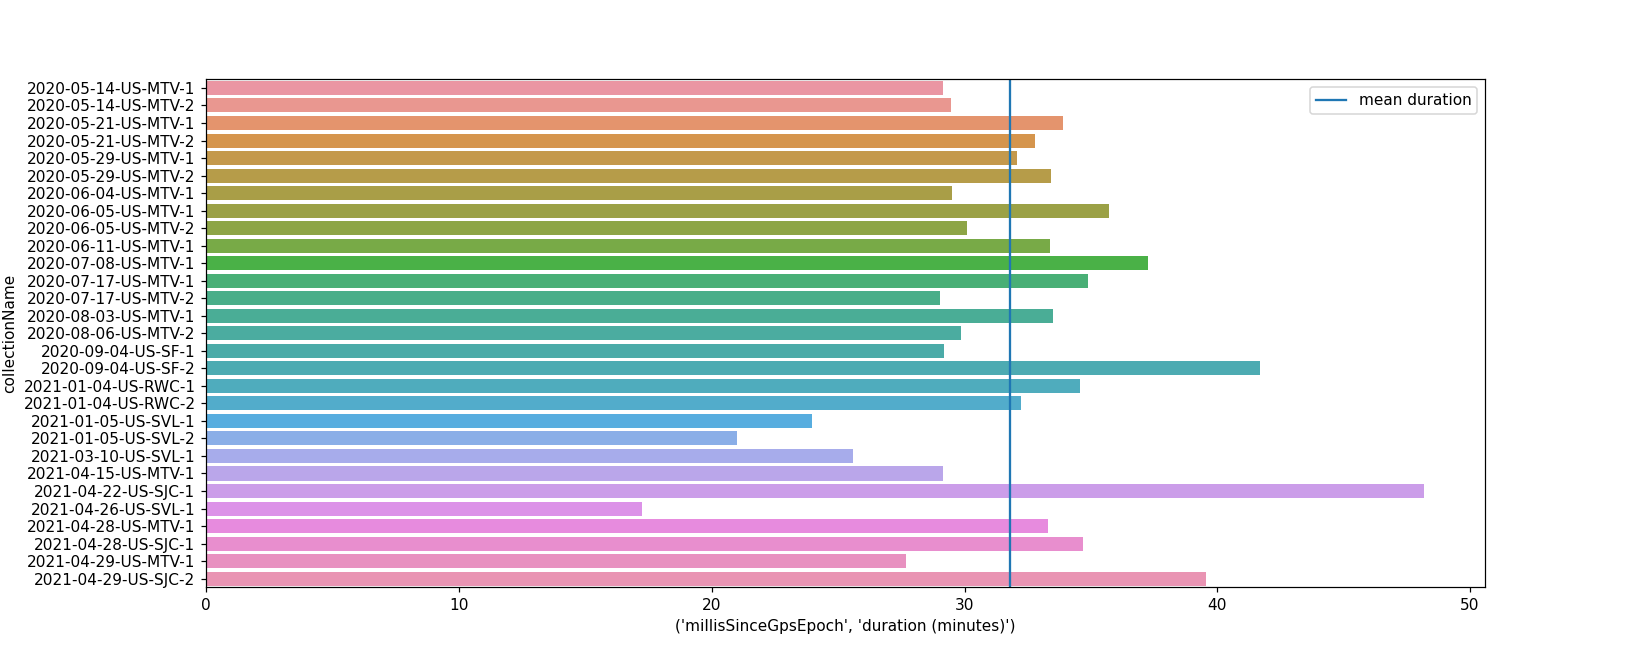

In [25]:
plt.figure(figsize=(15,6))
df = ground.groupby('collectionName').agg({'millisSinceGpsEpoch': [('duration (minutes)', lambda x: ((np.max(x)-np.min(x))/1000)/60)]}).reset_index()
g = sns.barplot(data=df,x=('millisSinceGpsEpoch', 'duration (minutes)'), y='collectionName')
g.axvline(float(df.mean()), label='mean duration')
g.legend()

All the collections are around 30 minutes of driving.

Lets portray the change in speed over time for all the collections to have some understanding on the consistency of the speed.<br>
the more the speed will change the harder it gets to predict the data using simple models that their main assumption is that speed won't change<br>
therefore it can be easy for them to predict the vehicle course of action

<IPython.core.display.Javascript object>


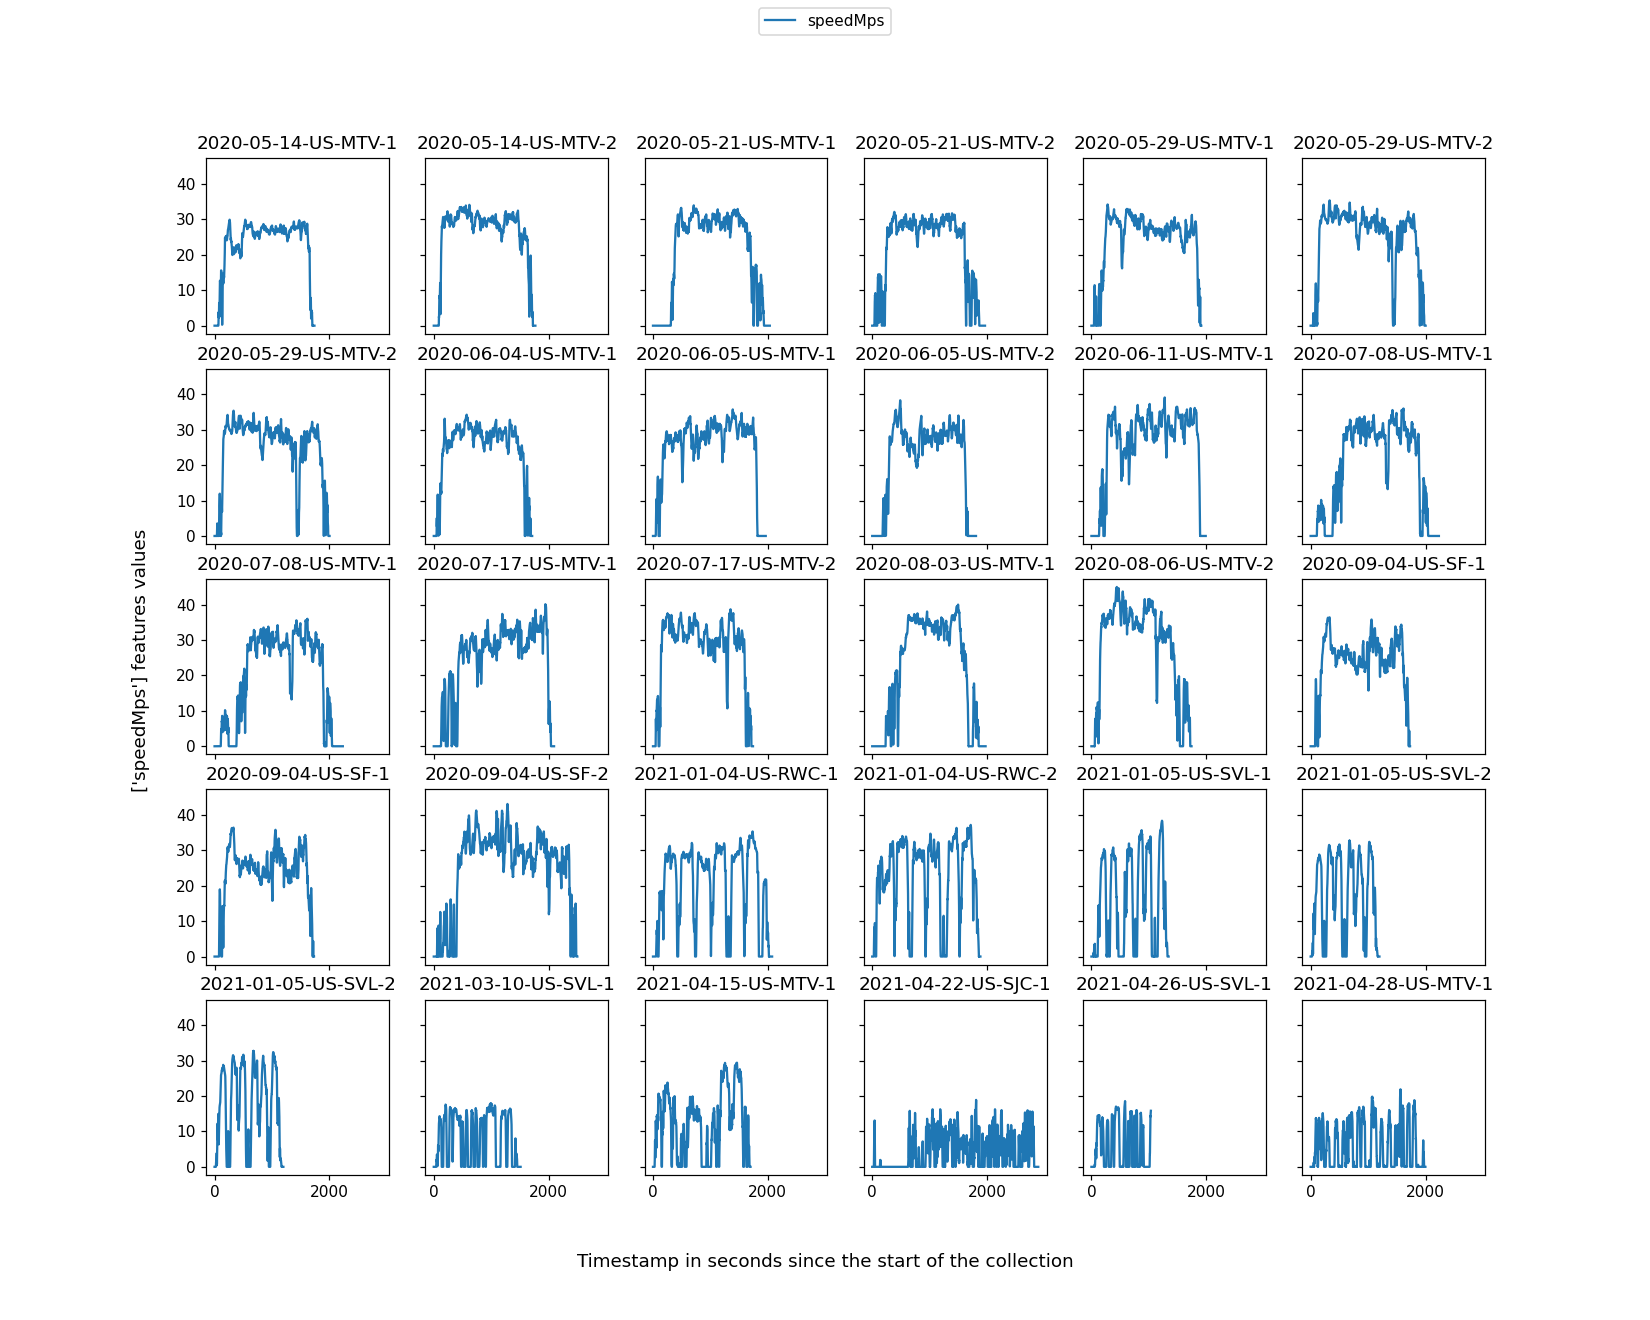

In [26]:
def plotPerCollection(data, collections, features, figsize=(15, 12)):
    cols=6
    rows = (len(collections)//6)+1
    if(len(collections)<6):
        cols = len(collections)
    fig, ax = plt.subplots(nrows= rows, ncols=cols, sharex=True, sharey=True, figsize=figsize)
    for i in range(ax.shape[0]):
        if(len(ax.shape) == 1):
            df = data[data['collectionName']==collections[i]]
            df = df[df['phoneName'] == df.iloc[0]['phoneName']]
            for feature in features:
                ax[i].plot((df['millisSinceGpsEpoch']-df.iloc[0]['millisSinceGpsEpoch'])/1000, df[feature], label=feature)
            ax[i].title.set_text(collections[i])
        else:
            for j in range(ax.shape[1]):
                df = data[data['collectionName']==collections[i*ax.shape[0]+j]]
                df = df[df['phoneName'] == df.iloc[0]['phoneName']]
                for feature in features:
                    ax[i][j].plot((df['millisSinceGpsEpoch']-df.iloc[0]['millisSinceGpsEpoch'])/1000, df[feature], label=feature)
                ax[i][j].title.set_text(collections[i*ax.shape[0]+j])
    fig.text(0.5, 0.04, 'Timestamp in seconds since the start of the collection', ha='center', size='large')
    fig.text(0.08, 0.5, str(features)+" features values", va='center', rotation='vertical', size='large')
    if(len(ax.shape) != 1):
        handles, labels = ax[i][j].get_legend_handles_labels()
    else:
        handles, labels = ax[i].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center')
plotPerCollection(ground, ground['collectionName'].unique(), ['speedMps'])

As we seen from the map indeed we have collections which have more consistent speed<br>
due to the fact that they are simply driving a car on a highway probably without changing lanes too much.<br>
We believe these collections will be far easier to predict with great accurracy than the ones where the speed is constantly changing.<br>
The collections which the speed is constantly changing are related to inner city collections such as in 2021-04-22-US-SJC-1 which is a low speed measurement<br>
but constantly the car comming to a full stop due to the multiple turns.<br>
Later on when we will compare the baseline predictions to the ground truth we will inspect whether the speed change rate do have an effect on the performance.<br>

<IPython.core.display.Javascript object>


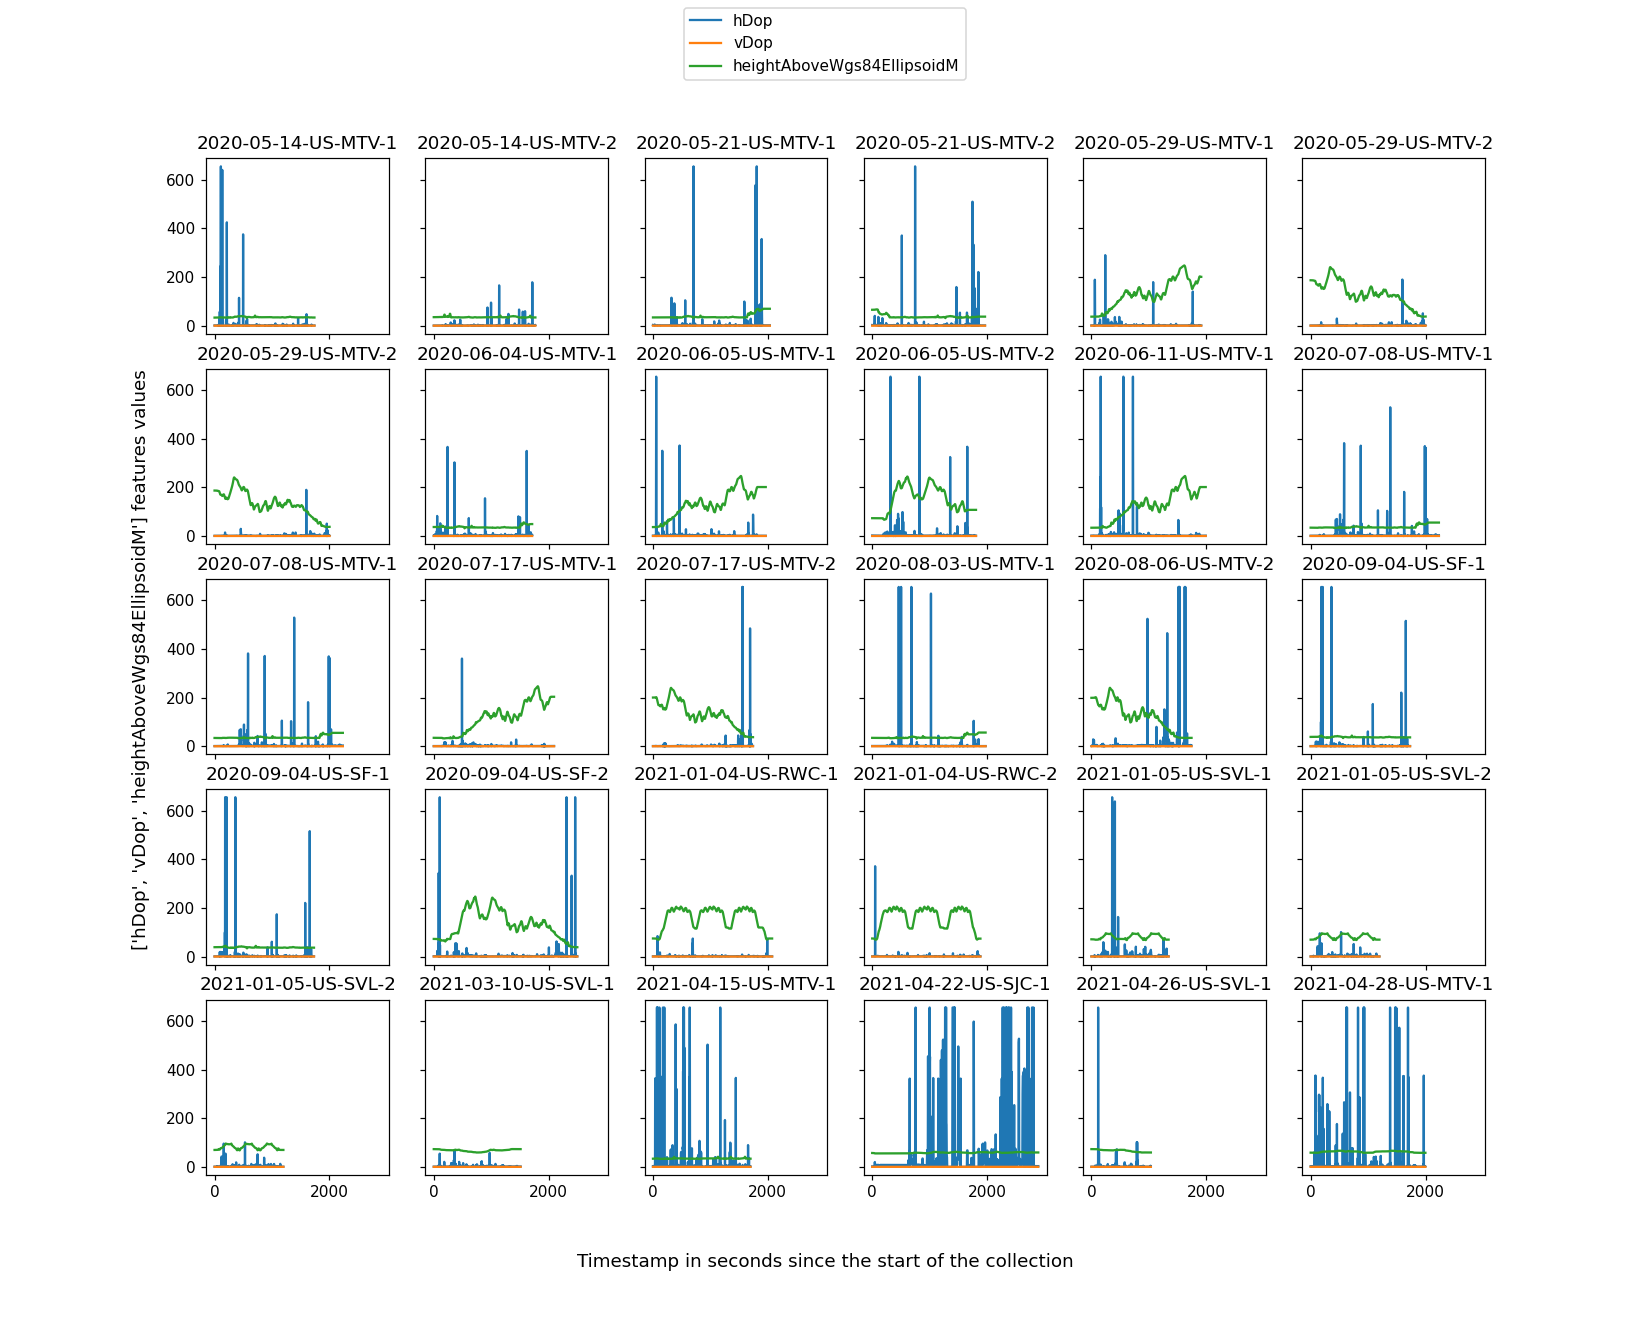

In [27]:
plotPerCollection(ground, ground['collectionName'].unique(), ['hDop', 'vDop', 'heightAboveWgs84EllipsoidM'])

When visible navigation satellites are close together in the sky, the geometry is said to be weak and the DOP value is high; when far apart, the geometry is strong and the DOP value is low.<br>
Thus a low DOP value represents a better positional precision due to the wider angular separation between the satellites used to calculate a unit's position. Other factors that can increase the<br>effective DOP are obstructions such as nearby mountains or buildings.<br> DOP can be expressed as a number of separate measurements. HDOP, VDOP, PDOP, and TDOP are respectively Horizontal, Vertical, Position (3D), and Time Dilution of Precision.<br>
https://www.gsat.us/support/glossary/hdop

We conclude that the lower the DOP value the more precise positioning. (maybe can be used as a way to give weight to our samples)<br>
another thing we understand is that the obsticles around us can affect the DOP values therefore we would like to plot the height which can give<br>
us indication regarding mountainess region.

As we can notice from the plot above most of the higher DOP values occurress around valleys.<br>
a perfect example for this phenomenon is collection 2021-04-15-MTV-US-1, the hDOP value spikes whenever the vehicle reaches the bottom of the vally and is blocked by high mountains.<br>
The same is happening at 2020-08-03-MTV-US-1 and more. It is clear that whenever the montains are blocking the GNSS signal we are getting dilution in the precision.<br>
In the city collections the region is not blocked by montains rather by buildings therefore these spikes of DOP. 

## Baseline dataframe analysis
As we mentioned before the baseline dataframe had been generated by weighted least squares on the derived data.<br>
we will describe later the derived data more deeply but due to it's complexisity of understanding and the need for domain knowledge we would like to<br>
firstly talk about the baseline dataset which is far more easier to understand.
<br><br>
Two images that help us understand why we even need to be more accurrate with our predictions:<br>
![alt text](BaselineFuckesup.jpg "under the bridge no reception")
<br>it is clear from the following image that there is a huge problem with the baseline predictions.<br>
there are some predictions that the baseline positioning us outside the road and even up on the hill as far as at least 5m from the car position.<br>
in other data points it positioning us on the opposite lane.<br>
![alt text](WhyWeNeedMoreAccurateGPS.jpg "In the building")
<br>In this example baseline is positioning us on the walking pavement and even on the rooftops.<br>
very inaccurrate positioning that any application that need some more refined positioning cannot use these predictions

In [28]:
np.all(bsln_trn.sort_values(cpm).reset_index()[cpm] == ground.sort_values(cpm).reset_index()[cpm])

True

In [29]:
bsln_trn.sort_values(cpm, inplace=True)
ground.sort_values(cpm, inplace=True)

def isSynched(left, right):
    """
    Checks if two datasets are synched by the collection-phone-epoch
    """
    return np.all(left.sort_values(cpm).reset_index()[cpm] == right.sort_values(cpm).reset_index()[cpm])

if isSynched(bsln_trn, ground):
    print("Baseline and ground truth data are synchronized")
else:
    print("Baseline and ground truth data are not synchronized")

Baseline and ground truth data are synchronized


As we can notice there is not much data in the baseline but it is exactly the prediction that is needed and our model would need to perform at least better than the baseline.

#### Plot collection route on a map using ground truth route vs. baseline route
The following function draws the ground truth locations on google map map and on the ground truth locations the map plots a heatmap of the frequency of the locations of baseline location predictions.

From the following map we can see the baseline predicted values vary around the ground truth<br>
The route in blue represent the true route of the measurements while the hit map represent the baseline measurement.<br>
The hotter the color gets, the more frequent and concentraited the predictions are.<br>
You can interact with the map as with any google map. <br>
Try to zoom in and have a look at the prediction distribution around the route and how it diviates from the ground truth<br>
We can also notice why decimeter prediction is neccessary as jumpy navigation system can cause quite distress,<br>
Especially if we finding ourself outside the road or even on the roof of some building as we can observe in multiple observations.<br>
High accurracy navigation systems such as ADAS, Autonomous vehicles or even Pokemon GO have critical neccessity in highly accurrate lat lng positioning.  

In [30]:
logs_bsln[logs_bsln.drop(['LeapSecond'], axis=1).isna().any(axis=1)].head()

collectionName       phoneName  millisSinceGpsEpoch     latDeg  \
4      2020-05-14-US-MTV-1  Pixel4XLModded        1273529466449  37.423574   
6      2020-05-14-US-MTV-1  Pixel4XLModded        1273529467449  37.423573   
3492   2020-05-14-US-MTV-2  Pixel4XLModded        1273538835449  37.690555   
3494   2020-05-14-US-MTV-2  Pixel4XLModded        1273538836449  37.690680   
17374  2020-05-29-US-MTV-2        Pixel4XL        1274830058447  37.523279   

           lngDeg  heightAboveWgs84EllipsoidM  \
4     -122.094137                      -33.20   
6     -122.094153                      -33.92   
3492  -122.392947                     -133.05   
3494  -122.393334                     -203.23   
17374 -122.354322                      123.38   

                                    phone  utcTimeMillis  UncalAccelXMps2  \
4      2020-05-14-US-MTV-1_Pixel4XLModded  1589494248448              NaN   
6      2020-05-14-US-MTV-1_Pixel4XLModded  1589494249448              NaN   
3492   2020-05-14-US-MTV-2_Pixel4XLModded  1589503617448              NaN   
3494   2020-05-14-US-MTV-2_Pixel4XLModded  1589503618448              NaN   
17374        2020-05-29-US-MTV-2_Pixel4XL  1590794840447              NaN   

       UncalAccelYMps2  UncalAccelZMps2  UncalGyroXRadPerSec  \
4                  NaN              NaN                  NaN   
6                  NaN              NaN                  NaN   
3492               NaN              NaN                  NaN   
3494               NaN              NaN                  NaN   
17374              NaN              NaN                  NaN   

       UncalGyroYRadPerSec  UncalGyroZRadPerSec  UncalMagXMicroT  \
4                      NaN                  NaN              NaN   
6                      NaN                  NaN              NaN   
3492                   NaN                  NaN              NaN   
3494                   NaN                  NaN              NaN   
17374                  NaN                  NaN              NaN   

       UncalMagYMicroT  UncalMagZMicroT  LeapSecond          epoch  
4                  NaN              NaN         NaN  1273529466448  
6                  NaN              NaN         NaN  1273529467448  
3492               NaN              NaN         NaN  1273538835448  
3494               NaN              NaN         NaN  1273538836448  
17374              NaN              NaN         NaN  1274830058447

In [31]:
def drawRandomPath(collection='random', phone='random', mapName='random'):
    if collection == 'random':
        collection = target['collectionName'].sample().iloc[0]
    if phone == 'random':
        phone = target[target['collectionName'] == collection]['phoneName'].sample().iloc[0]
    t = target[(target['collectionName'] == collection) & (target['phoneName'] == phone)]
    print(phone, collection)
    return compareRoutes(np.array(t[['latDeg_grnd','lngDeg_grnd']]), np.array(t[['latDeg_bsln','lngDeg_bsln']]), mapName=mapName)
drawRandomPath(collection='2020-09-04-US-SF-2')

Mi8 2020-09-04-US-SF-2


In [32]:
drawRandomPath(collection='2021-04-29-US-MTV-1', phone='SamsungS20Ultra', mapName='2021-04-29-US-MTV-1-SamsungS20Ultra')

SamsungS20Ultra 2021-04-29-US-MTV-1


In [33]:
drawRandomPath(collection='2021-04-29-US-MTV-1', phone='Pixel4', mapName='2021-04-29-US-MTV-1-Pixel4')

Pixel4 2021-04-29-US-MTV-1


As we compare two devices on the same route it seems the pixel 4 is a bit more cluttered than the samsung device.<br>
But both of them are off from the real lane for at least 2m if not more at complex turns and when the vehicle stops.<br>
Every intersection where the vehicle stopped we can notice a big cloud of data points for both of the devices<br>
Maybe the baseline method is more prone to error at changes in the vehicle speed and low speed traveling.<br>
It seems that at segments of the road where the car should have constant speed it seems like the datapoints are more accurate.<br>

In [34]:
ground_tmp = ground.copy()
ground_tmp['acceleration'] = (ground['speedMps'] - ground['speedMps'].shift()) / (ground['millisSinceGpsEpoch'] - ground['millisSinceGpsEpoch'].shift())
ground_tmp[ground_tmp['acceleration']>0].head(3)

collectionName phoneName  millisSinceGpsEpoch     latDeg      lngDeg  \
67  2020-05-14-US-MTV-1    Pixel4        1273529530442  37.423577 -122.094132   
68  2020-05-14-US-MTV-1    Pixel4        1273529531442  37.423579 -122.094131   
69  2020-05-14-US-MTV-1    Pixel4        1273529532442  37.423586 -122.094130   

    heightAboveWgs84EllipsoidM  timeSinceFirstFixSeconds  hDop  vDop  \
67                       33.14                    618.44   1.8   0.0   
68                       33.14                    619.44   1.6   0.0   
69                       33.15                    620.44   1.4   0.0   

    speedMps  courseDegree  acceleration  
67      0.15          12.6       0.00015  
68      0.43          12.6       0.00028  
69      1.20          12.5       0.00077

<IPython.core.display.Javascript object>


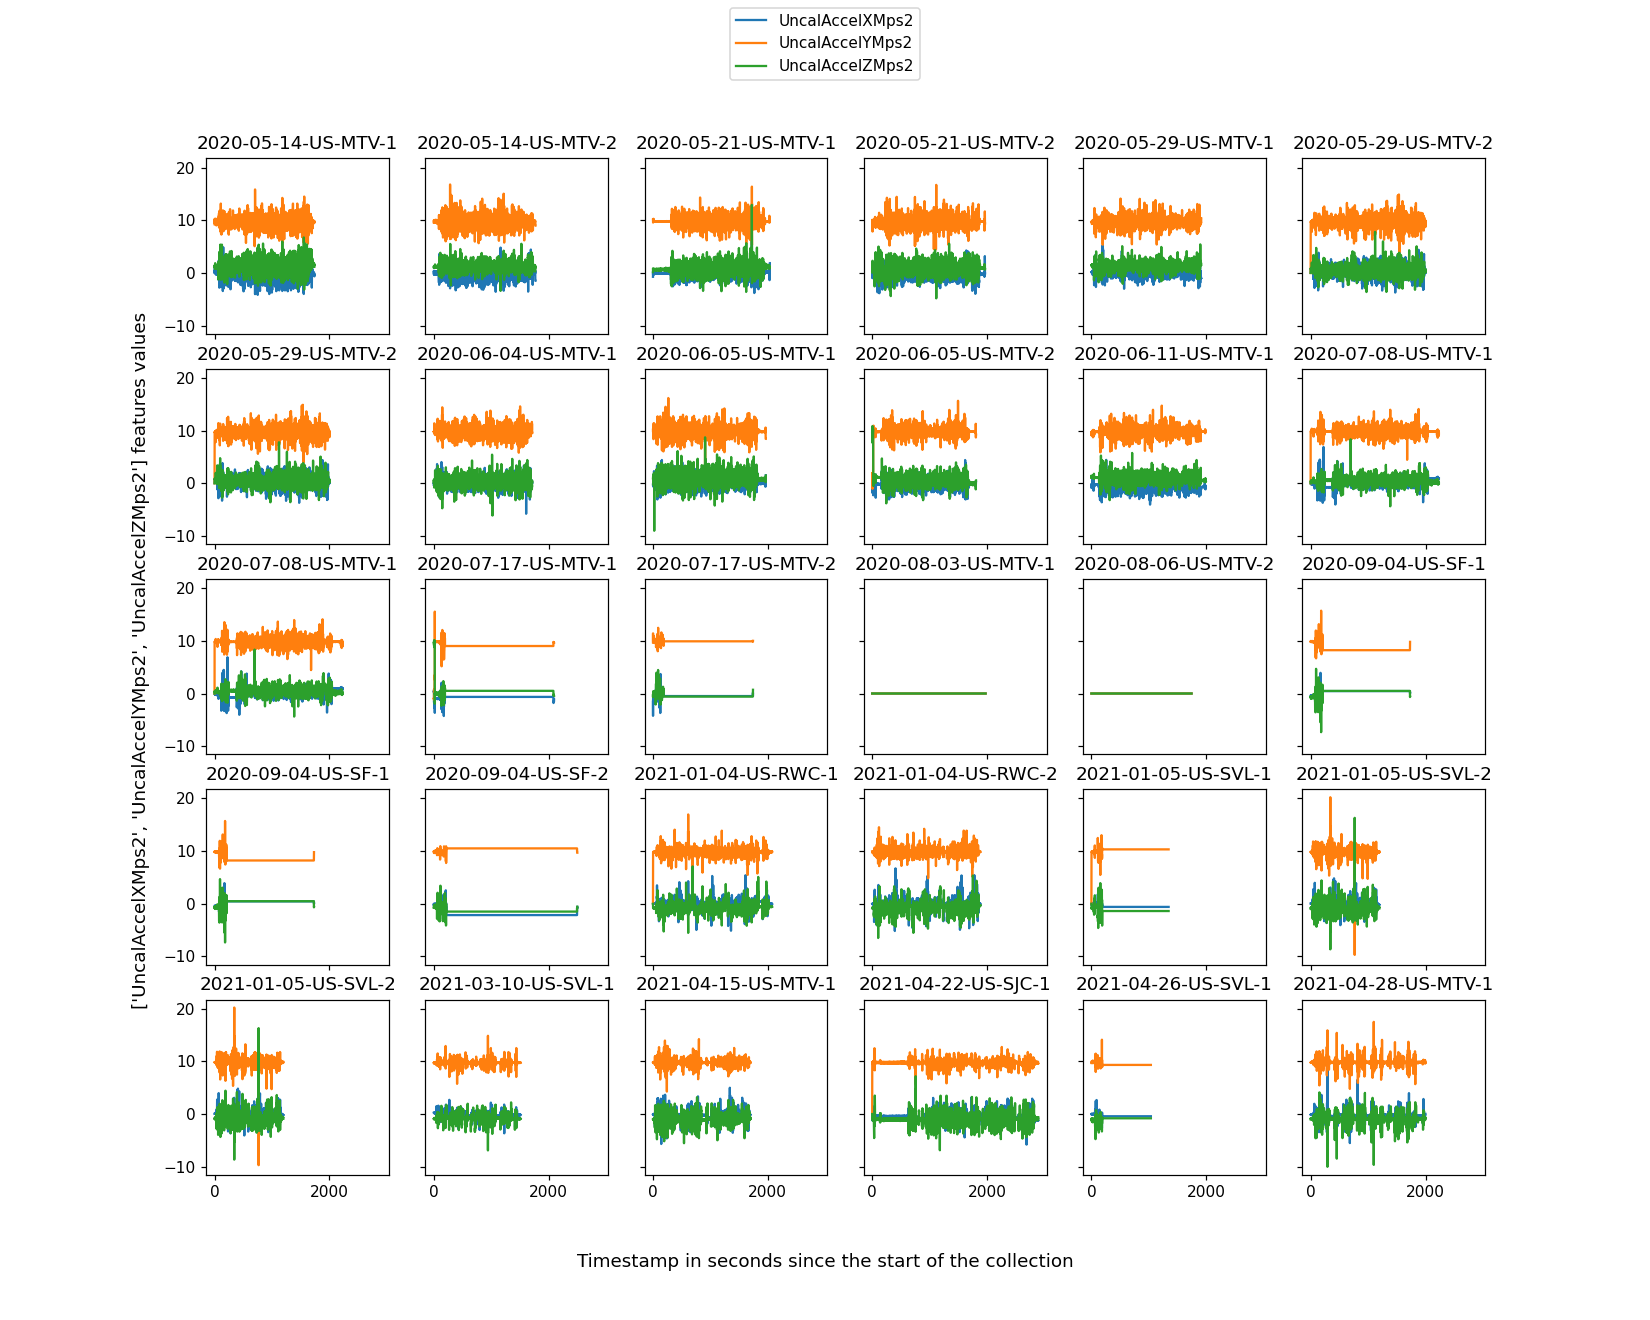

In [35]:
plotPerCollection(bsln_trn.fillna(0), bsln_trn['collectionName'].unique(), ['UncalAccelXMps2', 'UncalAccelYMps2', 'UncalAccelZMps2'])

<IPython.core.display.Javascript object>


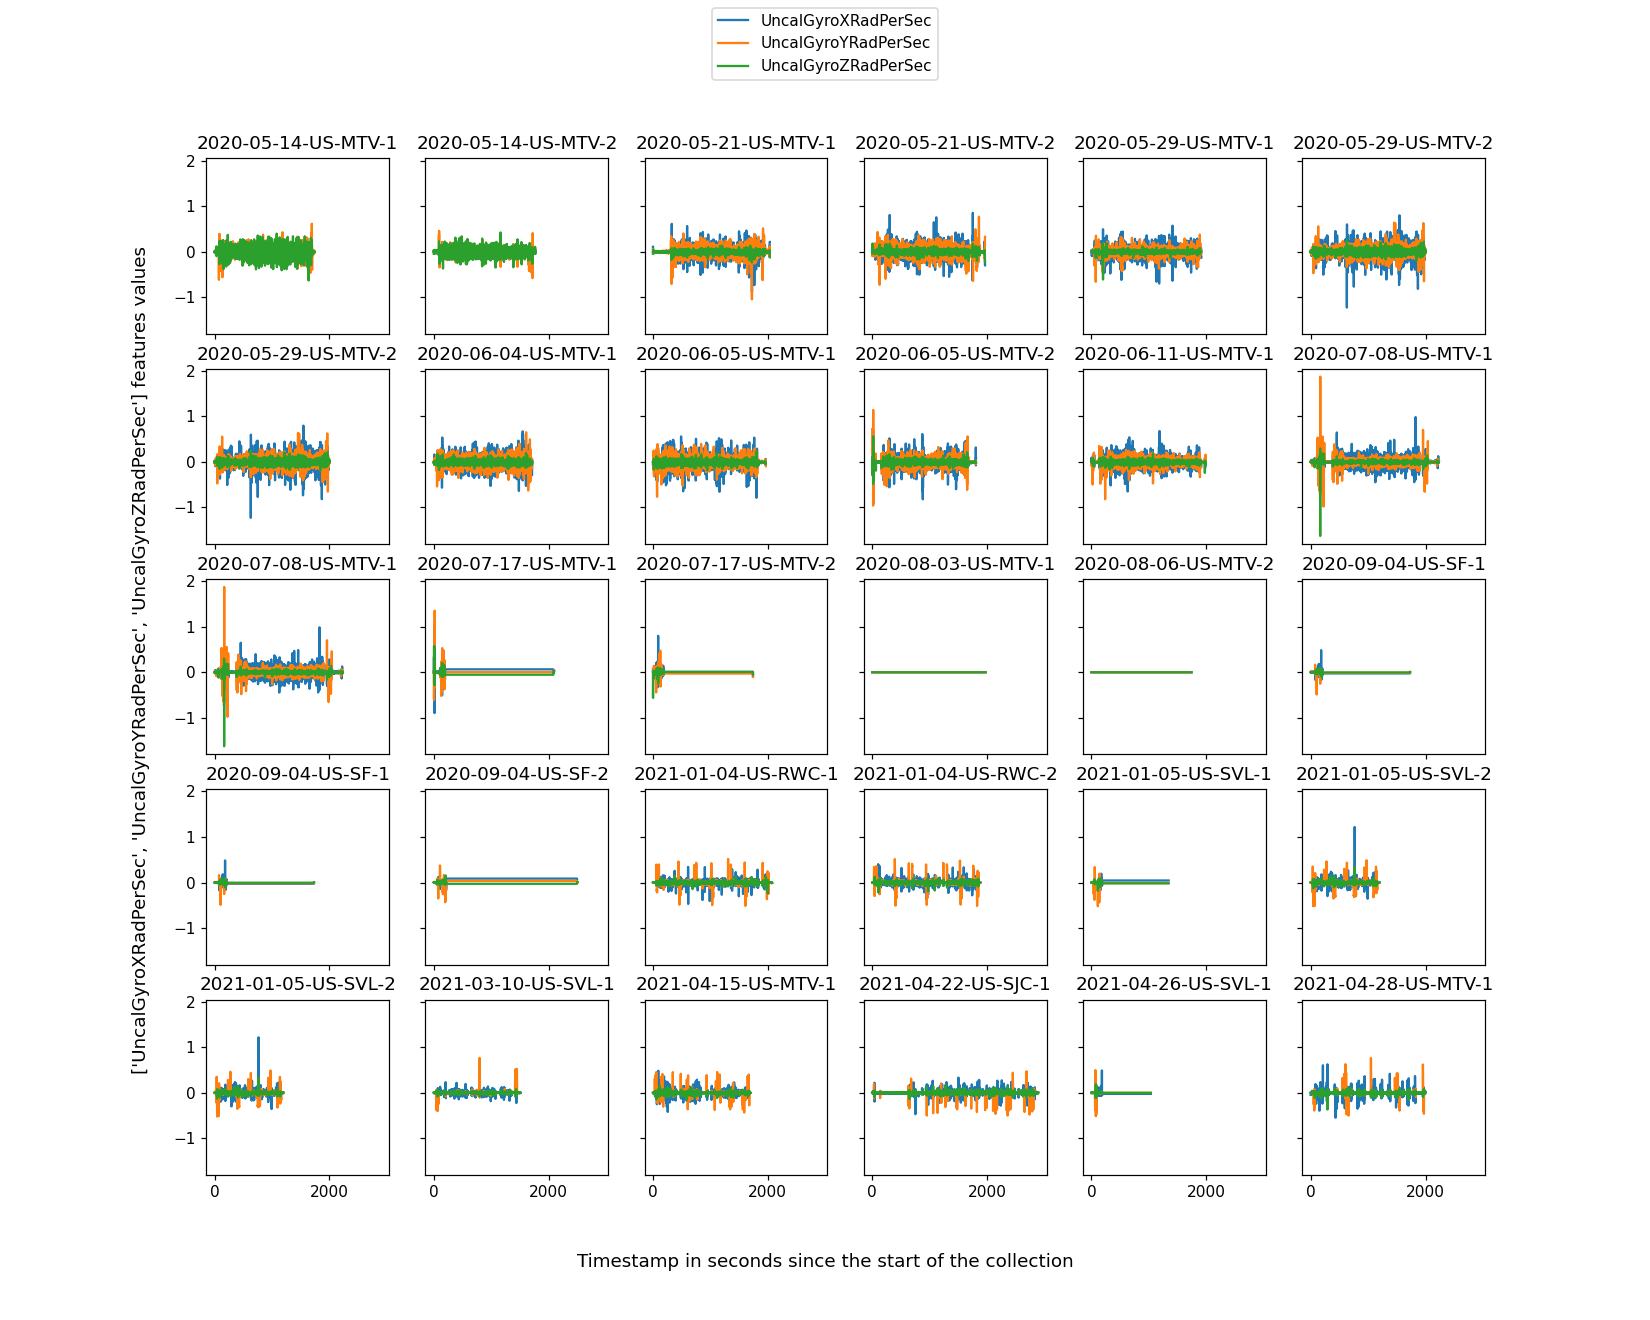

In [36]:
plotPerCollection(bsln_trn.fillna(0), bsln_trn['collectionName'].unique(), ['UncalGyroXRadPerSec', 'UncalGyroYRadPerSec', 'UncalGyroZRadPerSec'])

Notice that the accelaration in the z axis is always around 9.81, which is earth's gravity accelaration.<br>
mostly the accelaration are keeping it constant around 0 and g and diverge around that value.<br>
there are some collections which are almost steady on the accelaration while other constantly shifting.

But what is a good performance? how do we measure it?<br>
How can we tell that the baseline predictions are not good enough for precise navigation and accurrate positioning?<br>
this rough comparison between the ground truth and the baseline predictions can't tell us nothing about how well the least squares mehod performed.<br>
We need numerical evaluation for the performance of the predictions.<br>
luckily the competition evaluation metric is provided for us<br>
therefore we think that before we continue analysing any training data we should at least display why baseline predictions are just not good enough<br>
and we need to get much more accurrate<br>

### Set up the evaluation metric
The challenge evaluation metric is set to be as following:<br>
https://www.kaggle.com/c/google-smartphone-decimeter-challenge/overview/evaluation<br>
Submissions are scored on the mean of the 50th and 95th percentile distance errors. For every phone and at every millisSinceGpsEpoch,<br> the horizontal distance (in decimeters) is computed between the predicted lat/lng and the ground truth lat/lng.<br> These distance errors form a distribution from which the 50th and 95th percentile errors are calculated (i.e. the 95th percentile error is the value, in decimeters, for which 95% of the distance errors are smaller).<br> The 50th and 95th percentile errors are then averaged for each phone.<br> Lastly, the mean of these averaged values is calculated across all phones in the test set.<br><br>

https://en.wikipedia.org/wiki/Haversine_formula

The harversine function determines the "Great circle" distance between 2 latlon datapoints.<br>
We are using this measurement to accurratly determine as needed the `horizontal distance` between two points on earth.



In [37]:
def calc_haversine(lat1, lon1, lat2, lon2):
    """Calculates the great circle distance between two points
    on the earth. Inputs are array-like and specified in decimal degrees.
    """
    RADIUS = 6_367_000
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    dist = 2 * RADIUS * np.arcsin(a**0.5)
    return dist

The competition metric that is required is calculating the distances between the true and predicted values.<br>
Then return the mean of the median and 95th percentile out of that distance vector.

In [38]:
def haversine_50thP_95thP_mean(lat1, lon1, lat2, lon2):
    """Using calc_haversine formula to calculate the mean of  the mean of the 50th and 95th percentile distance errors
    The Competition evaluation metric
    """
    haversine = calc_haversine(lat1, lon1, lat2, lon2)
    return (np.percentile(haversine, 95) + np.median(haversine)) / 2

We are set to go with already predicted dataset of samples.<br>
What is so bad with the initial predictions that we even need to make an effort to minimize its error?<br>
Let's have a look at the competition evaluation for the given predictions and try to asses how they differ from the ground truth.<br>

In [1071]:
score_prev = haversine_50thP_95thP_mean(target['latDeg_grnd'], target['lngDeg_grnd'], target['latDeg_bsln'], target['lngDeg_bsln'])
print("{}dm is the mean of the meadian error and the 95th percentile".format(score_prev))

6.265253011167563dm is the mean of the meadian error and the 95th percentile


As implied in the compition name 6.2 decimeters is simply not enough.<br>
we have to reduce the prediction error to at least under 3dm to get into the decimeter realm.<br>
6 dm doesn't seem to be that far but soon we would see it is not an easy task.

#### Let's continue our invistigation using the evaluation metric
With the haversine calculation we can compare the baseline estimated coordinates to the ground truth, sliced by various columns. Thus we might get an intuition for more and less "accurate" features.

<IPython.core.display.Javascript object>


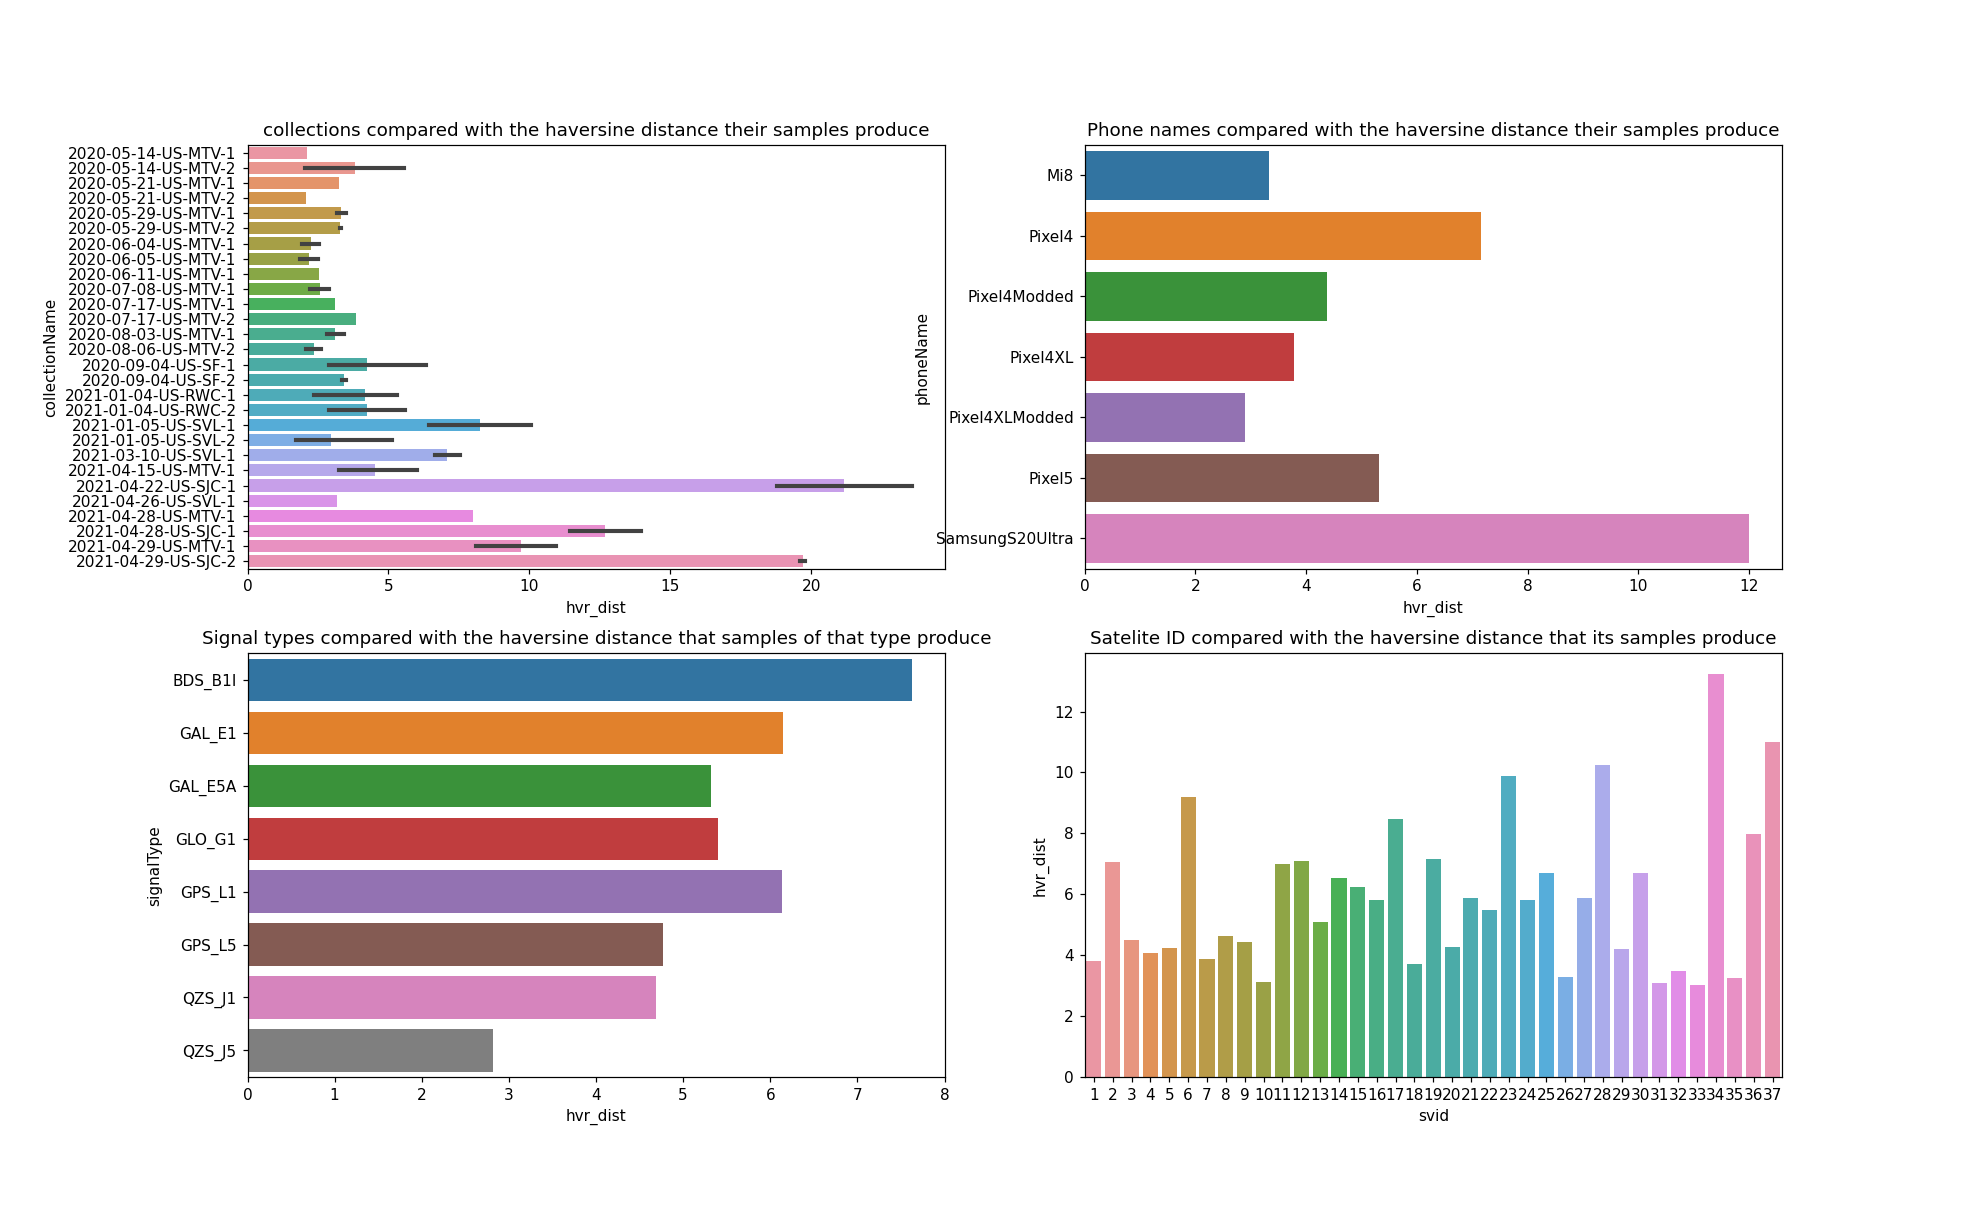

<AxesSubplot:title={'center':'Satelite ID compared with the haversine distance that its samples produce'}, xlabel='svid', ylabel='hvr_dist'>

In [40]:
drvd_grnd_match = pd.merge_asof(derived.sort_values('millisSinceGpsEpoch'), ground.sort_values('millisSinceGpsEpoch'), on='millisSinceGpsEpoch',
              suffixes=['_drvd', '_grnd'], tolerance=1)
drvd_grnd_bsln = pd.merge_asof(drvd_grnd_match, bsln_trn.sort_values('millisSinceGpsEpoch'), on='millisSinceGpsEpoch',
                              suffixes=['','_bsln'], tolerance=1)

drvd_grnd_bsln['hvr_dist'] = calc_haversine(drvd_grnd_bsln.latDeg, drvd_grnd_bsln.lngDeg, drvd_grnd_bsln.latDeg_bsln, drvd_grnd_bsln.lngDeg_bsln)

def evaluate_from_dist(hvr_dist):
    return (np.nanpercentile(hvr_dist, 95) + np.nanmedian(hvr_dist)) / 2

cltn_hvr_dist = drvd_grnd_bsln.groupby(['collectionName','phoneName'])['hvr_dist'].agg(evaluate_from_dist).reset_index()
phone_hvr_dist = drvd_grnd_bsln.groupby('phoneName')['hvr_dist'].agg(evaluate_from_dist).reset_index()
sig_type_hvr_dist = drvd_grnd_bsln.groupby('signalType')['hvr_dist'].agg(evaluate_from_dist).reset_index()
svid_hvr_dist = drvd_grnd_bsln.groupby('svid')['hvr_dist'].agg(evaluate_from_dist).reset_index()
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(18, 11, forward=True)
axs[0][0].set_title('collections compared with the haversine distance their samples produce')
sns.barplot(x='hvr_dist', y='collectionName', data=cltn_hvr_dist, ax=axs[0][0])
axs[0][1].title.set_text('Phone names compared with the haversine distance their samples produce')
sns.barplot(x='hvr_dist', y='phoneName', data=phone_hvr_dist, ax=axs[0][1])
axs[1][0].title.set_text('Signal types compared with the haversine distance that samples of that type produce')
sns.barplot(x='hvr_dist', y='signalType', data=sig_type_hvr_dist, ax=axs[1][0])
axs[1][1].title.set_text('Satelite ID compared with the haversine distance that its samples produce')
sns.barplot(y='hvr_dist', x='svid', data=svid_hvr_dist, ax=axs[1][1])

- An interesting outcome! Some features yield a greater deviation in haversine distance values. <br>We can immidiatly learn about two very problematic collections.<br>
`2021-04-22-US-SJC-1` and `2021-04-29-US-SJC-2`, could it be harder to predict in San Jose? <br>
- Another interesting finding is the error score of `SamsungS20Ultra` which is by far much more worst than the other phones.<br>
- Phones using BeiDu (Chinese) signalType are experiencing slightly worst GNSS performance<br>
- Satelites 34 & 37 are noticably worst performers than the rest of the bunch 

Let's have a look at the san jose collection

In [41]:
drawRandomPath(collection='2021-04-22-US-SJC-1', mapName='2021-04-22-US-SJC-1-any')

SamsungS20Ultra 2021-04-22-US-SJC-1


Well it seems kind of obvious that we will have the most trouble here. as mentioned before high rise buildings can cause GNSS signal interferences.<br>
Another thing that may be problematic is the high rate of changes in speed which can be cause for inconsistency.<br>
the following plot can show us better exactly the rate of change in the phone accelaration.

<IPython.core.display.Javascript object>


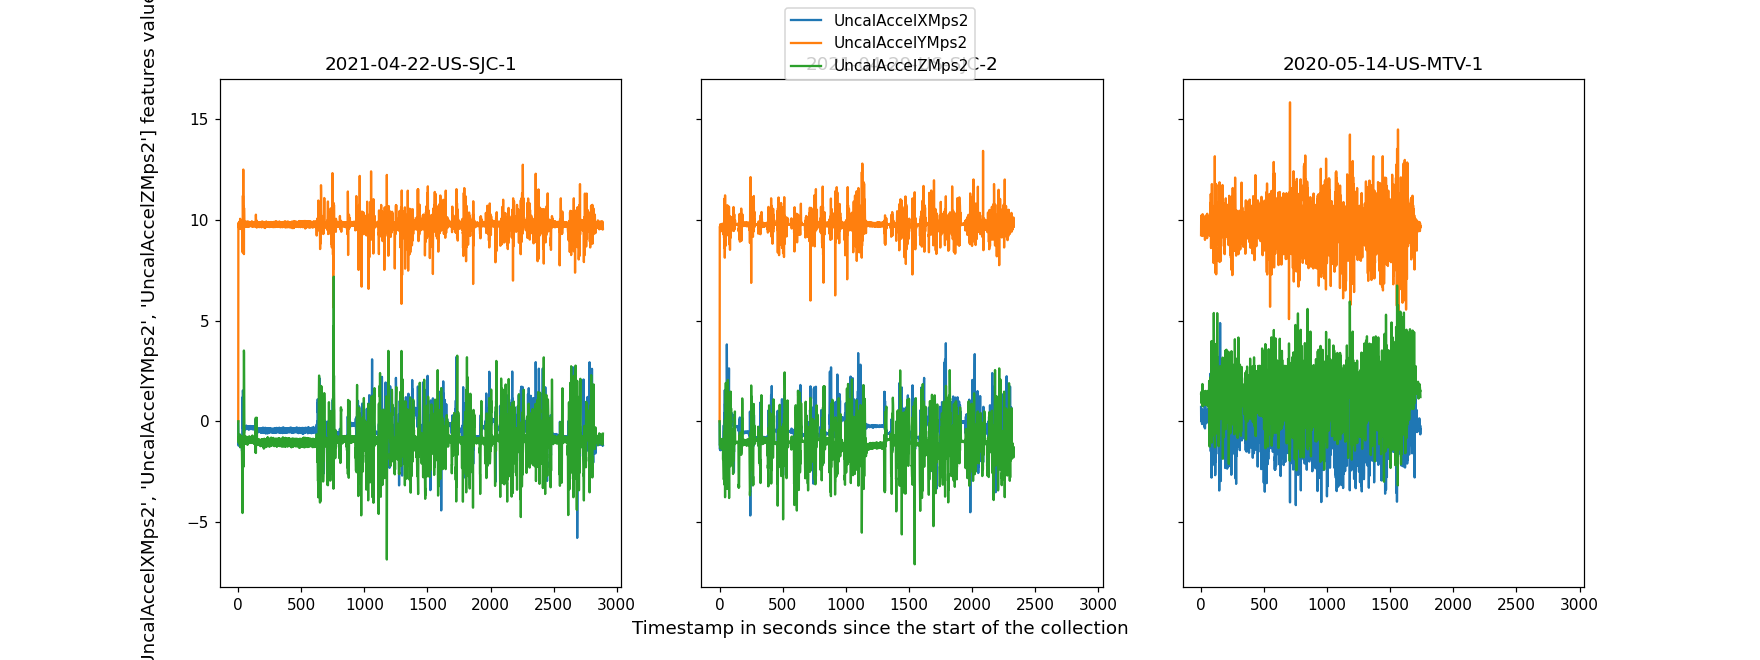

In [42]:
plotPerCollection(bsln_trn.fillna(0), ['2021-04-22-US-SJC-1', '2021-04-29-US-SJC-2', '2020-05-14-US-MTV-1'], ['UncalAccelXMps2', 'UncalAccelYMps2', 'UncalAccelZMps2'], figsize=(16,6))

It seems that both the worst and the best performing collections are constantly changing acceleration<br>
but there is a difference. the best performing data seems much more full than the worst. <br>
the accelaration graph over time looks more continous and less breakapart.

In [43]:
p = bsln_trn[bsln_trn['collectionName']=='2021-04-22-US-SJC-1'].drop(['LeapSecond'], axis=1).isna().any(axis=1).sum()/len(bsln_trn[bsln_trn['collectionName']=='2021-04-22-US-SJC-1'])
print("{:.2f}% of San Jose datapoints are missing accelaration values from the logs".format(p*100))
p = bsln_trn[bsln_trn['collectionName']=='2020-05-14-US-MTV-1'].drop(['LeapSecond'], axis=1).isna().any(axis=1).sum()/len(bsln_trn[bsln_trn['collectionName']=='2020-05-14-US-MTV-1'])
print("{:.2f}% of Mountain View datapoints are missing accelaration values from the logs".format(p*100))

0.03% of San Jose datapoints are missing accelaration values from the logs
0.06% of Mountain View datapoints are missing accelaration values from the logs


Both of the collections has very low null occurrences.

In [44]:
print("2021-04-22-US-SJC-1 phones are {}".format(list(bsln_trn[bsln_trn['collectionName']=='2021-04-22-US-SJC-1']['phoneName'].unique())))
print("2020-05-14-US-MTV-1 phones are {}".format(list(bsln_trn[bsln_trn['collectionName']=='2020-05-14-US-MTV-1']['phoneName'].unique())))

2021-04-22-US-SJC-1 phones are ['Pixel4', 'SamsungS20Ultra']
2020-05-14-US-MTV-1 phones are ['Pixel4', 'Pixel4XLModded']


Maybe it is simply the phone that affects the performance.<br>

<IPython.core.display.Javascript object>


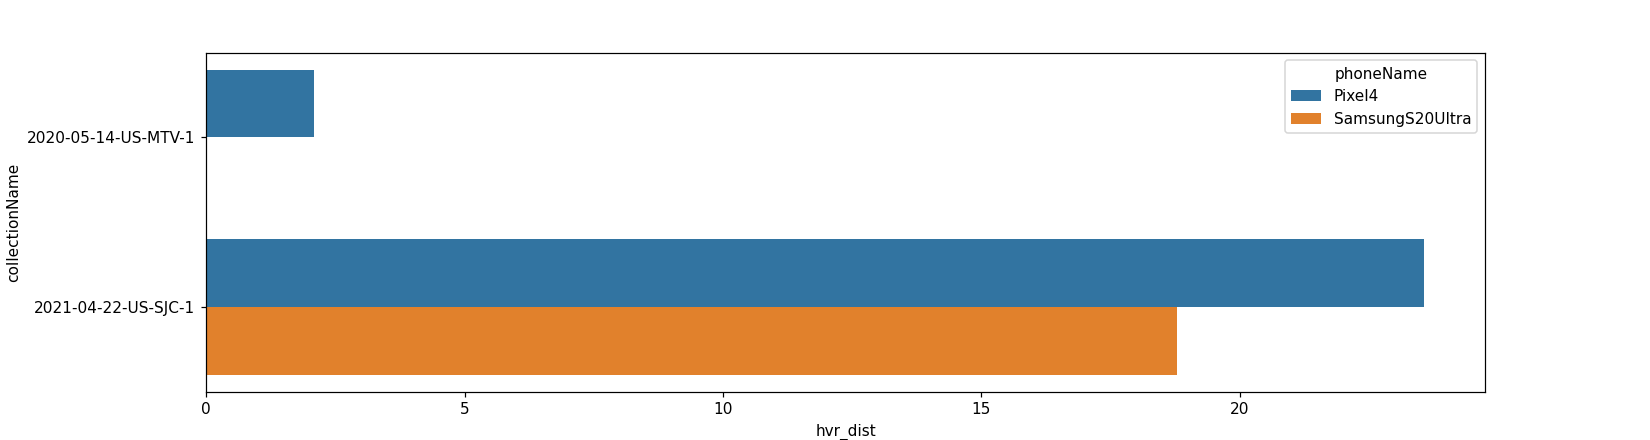

<AxesSubplot:xlabel='hvr_dist', ylabel='collectionName'>

In [45]:
plt.figure(figsize=(15,4))
sns.barplot(x='hvr_dist', y='collectionName', data=cltn_hvr_dist[cltn_hvr_dist['collectionName'].isin(['2021-04-22-US-SJC-1', '2020-05-14-US-MTV-1'])], hue='phoneName')

No, the phone do not have anything to do with the performance between these two collections (pixel4 is performing even worst in San Jose).<br>
simply put it is probably the fault in the buildings around the town that blocks the reception to the phone.

### Baseline vs. ground truth spatial comparison

<IPython.core.display.Javascript object>


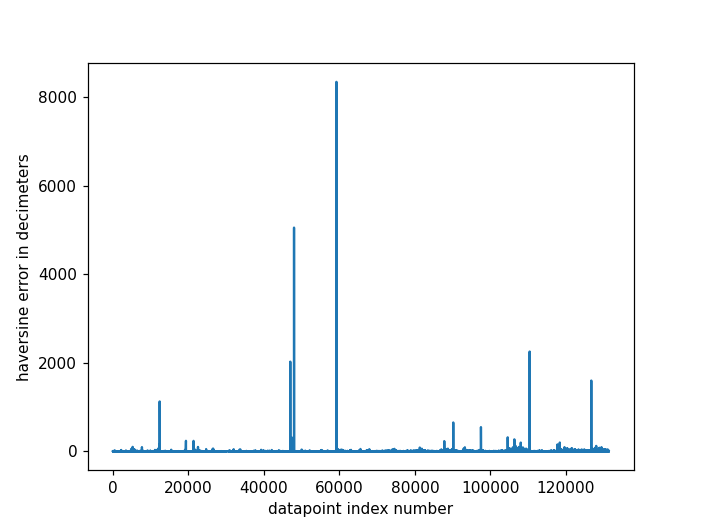

Text(0.5, 0, 'datapoint index number')

In [46]:
target['bsln_grnd_distance'] = calc_haversine(target['latDeg_grnd'], target['lngDeg_grnd'], target['latDeg_bsln'], target['lngDeg_bsln'])
plt.figure()
plt.plot(range(target.shape[0]), target['bsln_grnd_distance'])
plt.ylabel('haversine error in decimeters')
plt.xlabel('datapoint index number')

In [47]:
target['bsln_grnd_distance'].describe()

count    131342.000000
mean          3.846848
std          30.739767
min           0.001338
25%           1.210976
50%           2.065769
75%           3.560001
max        8340.257976
Name: bsln_grnd_distance, dtype: float64

As we can see the error is quite large using simply the baseline data (Weighted Least Squars on derived data).<br>
Further more we have some very strange outlier measurements that with very large errors that are unacceptable at any circumstances and do not even imply on simple GPS accurracy.<br> These outlier samples can range all the way from 40m error to 8km error.<br> In the future we would use outlier detection algorithm to detect these samples and then clean them.<br>

Our mission is to flat that plot!

<IPython.core.display.Javascript object>


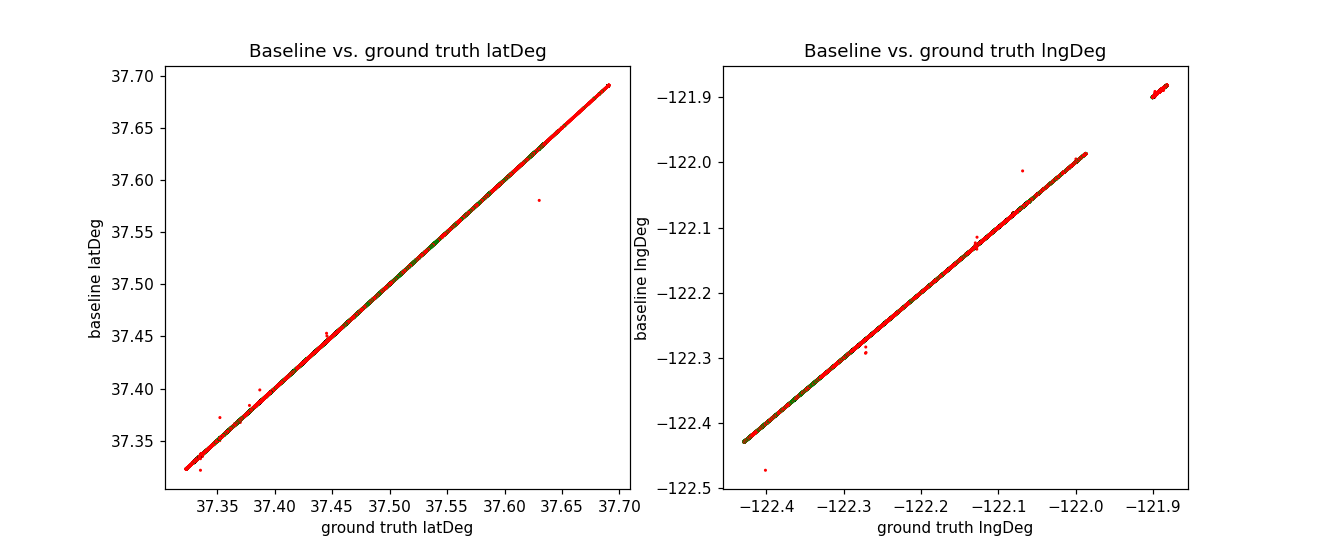

Text(0, 0.5, 'baseline lngDeg')

In [48]:
colors = (target['bsln_grnd_distance']<0.5).apply(lambda x: 'g' if x else 'r')
size = (target['bsln_grnd_distance']<0.5).apply(lambda x: 2 if x else 1)
plt.figure(figsize=(12,5))
plt.subplot(121); plt.title('Baseline vs. ground truth latDeg'); 
plt.scatter(target['latDeg_grnd'], target['latDeg_bsln'], color=colors, s=size)
plt.xlabel('ground truth latDeg'); plt.ylabel('baseline latDeg')
plt.subplot(122); plt.title('Baseline vs. ground truth lngDeg');
plt.scatter(target['lngDeg_grnd'], target['lngDeg_bsln'], color=colors, s=size)
plt.xlabel('ground truth lngDeg'); plt.ylabel('baseline lngDeg')

In the following figure we can see two plots. One for latDeg and the other for lngDeg.<br>
Although it seems like a line it is a scatter plot, each point would be colored in green if the horizontal distance<br>
from baseline prediction is lower than 5 decimeters otherwise in red. our ambision is to make transform the plot to green line that corripond to the y=x line

## Derived dataset
After going through the ground data to know what we want to predict and going through baseline to show us that the baseline method is simply not enough.<br>
We can choose to use only the baseline GNSS data combined with the phone other sensors or we can choose to go to the origins and try use the raw basic measurements from<br>
the GNSS system.<br>
It is worth saying that derived dataset is much more complicated and overall we wouldn't like to use it due to the fact that it can recuire much more domain knowledge which<br>
we don't have. to make a desicion whether it is worth the hustle we would like to explore a little bit the dataset to get to know it better.<br>
<br>
Firstly we know each sample in the derived can be comprised out of several satelites<br>
In the process of sampling the phone tries to communicate with as many GNSS system satelites as possible for maximum accurracy.<br>
The more the merier.<br>
Let's count the number of satelites that had been involved in the process.<br>
We will calculate some metrics such as the total number of samples, the mean/std/max/percentiles number of satelites per sample.<br>

In [49]:
drvd_idx = derived.set_index(['collectionName','phoneName', 'millisSinceGpsEpoch'])
print("The number of different satelites is: {}".format(derived['svid'].nunique()))
g = derived.groupby(['collectionName','phoneName', 'millisSinceGpsEpoch']).agg({'svid': [ len,lambda x: np.bincount(x).argmax()]})
g.rename({'<lambda_0>': 'frequency', 'len': 'numOfSamples'}, axis=1, inplace=True)
bnc = np.bincount(g[('svid', 'frequency')])
print("The most frequent satelite is: {} with {} occurrences".format(bnc.argmax(), max(bnc)))
g.describe()

The number of different satelites is: 37
The most frequent satelite is: 2 with 33097 occurrences


svid               
        numOfSamples      frequency
count  130339.000000  130339.000000
mean       29.419759      12.573903
std         7.045016      10.132244
min         4.000000       1.000000
25%        25.000000       2.000000
50%        29.000000       8.000000
75%        34.000000      24.000000
max       109.000000      36.000000

As we noticed a single sample in a collection can be made out of as many as 109 datapoints. 
There are only 37 satelites, so we need to find out the source for the multiple samples

In [50]:
s = g[g['svid', 'numOfSamples']==g['svid','numOfSamples'].max()]
s2 = drvd_idx[drvd_idx['svid']==s.iloc[0]['svid','frequency']].loc[s.index[0]]
s2.nunique()

constellationType           3
svid                        1
signalType                  4
receivedSvTimeInGpsNanos    8
xSatPosM                    8
ySatPosM                    8
zSatPosM                    8
xSatVelMps                  6
ySatVelMps                  6
zSatVelMps                  6
satClkBiasM                 5
satClkDriftMps              1
rawPrM                      8
rawPrUncM                   7
isrbM                       7
ionoDelayM                  6
tropoDelayM                 5
dtype: int64

All the fields are present as mentioned in the data section

From index column it is clear that we are currently inspecting 12 datapoints from single satelite at specific sample.<br>
The unique table doesn't give out an immidiate suspect with 12 unique values, it is probably a combination of columns. <br>
Lets try constellationType + signalType

In [51]:
s2['constellationSignal'] = s2['constellationType'].astype(str) + '_'+ s2['signalType']
s2['constellationSignal'].unique()

array(['6_GAL_E1', '1_GPS_L1', '3_GLO_G1', '6_GAL_E5A'], dtype=object)

There are only 4 combinations for this sample therefore the  constellationType + signalType combination is not to blame

In [52]:
s2.groupby(s2.columns.tolist(),as_index=False).size()

constellationType  svid signalType  receivedSvTimeInGpsNanos      xSatPosM  \
0                  1    15     GPS_L1       1278284348372516232  5.351665e+06   
1                  1    15     GPS_L1       1278284349372516321  5.352363e+06   
2                  3    15     GLO_G1       1278284348365914639 -1.302696e+07   
3                  3    15     GLO_G1       1278284349365914439 -1.302957e+07   
4                  6    15     GAL_E1       1278284348356830651 -2.146326e+07   
5                  6    15     GAL_E1       1278284349356832034 -2.146199e+07   
6                  6    15    GAL_E5A       1278284348356837723 -2.146326e+07   
7                  6    15    GAL_E5A       1278284349356839099 -2.146199e+07   

       ySatPosM      zSatPosM  xSatVelMps  ySatVelMps  zSatVelMps  \
0 -2.204013e+07  1.319280e+07     697.526    1640.371    2437.399   
1 -2.203849e+07  1.319524e+07     697.676    1640.639    2437.107   
2  1.049519e+07  1.927784e+07   -2612.788     347.085   -1957.242   
3  1.049554e+07  1.927588e+07   -2612.494     347.270   -1957.704   
4  6.864463e+06  1.919216e+07    1271.718   -1451.822    1941.621   
5  6.863011e+06  1.919410e+07    1271.722   -1452.077    1941.326   
6  6.864463e+06  1.919216e+07    1271.718   -1451.822    1941.621   
7  6.863011e+06  1.919410e+07    1271.722   -1452.077    1941.326   

   satClkBiasM  satClkDriftMps        rawPrM  rawPrUncM     isrbM  ionoDelayM  \
0   -65606.743            -0.0  2.167992e+07      3.897     0.000       3.301   
1   -65606.744            -0.0  2.167989e+07      3.598     0.000       3.301   
2    32055.910            -0.0  2.365903e+07      2.398  1146.172       5.192   
3    32055.910            -0.0  2.365909e+07      2.099  1149.324       5.193   
4   258027.884            -0.0  2.638234e+07      5.096  -218.637       4.713   
5   258027.884            -0.0  2.638192e+07      5.096  -220.226       4.713   
6   258027.306            -0.0  2.638022e+07      0.899 -2345.065       8.452   
7   258027.306            -0.0  2.637981e+07      0.600 -2345.369       8.451   

   tropoDelayM constellationSignal  size  
0        3.865            1_GPS_L1     2  
1        3.865            1_GPS_L1     1  
2       14.752            3_GLO_G1     2  
3       14.753            3_GLO_G1     1  
4        6.789            6_GAL_E1     2  
5        6.788            6_GAL_E1     1  
6        6.789           6_GAL_E5A     2  
7        6.788           6_GAL_E5A     1

There are multiple datapoints with duplicate rows, but still there are 8 different rows after grouping by all columns to find the pure duplicates

In [53]:
s2.groupby(['rawPrM', 'receivedSvTimeInGpsNanos', 'constellationSignal'],as_index=False).size()

rawPrM  receivedSvTimeInGpsNanos constellationSignal  size
0  2.167989e+07       1278284349372516321            1_GPS_L1     1
1  2.167992e+07       1278284348372516232            1_GPS_L1     2
2  2.365903e+07       1278284348365914639            3_GLO_G1     2
3  2.365909e+07       1278284349365914439            3_GLO_G1     1
4  2.637981e+07       1278284349356839099           6_GAL_E5A     1
5  2.638022e+07       1278284348356837723           6_GAL_E5A     2
6  2.638192e+07       1278284349356832034            6_GAL_E1     1
7  2.638234e+07       1278284348356830651            6_GAL_E1     2

The measurements are recieved at different timestamps and therefore the raw pseodo range is affected because of the movement of the satelite.<br>
After dropping duplicates we still going to remain with several measurements per svid on specific sample due to multiple polling at different recieved times.<br>
Before handeling the data we should drop the duplicate rows containing exactly the same values at every column

In [54]:
old_derived_count = derived.shape[0]
derived.drop_duplicates(inplace=True)
print("Dropped {} duplicate measurements".format(old_derived_count-derived.shape[0]))

Dropped 12460 duplicate measurements


### Single sample 3d visualization
for single android measurment visualize the specific point on earth the phone exists and the connected satelites,<br>
Exibit the velocity of every satelite and the distance from the phone measured as the corrected pseudo range

In [55]:
def plotSatelite(ax, x, phone_cor=None):
    """Plot satelite measurements for a specific sample.
    """
    ax.scatter(x['xSatPosM'], x['ySatPosM'], x['zSatPosM'], c='r',s=50)
    ax.quiver(x['xSatPosM'], x['ySatPosM'], x['zSatPosM'], x['xSatVelMps'], x['ySatVelMps'], x['zSatVelMps'], length=(x['xSatVelMps']**2+x['ySatVelMps']**2+x['zSatVelMps']**2)**0.5)
    if isinstance(x.name, (int, np.integer)):
        ax.text(x['xSatPosM'], x['ySatPosM'], x['zSatPosM']+10, str(x.name))
    if phone_cor is not None:
        ax.plot([x['xSatPosM'], phone_cor[0]], [x['ySatPosM'], phone_cor[1]], [x['zSatPosM'], phone_cor[2]], c='g')
        
def plotSphere(ax, r=6731000, center=(0,0,0), hRange=(0, 2 * np.pi), vRange=(0, np.pi), phoneLat=0, phoneLng=0):
    theta = np.array([np.linspace(hRange[0], hRange[1], 50)])
    theta = np.ones_like(theta).T @ theta
    phi = np.array([np.linspace(vRange[0], vRange[1], 50)])
    phi = np.ones_like(phi).T @ phi
    phi = phi.T
    
    xx = r * np.sin(phi) * np.cos(theta) + center[0]
    yy = r * np.sin(phi) * np.sin(theta) + center[1]
    zz = r * np.cos(phi) + center[2]
    
    ax.plot_surface(xx, yy,zz)
    
    plt.show()
    
def latlonToXYZ(lat, lon):
    r=6731000 # Earth radius
    return (float(r * np.sin(lat) * np.cos(lon)), float(r * np.sin(lat) * np.sin(lon)), float(r * np.cos(lat)))

In [56]:
derived.reset_index(inplace=True)
ground.reset_index(inplace=True)

Index of every sample is attributed to the collection, the phone used in the collection set <br>(The data is collected using multiple android phones in driving car)<br>

In [57]:
derived['millisSinceGpsEpoch_drvd'] = derived['millisSinceGpsEpoch']
derived_idx = derived.set_index(['collectionName', 'phoneName', 'millisSinceGpsEpoch', 'svid'])

##### Choose random sample from derived data to display satelites

The following plot tries to sums up a single measurement in the derived dataset.<br>
The blue sphere represent the earth.<br>
The pink dot represents the north pole.<br>
The green dot represents the android device making the measurement.<br>
Each red dot represents a satelite in space.<br>
Each satelite has vector representing its speed.<br>
Each satelite streches a line in green which represents the distance to the the android device.<br>
All the locations are appearing in ECEF coordinated system, with earth fixed in the center (the axis are the ECEF coordinated system)

<IPython.core.display.Javascript object>


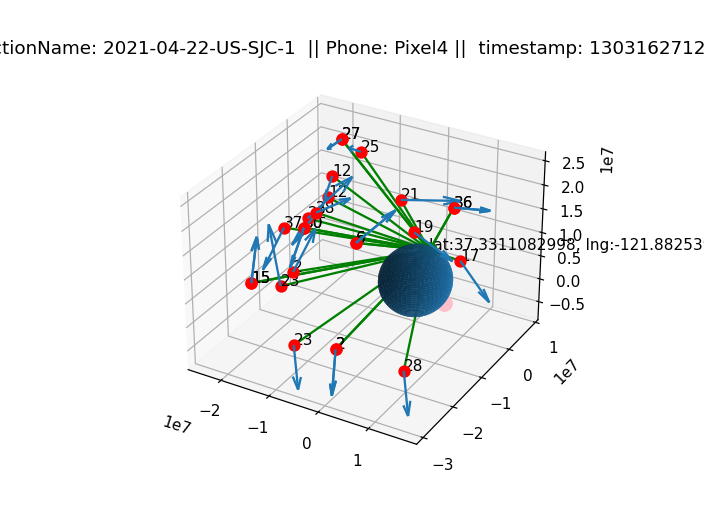

In [58]:
ax = plt.figure().add_subplot(projection='3d')
plotSphere(ax)
north_pole = latlonToXYZ(90, 0)
ax.scatter(north_pole[0],north_pole[1],north_pole[2], c='pink', s=100)

sample = derived[cpm].sample()
while not np.any(ground['millisSinceGpsEpoch']==sample.values[0,2]):
    sample = derived[cpm].sample()
sample_target = ground[ground['millisSinceGpsEpoch']==sample.values[0,2]]

plt.title("collectionName: {}  || Phone: {} ||  timestamp: {} ms".format(sample.values[0,0], sample.values[0,1], sample.values[0,2]))
satelites = derived_idx.loc[sample.values[0,0], sample.values[0,1], sample.values[0,2]]
phone_cor = latlonToXYZ(sample_target['latDeg'], sample_target['lngDeg'])
satelites.apply(lambda sat: plotSatelite(ax, sat, phone_cor), axis=1)
ax.scatter(phone_cor[0],phone_cor[1],phone_cor[2], c='g', s=100)

ax.text(phone_cor[0]+1000,phone_cor[1]+1000,phone_cor[2]+1000, "lat:{}, lng:{}".format(float(sample_target['latDeg'],), float(sample_target['lngDeg'])))
plt.show()
    

Let's choose a specific collection and plot the collection's connection with different satelites.<br>
The plot would be consisted of several line plots one for each satelite, on the x axis the epoch,<br>
on the y axis the pseodo range (the distance from the satelite and the phone device) and we will try and correlate this data.

In [59]:
sample = derived[['collectionName', 'phoneName']].sample()
df = derived.set_index(cpm).loc[sample.values[0,0], sample.values[0,1]]
df.reset_index(inplace=True)
df['rawPrM_norm'] = (df['rawPrM']-df['rawPrM'].min())/(df['rawPrM'].max()-df['rawPrM'].min())
df['millisSinceGpsEpoch'] = (df['millisSinceGpsEpoch']-df['millisSinceGpsEpoch'].min())/1000

<IPython.core.display.Javascript object>


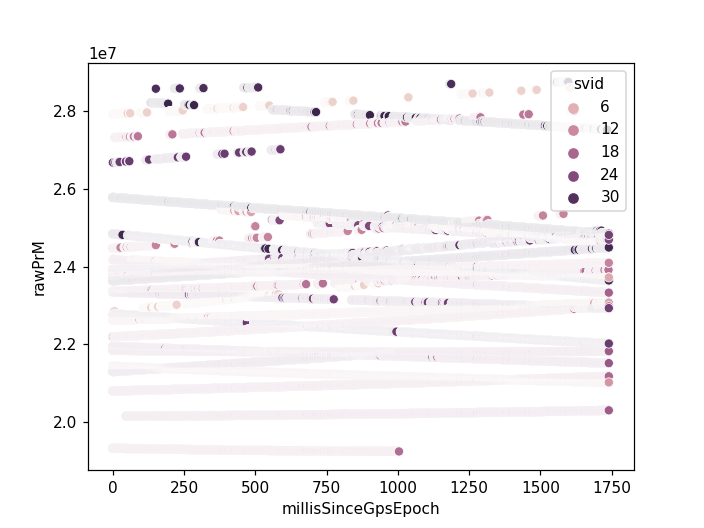

<AxesSubplot:xlabel='millisSinceGpsEpoch', ylabel='rawPrM'>

In [60]:
plt.figure()
sns.scatterplot(data=df.sort_values('millisSinceGpsEpoch'), x='millisSinceGpsEpoch', y='rawPrM', hue='svid')

#### ground truth vs. derived `millisSinceGpsEpoch` comparison
In order to further invistigate the relations between the derived data and the ground truth we will need to make sure these two datasets are synchronized.<br>
The following code will check whether the number of epochs is the derived dataset is correlated with the no. of epochs at ground truth dataset.<br>
Next we will check if the two datasets are aligned with each other.<br>

In [61]:
if derived['millisSinceGpsEpoch'].nunique() == ground['millisSinceGpsEpoch'].nunique():
    print("Derived and ground truth data has the same number of time ephocs")
    if np.all(derived['millisSinceGpsEpoch'] == ground['millisSinceGpsEpoch']):
        print("Derived and ground truth data are synchronized")
    else:
        print("Derived and ground truth data are not synchronized")
else:
    print("Derived and ground truth data has different number of time ephocs")

Derived and ground truth data has different number of time ephocs


* The baseline and derived are correlated. moreover baseline is genrated using derived dataset
* It seems that unfortunatly there is a difference between the timestamp of the samples in the ground truth
  and the baseline as shown in the following. there are some samples that are the same regarding the timestamp and others which not

Lets have a look at how the number of samples are distributed over the ground truth dataset determined by the different collections.<br>
Then we will try and compare it to the derived data set distribution

<IPython.core.display.Javascript object>


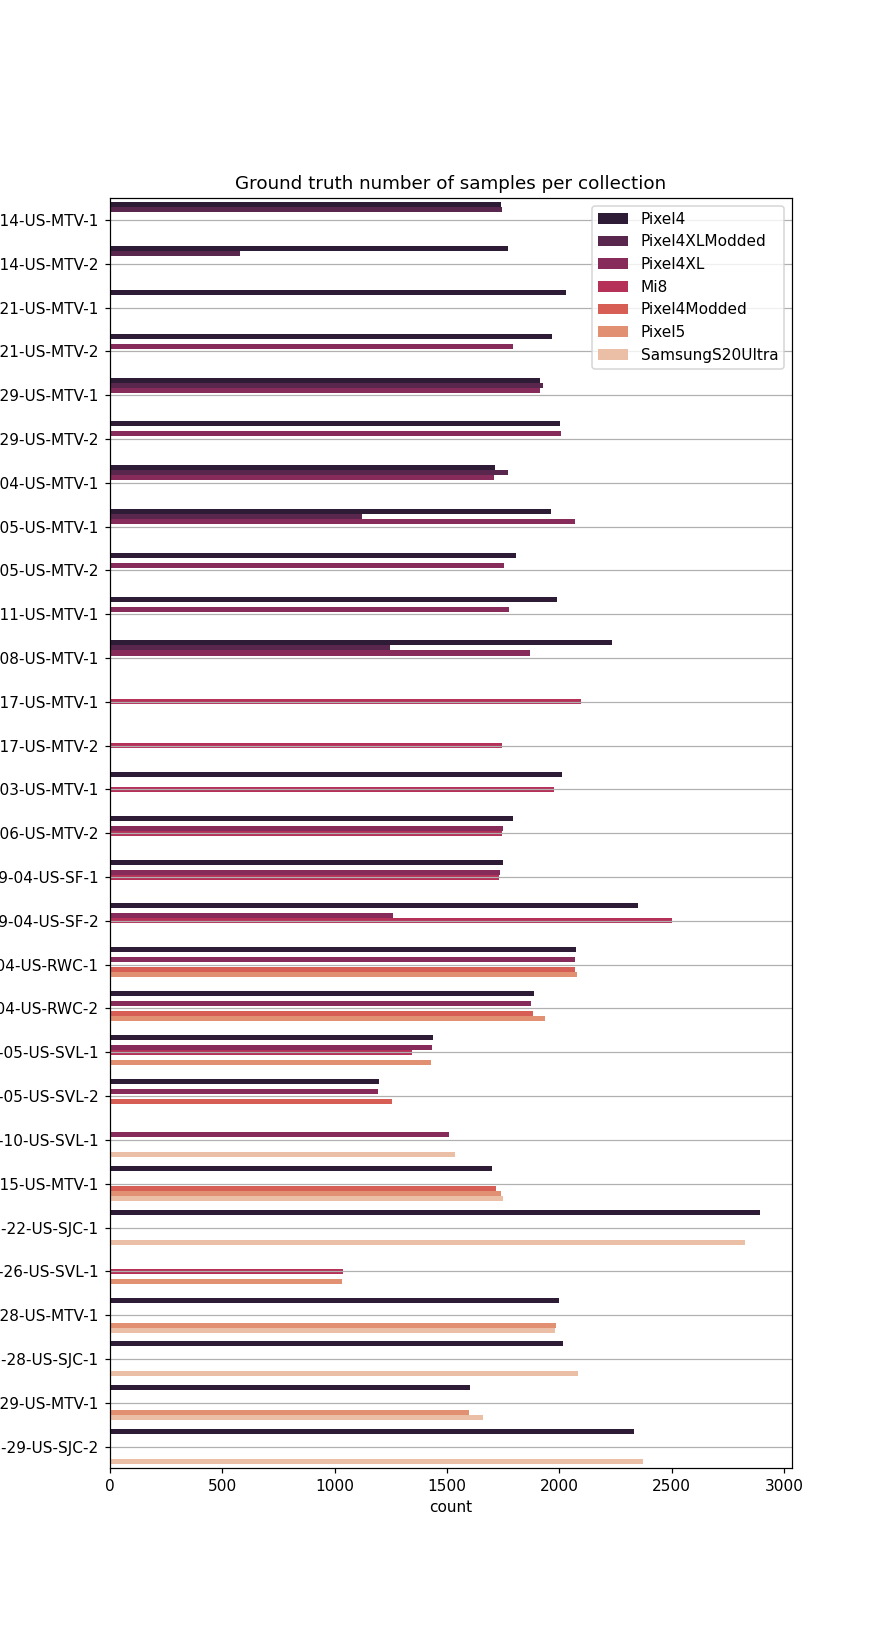

<IPython.core.display.Javascript object>


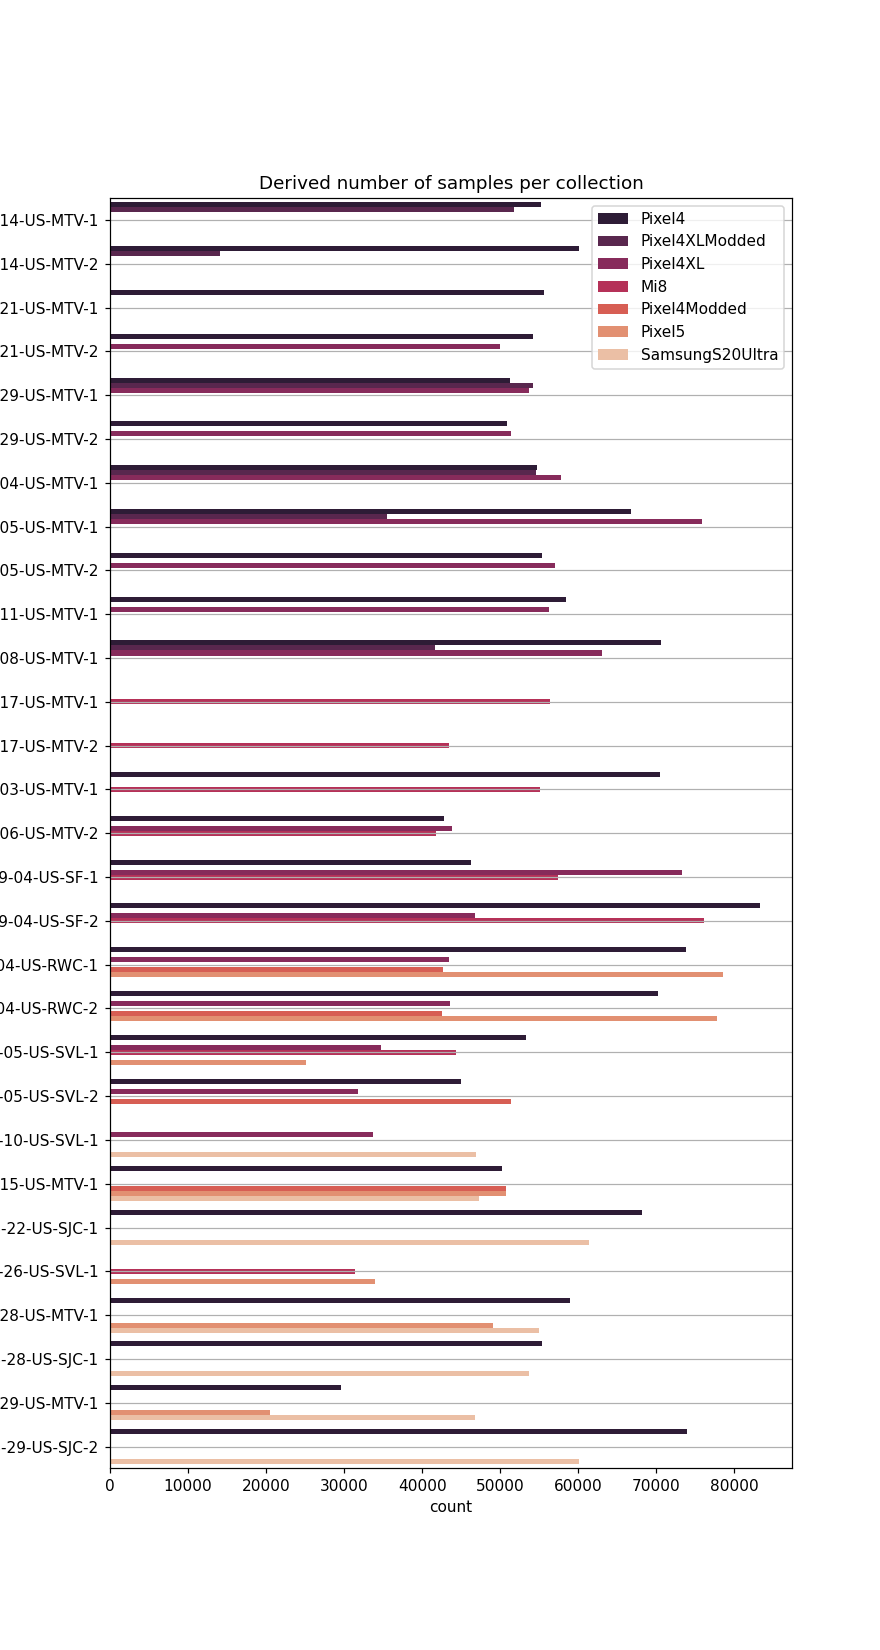

Text(0.5, 1.0, 'Derived number of samples per collection')

In [62]:
fig = plt.figure(figsize=(8,15))
ax = fig.gca()
sns.countplot(data=ground, y='collectionName', hue='phoneName', ax=ax, palette='rocket')
ax.legend(loc='upper right')
ax.yaxis.grid(True)
plt.title('Ground truth number of samples per collection')
fig = plt.figure(figsize=(8,15))
ax = fig.gca()
sns.countplot(data=derived, y='collectionName', hue='phoneName', ax=ax, palette='rocket')
ax.legend(loc='upper right')
ax.yaxis.grid(True)
plt.title('Derived number of samples per collection')

In the following chart we can see the distribution of number of rows at each collection over the dataset split by phoneName.<br>
On the upper chart we displayed the ground truth no. of samples and on the botton is the derived data.<br>
The horizontal axis represent the number of rows in the dataframes, the vertical axis is the collection name and the color represent the phone.<br>
We can notice right away few interesting things.<br>
<br>
Firstly derived collections contains a lot more data than the ground truth, which got us to think on the need to aggregate in the proper manner the measurements in order to archieve our target.<br>
The reasonably look at the same proportions.

The following code block will setup the constellation type mapping from the metadata for ease of chart reading.

In [63]:
constellations = pd.read_csv('./google-smartphone-decimeter-challenge/metadata/constellation_type_mapping.csv')
derived = derived.merge(constellations, on='constellationType', how='left')

The following chart would display several features  frequency disributions over pie charts.<br>
We chose to display the disribution of the phoneName, the signal type that has been recieved and the constellationType of the recieved satelite signals.<br>
The mobile device type distribution over test and train collections is identical as is aserted and displayed:

<IPython.core.display.Javascript object>


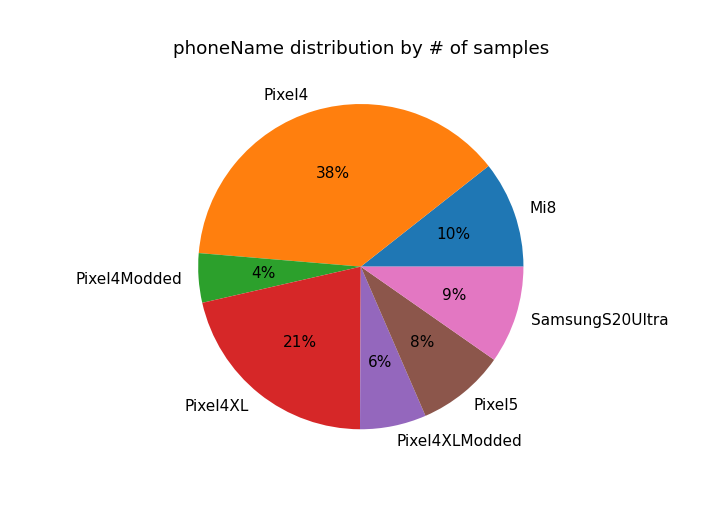

<IPython.core.display.Javascript object>


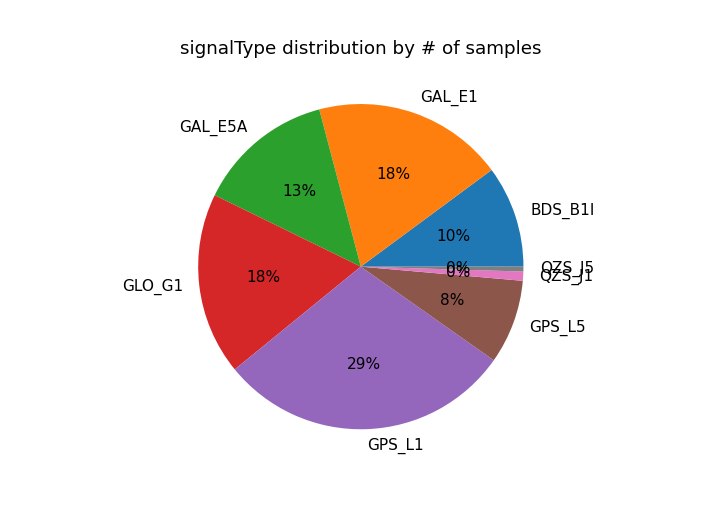

<IPython.core.display.Javascript object>


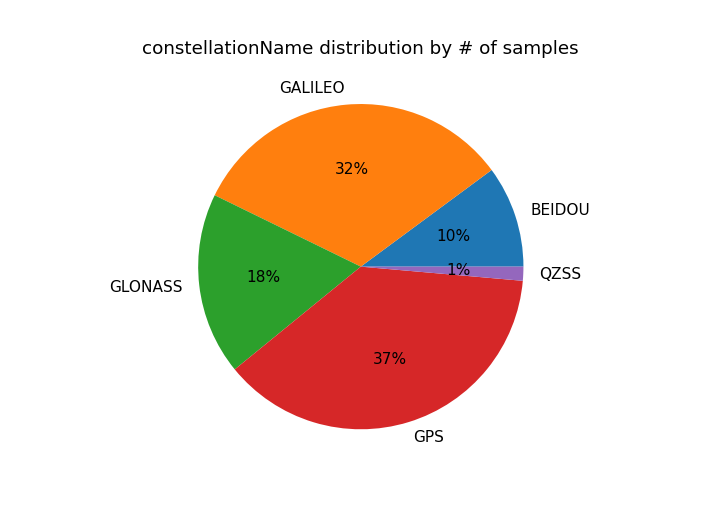

In [64]:
def pieplot_on_columns(data, columns):
    for c in columns:
        data_dist = data.groupby(c).size().to_frame('size')
        fig, ax = plt.subplots()
        ax.title.set_text(f'{c} distribution by # of samples')
        ax.pie(data_dist['size'], labels=list(data_dist.index), autopct=lambda x: f'{int(x)}%')
        plt.show()

pieplot_on_columns(derived, ['phoneName', 'signalType', 'constellationName'])

1. The vast majority of collections had been done using google's pixel4 phone.
2. As expected the dominant constilationType is GPS in the US but the majority of samples actually come from non US systems such as GALILEO (europe), GLONASS(Russia),<br>
Beidu and QZSS has small presence due to the fact that they are local systems that operates only in east asia.

In the following figure we are displaying a heatmap of the number of samples per satelite for each collection<br>

<IPython.core.display.Javascript object>


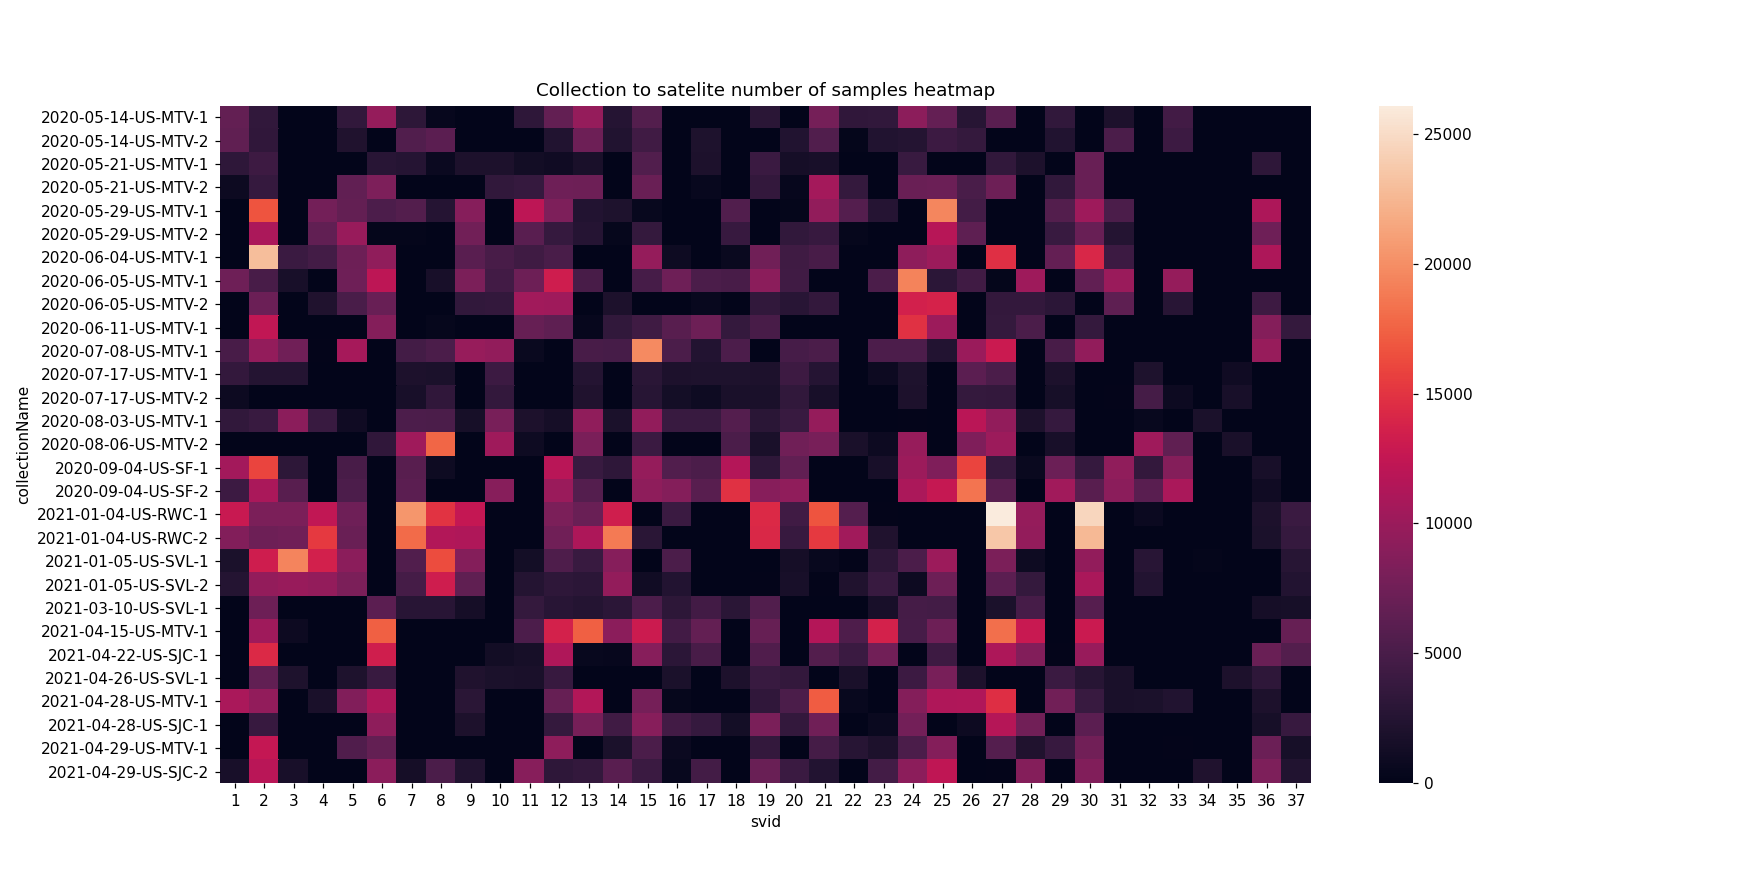

Text(0.5, 1.0, 'Collection to satelite number of samples heatmap')

In [65]:
d = derived[['collectionName', 'svid', 'millisSinceGpsEpoch']].groupby(['collectionName', 'svid']).count()
d.reset_index(inplace=True)
d = d.pivot_table(columns='svid', values='millisSinceGpsEpoch', index='collectionName', fill_value=0)
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
sns.heatmap(data=d, ax=ax)
plt.title("Collection to satelite number of samples heatmap")

Vertical axis is the name of the collection, the horizontal axis is the satelite id.<br>
The brighter the square is the more frequent the satelite is in the specific collection.<br>
We can notice the busier satelites are svid: 2, 27, 30.<br>
But we cannot jump to conclusions from this chart due to the fact that not every collection has been executed for the same time duration.<br>
the longer the collection is the more samples are and the more important it would look on the heatmap.

The following plots display the distribution of the X/Y/Z positions & velocity in the ECEF axis.<br>
the distribution of ionic sphere and tropo sphere delay in the samples.<br>
Another interesting feature we are looking at is the distribution of raw pseodo range.<br>
this represent the distribution of how far the satelites are from the android device.<br>

<IPython.core.display.Javascript object>


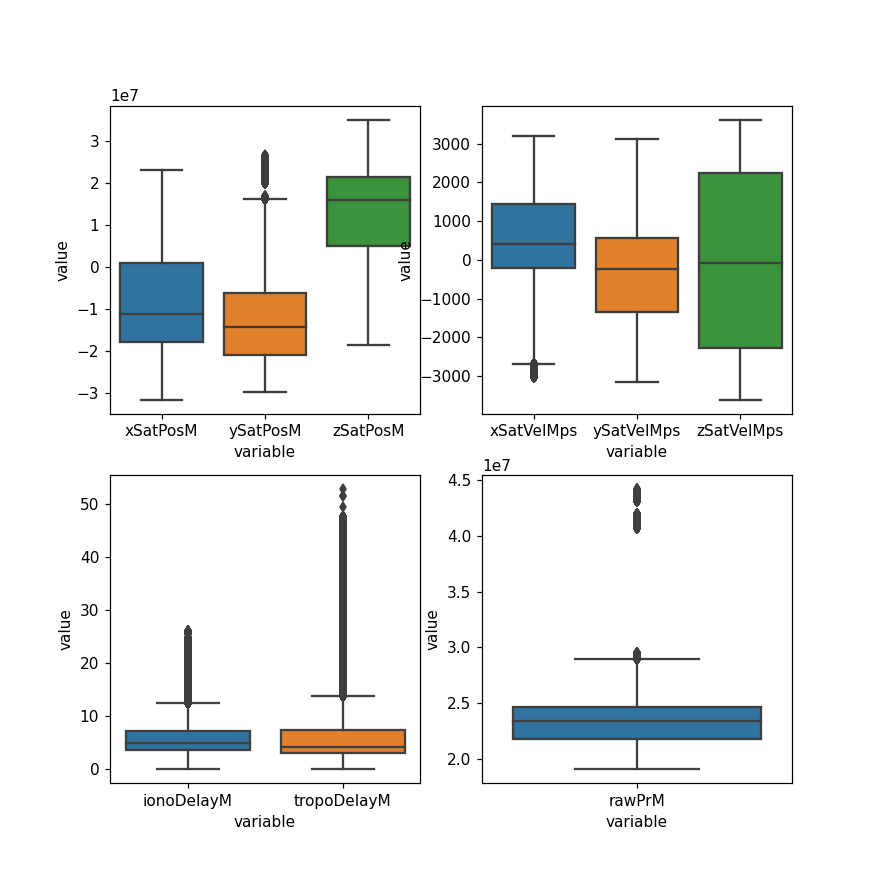

<AxesSubplot:xlabel='variable', ylabel='value'>

In [66]:
# plot constellation types
# plot signal types
# understand if all derived samples (key samples contain each of which signals and constellations)
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(8, 8, forward=True)
sns.boxplot(x='variable', y='value', data=pd.melt(derived[['xSatPosM', 'ySatPosM', 'zSatPosM']]), ax = axs[0][0])
sns.boxplot(x='variable', y='value', data=pd.melt(derived[['xSatVelMps', 'ySatVelMps', 'zSatVelMps']]), ax = axs[0][1])
sns.boxplot(x='variable', y='value', data=pd.melt(derived[['ionoDelayM', 'tropoDelayM']]), ax = axs[1][0])
sns.boxplot(data=pd.melt(derived[['rawPrM']]), x='variable',  y='value', ax= axs[1][1])

The distance from the satelites stays mostly betwween 2.2e7 to 2.5e7 with few outliers to the upper bound.<br>
therefore we probably will need to notice more subtle changes to predict accurratly the location

#### Let's explore how the GNSS derived data correlates to the ground truth via dimensionality reducation.
We will apply dimentionality reduction for better vizualizing our features and how they behave in comparison to the target vairables.<br>
Due to the multidimentionality of the target variables, we would try to reduce the dimension of the target variables and the heightAboveWgs84EllipsoidM to 1 dimension.<br>
Second, we would reduce selected features from derived data to 1 dimension<br>
Finally we would plot the data on 2d axis for vizualizing the data.<br>
We will perform the dimensionality reduction using Principal component analysis.

for ground truth and derived data correlation we will try to merge the two into one dataframe.<br>
the problem is that ground truth has less than half the amount of rows that derived dataset has.<br>
another problem from a glance at the two frames is that derived sometimes has a deviation of 1 millisecond from<br>
the ground truth sample time. We believe it is due to rounding error and therefore can be dissmissed.

In [67]:
grnd = ground.set_index(cpm)
drvd = derived.set_index(cpm)

In [68]:
drvd.loc[('2021-04-29-US-MTV-1', 'SamsungS20Ultra')]

index  constellationType  svid signalType  \
millisSinceGpsEpoch                                              
1303768905999            0                  1     5     GPS_L1   
1303768905999            1                  6    15     GAL_E1   
1303768905999            2                  6     2    GAL_E5A   
1303768905999            3                  5    37    BDS_B1I   
1303768905999            4                  6    25     GAL_E1   
...                    ...                ...   ...        ...   
1303770562999        46738                  1    24     GPS_L1   
1303770562999        46739                  3    12     GLO_G1   
1303770562999        46740                  6    30     GAL_E1   
1303770562999        46741                  6    36     GAL_E1   
1303770562999        46742                  1     6     GPS_L5   

                     receivedSvTimeInGpsNanos      xSatPosM      ySatPosM  \
millisSinceGpsEpoch                                                         
1303768905999             1303768904918543998 -5.735632e+06 -2.376539e+07   
1303768905999             1303768904912475406 -2.752211e+07 -1.064600e+07   
1303768905999             1303768904920020240 -8.497698e+06 -2.691271e+07   
1303768905999             1303768904924230145 -1.838037e+07 -1.985757e+07   
1303768905999             1303768904906337741  3.796777e+06 -2.778989e+07   
...                                       ...           ...           ...   
1303770562999             1303770562919750996 -2.015445e+07 -1.583397e+07   
1303770562999             1303770562932280741 -1.413451e+07 -5.151337e+06   
1303770562999             1303770562924562190 -1.671032e+07 -1.442913e+07   
1303770562999             1303770562914898507  7.813969e+06 -1.435789e+07   
1303770562999             1303770562923031481  9.412723e+06 -1.155083e+07   

                         zSatPosM  xSatVelMps  ySatVelMps  zSatVelMps  \
millisSinceGpsEpoch                                                     
1303768905999       -1.030570e+07     356.960   -1272.830    2795.430   
1303768905999       -2.240418e+06    -270.835      53.788    3066.244   
1303768905999        8.948457e+06    -184.086    -885.240   -2834.250   
1303768905999        6.877119e+06    -293.517    -742.300   -2932.788   
1303768905999       -9.466309e+06     -10.988     955.306   -2807.867   
...                           ...         ...         ...         ...   
1303770562999       -7.951423e+06    1005.485     137.872   -2874.177   
1303770562999        2.062870e+07   -1439.893   -2423.376   -1591.612   
1303770562999        1.971173e+07    -471.845   -1923.386   -1805.648   
1303770562999        2.468029e+07    2375.398     709.169    -338.338   
1303770562999        2.205161e+07    2421.179    1362.273    -314.901   

                     satClkBiasM  satClkDriftMps        rawPrM  rawPrUncM  \
millisSinceGpsEpoch                                                         
1303768905999         -12137.282          -0.000  2.427491e+07      4.497   
1303768905999         244893.013          -0.001  2.609423e+07      8.394   
1303768905999          64655.861           0.001  2.383234e+07     15.289   
1303768905999        -271096.166           0.003  2.257024e+07      6.595   
1303768905999        -159600.229          -0.000  2.793425e+07     12.591   
...                          ...             ...           ...        ...   
1303770562999          13606.904           0.009  2.421285e+07      6.895   
1303770562999          67423.537           0.001  2.045653e+07     21.885   
1303770562999         894873.398          -0.009  2.277049e+07      8.994   
1303770562999         -60090.310          -0.002  2.566759e+07     23.384   
1303770562999           3375.448           0.001  2.322939e+07      4.797   

                      isrbM  ionoDelayM  tropoDelayM  \
millisSinceGpsEpoch                                    
1303768905999         0.000      10.407       10.322   
1303768905999         1.509       7.901 

In [69]:
grnd.loc[('2021-04-29-US-MTV-1', 'SamsungS20Ultra')]

index     latDeg      lngDeg  heightAboveWgs84EllipsoidM  \
millisSinceGpsEpoch                                                             
1303768905000            0  37.395822 -122.102928                       58.96   
1303768906000            1  37.395822 -122.102928                       58.96   
1303768907000            2  37.395822 -122.102928                       58.96   
1303768908000            3  37.395822 -122.102928                       58.96   
1303768909000            4  37.395822 -122.102928                       58.96   
...                    ...        ...         ...                         ...   
1303770559000         1654  37.395818 -122.102918                       58.81   
1303770560000         1655  37.395818 -122.102918                       58.81   
1303770561000         1656  37.395818 -122.102918                       58.81   
1303770562000         1657  37.395818 -122.102918                       58.81   
1303770563000         1658  37.395818 -122.102918                       58.81   

                     timeSinceFirstFixSeconds  hDop  vDop  speedMps  \
millisSinceGpsEpoch                                                   
1303768905000                           104.0   1.9   0.0       0.0   
1303768906000                           105.0   1.9   0.0       0.0   
1303768907000                           106.0   1.9   0.0       0.0   
1303768908000                           107.0   1.9   0.0       0.0   
1303768909000                           108.0   1.9   0.0       0.0   
...                                       ...   ...   ...       ...   
1303770559000                          1758.0   0.9   0.0       0.0   
1303770560000                          1759.0   0.9   0.0       0.0   
1303770561000                          1760.0   0.9   0.0       0.0   
1303770562000                          1761.0   0.9   0.0       0.0   
1303770563000                          1762.0   0.9   0.0       0.0   

                     courseDegree  
millisSinceGpsEpoch                
1303768905000               118.3  
1303768906000               118.3  
1303768907000               118.3  
1303768908000               118.3  
1303768909000               118.3  
...                           ...  
1303770559000               117.6  
1303770560000               117.6  
1303770561000               117.6  
1303770562000               117.6  
1303770563000               117.5  

[1659 rows x 9 columns]

As we suspected for a simple collection there are more than x46 rows at derived and the epochs are mostly off by 1 millisecond.<br>
to fix this problem when we use merge we will use more flexible merge function that will have a tolerence of 1 millisecond forward that 1303770562999 will be the same as 1303770563000.

In [70]:
drvdGrnd = pd.merge_asof(derived.sort_values('millisSinceGpsEpoch'), ground.sort_values('millisSinceGpsEpoch'), on='millisSinceGpsEpoch',
              suffixes=['_drvd', '_grnd'], tolerance=1, by=['collectionName', 'phoneName'], direction='forward')

Let's see how much missing values exists in our dataframe

In [71]:
drvdGrnd.isna().sum()

index_drvd                      0
collectionName                  0
phoneName                       0
millisSinceGpsEpoch             0
constellationType               0
svid                            0
signalType                      0
receivedSvTimeInGpsNanos        0
xSatPosM                        0
ySatPosM                        0
zSatPosM                        0
xSatVelMps                      0
ySatVelMps                      0
zSatVelMps                      0
satClkBiasM                     0
satClkDriftMps                  0
rawPrM                          0
rawPrUncM                       0
isrbM                           0
ionoDelayM                      0
tropoDelayM                     0
millisSinceGpsEpoch_drvd        0
constellationName               0
index_grnd                    150
latDeg                        150
lngDeg                        150
heightAboveWgs84EllipsoidM    150
timeSinceFirstFixSeconds      150
hDop                          150
vDop          

150 rows only in the ground truth columns, probably due to bigger deviation in the millisSinceGpsEpoch.<br>
due to the low rate of missing values we can simply discard them in order to calculate PCA.

In [72]:
drvdGrnd.dropna(inplace=True)

For better results before performing PCA it is usually recommended to perform normalization on the data.<br>
We will use sklearn StandardScaler.

In [73]:
from sklearn.preprocessing import StandardScaler
scaler_y = StandardScaler()
scaler_y.fit(drvdGrnd[['latDeg', 'lngDeg', 'heightAboveWgs84EllipsoidM', 'courseDegree', 'speedMps']])
drvdGrnd_normed_y = scaler_y.transform(drvdGrnd[['latDeg', 'lngDeg', 'heightAboveWgs84EllipsoidM', 'courseDegree', 'speedMps']])

scaler_x_ss = StandardScaler()
scaler_x.fit(drvdGrnd[['xSatPosM', 'ySatPosM', 'zSatPosM', 'xSatVelMps', 'ySatVelMps', 'zSatVelMps', 'ionoDelayM', 'tropoDelayM', 'rawPrM', 'rawPrUncM', 'isrbM']])
drvdGrnd_normed_x = scaler_x.transform(drvdGrnd[['xSatPosM', 'ySatPosM', 'zSatPosM', 'xSatVelMps', 'ySatVelMps', 'zSatVelMps', 'ionoDelayM', 'tropoDelayM', 'rawPrM', 'rawPrUncM', 'isrbM']])

In [74]:
from sklearn.decomposition import PCA

pca_y = PCA(n_components=1) 
y_transformed = pca_y.fit_transform(drvdGrnd_normed_y) 
pca_x = PCA(n_components=1) 
x_transformed = pca_x.fit_transform(drvdGrnd_normed_x) 

<IPython.core.display.Javascript object>


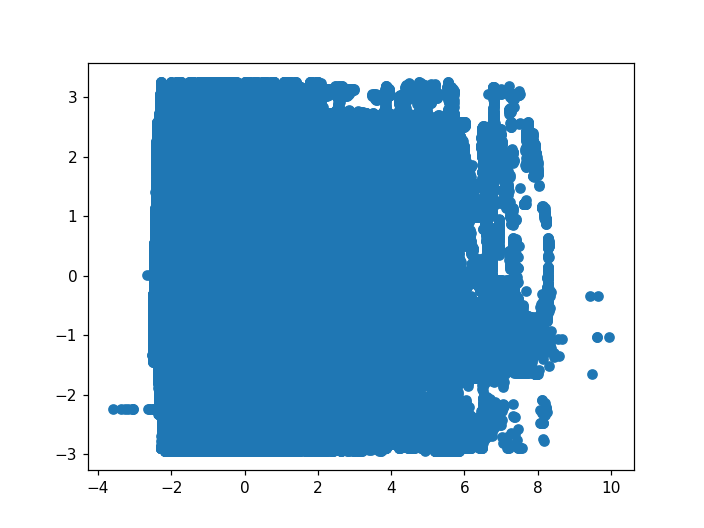

In [75]:
plt.figure()
plt.scatter(x=x_transformed, y = y_transformed)

on the horizontal axis the derived data principal component of 1 component is set.<br>
on the vertical axis the ground truth data principal component of 1 component is set.<br>
As you can see it is a big mesh of a plot with no actual value for us beside that it looks kind of squarish?

From the derived data it seems that at least for us it would be very hard to archive some kind of location calculation function without any previous domain knowledge in this field<br>
Therefore we will try to firstly test how can we perform on much more simpler dataset, baseline, that contains already aggregated features.<br>
The baseline can actually be our guideline and our model will just incorperate multiple samples and take better predictions that make small but accurate deviation from the baseline.<br>
Later on we can try to incorprate the derived data but due to the fact that we don't know how to calculate lat/lon data from this raw measurements<br>
maybe it would be best to simply use neural network to calculate it for us.<br>

First of all we must explore the baseline dataframe to know how get around with it.

---------------------------------------------

# Feature Engineering & data preperation

* Clean the data from unwanted values
* Generate added value features that can benefit our module.
* Prepare the data for training and prediction.

## Clean the data

<ipython-input-76-d982267a7ae7>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15, 4))


<IPython.core.display.Javascript object>


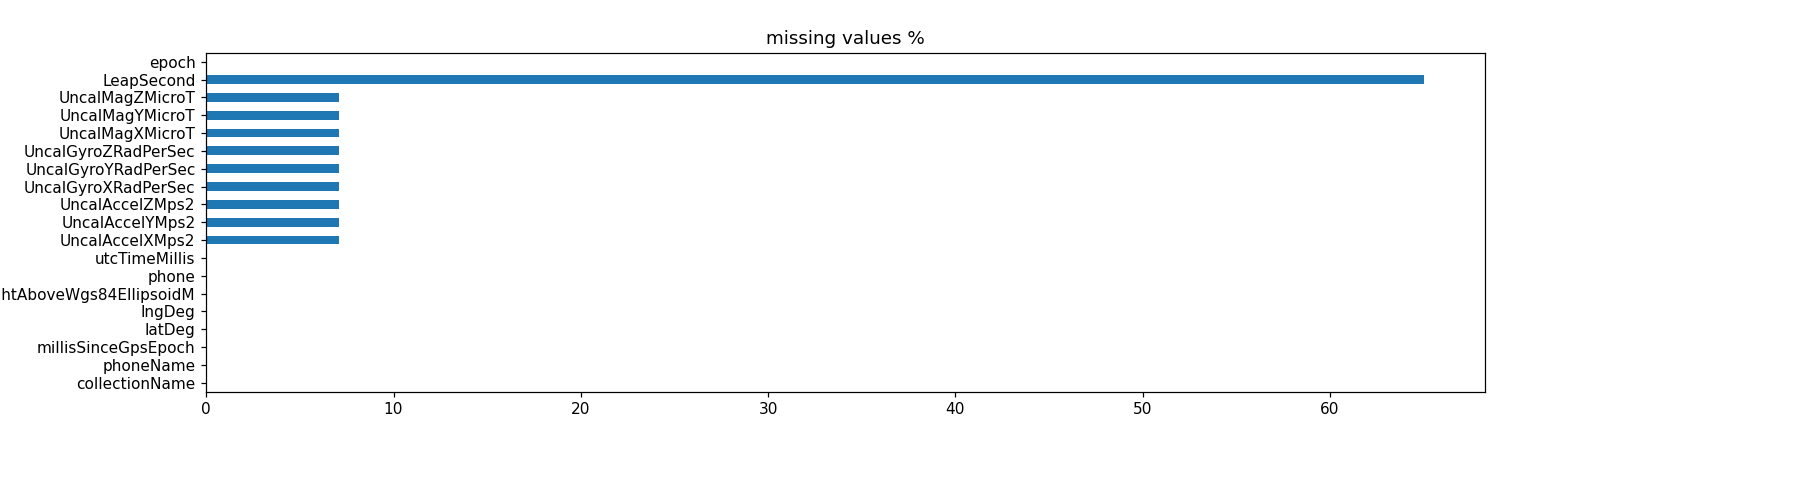

Text(0.5, 1.0, 'missing values %')

In [76]:
plt.figure(figsize=(15, 4))
((bsln_trn.isna().sum(axis=0)/len(bsln_trn))*100).plot.barh()
plt.title("missing values %")

Because leapsecond almost does not exists in the dataset (more than 60% is missing) we will discard this column

In [77]:
bsln_trn.drop('LeapSecond', axis=1, inplace=True)

The missing values we will fill the following<br>
UncalAccelXMps2 - We assume constant speed (in the collections the data revolved around the zero term)<br>
UncalAccelYMps2 - We assume constant speed (in the collections the data revolved around the zero term)<br>
UncalAccelZMps2 - Besides the freefall given by earth's gravity we assume constant speed (in the collections the data revolved around the zero term).<br>
<br>
As seen from the plots most of the datapoints are around zero and it is logical to assume so because we mostly drive horizontaly.<br>
Therefore we will fill the UncalGyro[X/Y/Z]RadPerSec with 0 degrees.<br>
<br>
For uncalibrated readings from the magnetometer we will use fill with mean value.

In [78]:
bsln_trn['UncalAccelXMps2'].fillna(0, inplace=True)
bsln_trn['UncalAccelYMps2'].fillna(0, inplace=True)
bsln_trn['UncalAccelZMps2'].fillna(9.81, inplace=True)
bsln_trn['UncalGyroXRadPerSec'].fillna(0, inplace=True)
bsln_trn['UncalGyroYRadPerSec'].fillna(0, inplace=True)
bsln_trn['UncalGyroZRadPerSec'].fillna(0, inplace=True)
bsln_trn['UncalMagXMicroT'].fillna(bsln_trn['UncalMagXMicroT'].mean(), inplace=True)
bsln_trn['UncalMagYMicroT'].fillna(bsln_trn['UncalMagYMicroT'].mean(), inplace=True)
bsln_trn['UncalMagZMicroT'].fillna(bsln_trn['UncalMagZMicroT'].mean(), inplace=True)

## Baseline smoothing

As said previous we would like to smooth out the locations because the base assumption is that changes in the locations aren't very big and can be calculated.<br>
offcourse it is not the case but the current locations are way too jitter for it to be a real sequence of movement therefore a smoothing algorithm should be applyed<br>
we chose kalman filter because it is a known practice in the navigation industry<br>

### Kalman filter
The kalman filter is a method to smooth estimated measurements using its noise.<br>
The filter works iterativly on timeseries data, at each epoch the `Kalman Gain` is calculated `KG = ERR_EST / (ERR_EST + ERR_MEA)`,<br> whereas `ERR_EST` represent the error in the estimation and `ERR_MEA` represent the error in the measurement.<br>
Then the new estimated position is calculated using The following equation `EST_t-1 + KG(EST_t - EST_t-1)` <br>
then the new error in the estimation is calculated using `(1-KG)ERR_MEA`.<br>
This set of iterativly equations will determine the weight to give to each estimation over time and will smooth out the estimations

In [79]:
phone_col = 'phonePath'
bsln_trn[phone_col] = bsln_trn['collectionName'] + bsln_trn['phoneName']
lat_col = 'latDeg'
lon_col = 'lngDeg'

In [80]:
T = 1.0
state_transition = np.array([[1, 0, T, 0, 0.5 * T ** 2, 0], [0, 1, 0, T, 0, 0.5 * T ** 2], [0, 0, 1, 0, T, 0],
                             [0, 0, 0, 1, 0, T], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1]])
process_noise = np.diag([1e-5, 1e-5, 5e-6, 5e-6, 1e-6, 1e-6]) + np.ones((6, 6)) * 1e-9
observation_model = np.array([[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0]])
observation_noise = np.diag([5e-5, 5e-5]) + np.ones((2, 2)) * 1e-9

kf = simdkalman.KalmanFilter(
        state_transition = state_transition,
        process_noise = process_noise,
        observation_model = observation_model,
        observation_noise = observation_noise)

def apply_kf_smoothing(df, kf_=kf):
    unique_paths = df[phone_col].unique()
    for phone in tqdm(unique_paths):
        data = df.loc[df[phone_col] == phone][[lat_col, lon_col]].values
        data = data.reshape(1, len(data), 2)
        smoothed = kf_.smooth(data)
        df.loc[df[phone_col] == phone, lat_col] = smoothed.states.mean[0, :, 0]
        df.loc[df[phone_col] == phone, lon_col] = smoothed.states.mean[0, :, 1]
    return df

In [82]:
bsln_trn_orig = bsln_trn.copy()
bsln_trn_sm = apply_kf_smoothing(bsln_trn)
bsln_trn_sm['latDeg_bsln_k'] = bsln_trn_sm['latDeg']
bsln_trn_sm['lngDeg_bsln_k'] = bsln_trn_sm['lngDeg']
target = target.merge(bsln_trn_sm[['latDeg_bsln_k', 'lngDeg_bsln_k', 'collectionName', 'phoneName', 'millisSinceGpsEpoch']], on=cpm, how='left')
target['bsln_grnd_kalman'] = calc_haversine(target['latDeg_grnd'], target['lngDeg_grnd'], target['latDeg_bsln_k'], target['lngDeg_bsln_k'])
target[['bsln_grnd_kalman', 'bsln_grnd_distance']].describe()

  0%|          | 0/73 [00:00<?, ?it/s]

bsln_grnd_kalman  bsln_grnd_distance
count     131342.000000       131342.000000
mean           3.390778            3.846848
std           15.887458           30.739767
min            0.006592            0.001338
25%            1.068023            1.210976
50%            1.803985            2.065769
75%            3.030163            3.560001
max         2456.422178         8340.257976

Few things we notice right away is that the standard diviation decreased significantly by half.<br>
Meaning our data is now much less noisy and jumpy, <br>
The maximum value had reduced it's error to by more than 70% while the minimum value had been raised quite sharply by 600%.<br>
All the other metrics had been benifited from the kalman smoothing which decreased the error.

<IPython.core.display.Javascript object>


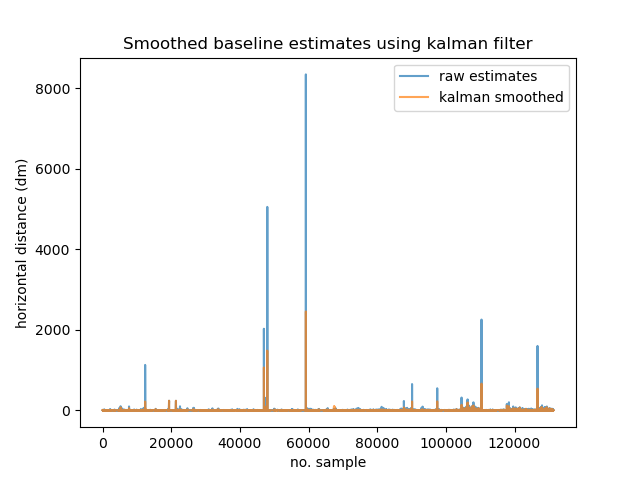

In [1056]:
plt.figure()
plt.plot(range(target.shape[0]), target['bsln_grnd_distance'], label='raw estimates', alpha=0.7);
plt.plot(range(target.shape[0]), target['bsln_grnd_kalman'], label='kalman smoothed', alpha=0.7); 
plt.title('Smoothed baseline estimates using kalman filter'); 
plt.xlabel('no. sample'); 
plt.ylabel('horizontal distance (dm)')
plt.legend()

We can notice some of our highst peaks in the error distance had been lowered.<br>
Overall nice smooth action which flatted out some jittery predictions

In [1068]:
score_curr = haversine_50thP_95thP_mean(target['latDeg_grnd'], target['lngDeg_grnd'], target['latDeg_bsln_k'], target['lngDeg_bsln_k'])
print("{}dm error rate from our evaluation metric.\n an impovement of {}dm".format(score_curr, score_prev-score_curr))

5.493213613170669dm error rate from our evaluation metric.
 an impovement of 0.7720393979968945dm


An improvement of 0.77m simply by using kalman filter with basic hyperparameters.<br>
In the future we would like to tune the kalman filter hyperparameters for better results and even incorprate measurements from other devices like accelometer and gyro.

### Mean latDeg & lngDeg in baseline dataset over phones at the same epoch
Each collection is made by driving car using one or more androind deviced to collect GNSS logs.<br>
At each epoch several devices can collect GNSS data. Each of them should have the same lat/lng position<br>
Therefore we would average over the devices the lat lng degrees.<br>
As we can see not all the phones in our collections are synchronyzed.<br>
Therefore we would like to mean the bucket of quarter of the seconds of epochs to leave some space for unsynchronized phones to average themeself.<br>
The choice of 250 milliseconds was made by trial and error.<br>
When averaging the prediction we use the assumption that the speed between each 250ms bucket is at max 65 mph (California highway speed limit) which between each bucket leave room for 3.6m error after averaging. most of the driving in the dataset is <br>made within the city, with a presumably much lower average speed so the error is much less critical.<br> Further invistagation regarding the speed at which the samples where taken will be introduced later in the project.

In [1070]:
#bsln_trn = bsln_trn_sm.copy()
bsln_trn.sort_values(cpm, inplace=True)
bsln_trn['qsSinceGpsEpoch'] = bsln_trn.millisSinceGpsEpoch//250
bsln_trn['millisSinceFirstEpoch'] = bsln_trn.millisSinceGpsEpoch - min(bsln_trn.millisSinceGpsEpoch)

df = bsln_trn.groupby(['collectionName', 'qsSinceGpsEpoch']).agg({'latDeg': [ np.mean ], 'lngDeg': [ np.mean ], 'phoneName': [list], 'millisSinceFirstEpoch': [list]})
bsln_mean_smoothed = pd.merge(bsln_trn, df.reset_index(), how='left', on=['collectionName', 'qsSinceGpsEpoch'], suffixes=('raw', 'mean'))
score_prev = score_curr
score_curr = haversine_50thP_95thP_mean(target['latDeg_grnd'], target['lngDeg_grnd'], bsln_mean_smoothed[('latDeg','mean')], bsln_mean_smoothed[('lngDeg','mean')])
print("{}dm error rate from our evaluation metric.\n an impovement of {}dm".format(score_curr, score_prev-score_curr))

C:\Users\nitza\Documents\Python\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)
C:\Users\nitza\Documents\Python\anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


5.214282246567359dm error rate from our evaluation metric.
 an impovement of 0.2789313666033095dm


An improvement of 2.7 cm, not much but still not bad for simply avrage the different phones measurements over one sample.<br> It gets us to an error of 5.21dm even before applying any ML model

In [86]:
target['bsln_grnd_kalman_mean_smooth'] = calc_haversine(target['latDeg_grnd'], target['lngDeg_grnd'], bsln_mean_smoothed[('latDeg','mean')], bsln_mean_smoothed[('lngDeg','mean')])
target[['bsln_grnd_kalman_mean_smooth', 'bsln_grnd_kalman', 'bsln_grnd_distance']].describe()

bsln_grnd_kalman_mean_smooth  bsln_grnd_kalman  bsln_grnd_distance
count                 131342.000000     131342.000000       131342.000000
mean                       3.234741          3.390778            3.846848
std                       15.803052         15.887458           30.739767
min                        0.000825          0.006592            0.001338
25%                        0.960937          1.068023            1.210976
50%                        1.663497          1.803985            2.065769
75%                        2.854545          3.030163            3.560001
max                     2456.422178       2456.422178         8340.257976

All metrics look a bit better for our smoothed version

<IPython.core.display.Javascript object>


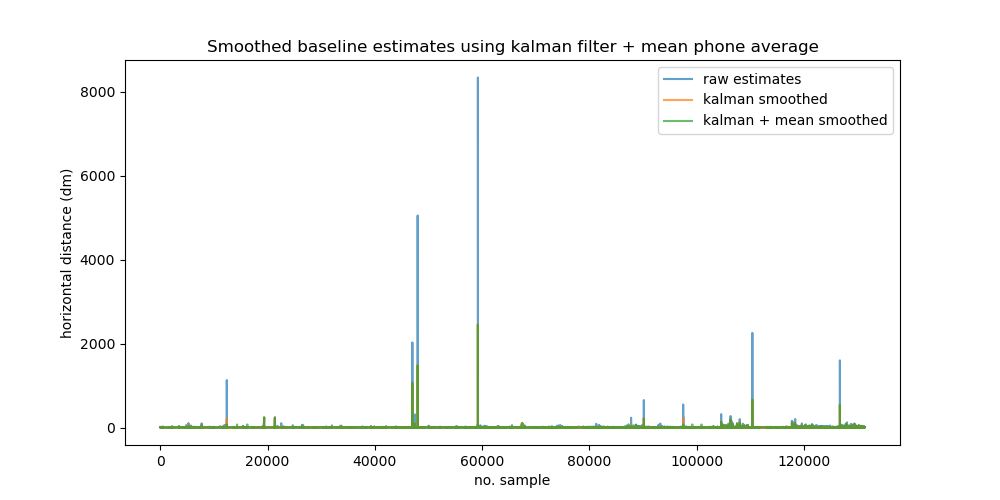

In [1065]:
plt.figure(figsize=(10,5))
plt.plot(range(target.shape[0]), target['bsln_grnd_distance'], label='raw estimates', alpha=0.7);
plt.plot(range(target.shape[0]), target['bsln_grnd_kalman'], label='kalman smoothed', alpha=0.7);
plt.plot(range(target.shape[0]), target['bsln_grnd_kalman_mean_smooth'], label='kalman + mean smoothed', alpha=0.7);
plt.title('Smoothed baseline estimates using kalman filter + mean phone average'); 
plt.xlabel('no. sample'); 
plt.ylabel('horizontal distance (dm)')
plt.legend()

Some smaller peaks had been smoothed. some had been lowered down, while some more accurate measurements had been pulled upwards<br>
Overall it seems much better than the raw baseline measurements

In [88]:
def assignCommonColumns(left, right, columns={'latDeg': 'latDeg', 'lngDeg': 'lngDeg'}, on=cpm):
    """
    The following is a helper procedure for assignment of columns
    with keeping the rows aligned.
    
    Parameters
    ==========
    left - left dataframe used in merge
    right - right dataframe used in merge
    columns - columns to assign to the left from the right, must exist on both dataframes
        defaults to {'latDeg': 'latDeg', 'lngDeg': 'lngDeg'}
    on - common columns that indicate specific datapoints for merge
        defaults to ['collectionName', 'phoneName', 'millisSinceGpsEpoch']
    """
    right_columns = list(set(on).union(set(columns.values())))
    df = pd.merge(left, right[right_columns], how='inner', on=on)
    for column in columns.keys():
        if columns[column] == column:
            df[column] = df[column+'_y']
            df.drop([column+'_x',column+'_y'],axis=1,inplace=True)
        else:
            df[column] = df[columns[column]]
            df.drop(columns[column],axis=1,inplace=True)
    return df

In [89]:
target = assignCommonColumns(target, bsln_mean_smoothed, columns={'latDeg_bsln_k_mean': ('latDeg','mean'), 'lngDeg_bsln_k_mean': ('lngDeg','mean')})
bsln_trn = assignCommonColumns(bsln_trn, bsln_mean_smoothed, columns={'latDeg': ('latDeg','mean'), 'lngDeg': ('lngDeg','mean')})

C:\Users\nitza\Documents\Python\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [90]:
def evaluate(truth, data, suffixes=('',''), latcol = 'latDeg', lngcol='lngDeg'):
    """
    This function is set to evaluate the haversine_50thP_95thP_mean of two datasets.
    
    Parameters
    ==========
    truth - ground truth dataframe
    data - predictions dataframe
    latcol - latitude degrees column name in the datasets. defaults to 'latDeg'
    latcol - longitude degrees column name in the datasets. defaults to 'lngDeg'
    suffixes - suffixes for the truth dataset and data dataset.
    
    Returns
    =======
    the haversine_50thP_95thP_mean of the two datasets
    """
    truthLat=latcol+suffixes[0]
    truthLng=latcol+suffixes[1]
    dataLat=lngcol+suffixes[0]
    dataLng=lngcol+suffixes[1]
    
    #df = assignCommonColumns(truth, data, columns={ latcol+suffixes[0]: latcol+suffixes[1], lngcol+suffixes[0]: lngcol+suffixes[1]})
    return haversine_50thP_95thP_mean(np.array(truth[latcol+suffixes[0]]), 
                                      np.array(truth[lngcol+suffixes[0]]), 
                                      np.array(data[latcol+suffixes[1]]), 
                                      np.array(data[lngcol+suffixes[1]]))

In [91]:
if isSynched(bsln_trn, ground):
    print("score: {}".format(evaluate(bsln_trn, ground)))
else:
    print("Baseline and ground are somehow unsynched")

score: 5.214282246567359


In [92]:
#target['latDeg_bsln'] = bsln_trn['latDeg']
#target['lngDeg_bsln'] = bsln_trn['lngDeg']
assignCommonColumns(target, bsln_trn, columns={'latDeg_bsln': 'latDeg', 'lngDeg_bsln': 'lngDeg'})
drawRandomPath(collection='2021-04-29-US-MTV-1', phone='Pixel4', mapName='2021-04-29-US-MTV-1-Pixel4-Smoothed')

Pixel4 2021-04-29-US-MTV-1


In comparison to our previous plot this heat map look much concentraited and much better as a path of movement<br>
You can see this along the turns, the points are managing to stay somewhat together and less spreadout.

##### Calculate corrected pseudo range

With these derived values, a corrected pseudorange (i.e. a closer approximation to the geometric range from the phone to the satellite) can be computed as: correctedPrM = rawPrM + satClkBiasM - isrbM - ionoDelayM - tropoDelayM. The baseline locations are computed using correctedPrM and the satellite positions, using a standard Weighted Least Squares (WLS) solver, with the phone's position (x, y, z), clock bias (t), and isrbM for each unique signal type as states for each epoch.

In [556]:
derived['correctedPrM'] = derived['rawPrM'] + derived['satClkBiasM'] - derived['isrbM'] - derived['ionoDelayM'] -derived['tropoDelayM']

#####  Foreach sample take the previous location of the phone

As timeseries nature of the collection it is expected to give our previous estimation weight in our current estimation calculation

In [94]:
bsln_trn['latDeg_prv'] = bsln_trn['latDeg']
bsln_trn['lngDeg_prv'] = bsln_trn['lngDeg']
bsln_trn.loc[bsln_trn['collectionName']==bsln_trn.shift()['collectionName'], 'latDeg_prv'] = bsln_trn.shift()['latDeg']
bsln_trn.loc[bsln_trn['collectionName']==bsln_trn.shift()['collectionName'], 'latDeg_prv'] = bsln_trn.shift()['lngDeg']

##### Add datetime timestamps

For the ease of analysis create timestamp columns which are much more human readable than `millisSinceGpsEpoch`<br>
note - `millisSinceGpsEpoch` is the milliseconds passed since 6th Jan 1980

In [95]:
baseTime = datetime.datetime(1980,1,6,0,0,0,0)
derived['epoch_timestamp'] = derived['millisSinceGpsEpoch'].apply(lambda x: datetime.datetime.fromtimestamp(baseTime.timestamp()+x/1000.0))
ground['epoch_timestamp'] = ground['millisSinceGpsEpoch'].apply(lambda x: datetime.datetime.fromtimestamp(baseTime.timestamp()+x/1000.0))
bsln_trn['epoch_timestamp'] = bsln_trn['millisSinceGpsEpoch'].apply(lambda x: datetime.datetime.fromtimestamp(baseTime.timestamp()+x/1000.0))

To make use of the derived dataset we will narrow it down to collection-phone-epoch samples which each samples contains the relative <br>
information regarding each satelite in the sample. If the satelite is not appearing in the current measurement all it's fields would <br>
There are usually more than 1 sample per specific `collectionName`-`phoneName`-`millisSinceGpsEpoch`-`svid` therefore we will<br> groupby this key and use mean on our numric features before using pivot table.<br>
correspondedly be equal to NaN. We cannot simply use 0 as our distance from them and wrap it up with `fillna(0)` <br>
We would have to find a way to make our model ignore these values, because there is no such thing as minus distance from earth <br>
We will assign NaN distances with `-max(correctedPrM)` to make sure our module is encourged to diffrentiate it from the true measurements and ignore it<br>

In [96]:
features = {'correctedPrM', 'xSatPosM', 'ySatPosM', 'zSatPosM', 'constellationType', 'xSatVelMps', 'ySatVelMps', 'zSatVelMps', 'satClkBiasM', 'satClkDriftMps'  }
df = derived[list(features.union({'collectionName', 'phoneName', 'millisSinceGpsEpoch', 'svid'}))].groupby(['collectionName', 'phoneName', 'millisSinceGpsEpoch', 'svid']).mean()
piv = df.pivot_table(values=list(features), index=['collectionName', 'phoneName', 'millisSinceGpsEpoch'], columns=['svid'])
grouped = derived[['phoneName','collectionName', 'millisSinceGpsEpoch', 'receivedSvTimeInGpsNanos', 'epoch_timestamp']].groupby(['phoneName', 'millisSinceGpsEpoch']).max()
piv = piv.merge(grouped, on=['phoneName', 'millisSinceGpsEpoch'])
piv.fillna(-max(derived['correctedPrM']), inplace=True)

C:\Users\nitza\Documents\Python\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (2 levels on the left,1 on the right)
  warnings.warn(msg, UserWarning)


### Try and correlate the derived data to the ground truth

As we seen before, the number of derived epochs is different that the number of epoch is ground truth dataset. <br>
This is a huge problem because we need to correlate the target data to the training data. <br>
Our main objective is to predict accurratly the lat/lng position of the phone in the world using the derived data and baseline data.
<br>
One obsticle in doing so is that the derived dataset grouped by time epochs does not necesseraly own the same time epochs as baseline.<br>
This problem reoccurres again when trying to compare to the target data.<br>
So before we even do any training we need to figure out the cause for this incosistency. Or at least when does it occurres and at which scale.

In [97]:
bsln_trn['epoch_timestamp'] = bsln_trn['millisSinceGpsEpoch'].apply(lambda x: datetime.datetime.fromtimestamp(baseTime.timestamp()+x/1000.0))

In [98]:
bsln = bsln_trn.set_index('millisSinceGpsEpoch').sort_index()
piv = piv.reset_index().set_index('millisSinceGpsEpoch').sort_index()
df = pd.merge_asof(bsln, piv, on='millisSinceGpsEpoch',by='phoneName', suffixes=('_bsln', '_piv'), direction='nearest', tolerance=1)

In [99]:
print("No. of rows that are outside the tolerance range are {}.\nThere are total {} samples".format(df['epoch_timestamp_piv'].isna().sum(), df.shape[0]))

No. of rows that are outside the tolerance range are 1013.
There are total 131342 samples


In [100]:
bsln_trn.shape[0]-piv.shape[0]

1003

In [101]:
print("{}% of the baseline is missing from derived".format((df['epoch_timestamp_piv'].isna().sum()/df.shape[0])*100))

0.7712689010369874% of the baseline is missing from derived


As we noticed before the derived data has 1003 missing records from baseline.<br>
Therefore we can be satisfied with 1013 missing which is a very small percentage of the data.<br>
nethertheless it is still part of the data and we should decide what to do next with our null values.

In [102]:
data = pd.merge(df, ground[['phoneName', 'millisSinceGpsEpoch', 'latDeg', 'lngDeg']], how='inner', left_on=['phoneName', 'millisSinceGpsEpoch'], right_on=['phoneName','millisSinceGpsEpoch'], suffixes=('_bsln', '_grnd'))

-------------------------------------------------

--------------------------------------------------------------------------------------------------------
# Model Training
## Prepare data for training
Firstly we want to make sure our data is synched with ground truth and we are predicting the correct samples

In [103]:
if not isSynched(bsln_trn, ground):
    bsln_trn.sort_values(cpm, axis=1)
    ground.sort_values(cpm, axis=1)
    assert isSynched(bsln_trn, ground), 'baseline and ground data are not aligned'
        
features = ['collectionName', 'phoneName', 'latDeg', 'lngDeg', 'heightAboveWgs84EllipsoidM', 'UncalAccelXMps2', 'UncalAccelYMps2', 'UncalAccelZMps2', 'UncalGyroXRadPerSec', 'UncalGyroYRadPerSec', 'UncalGyroZRadPerSec','UncalMagXMicroT', 'UncalMagYMicroT', 'UncalMagZMicroT']
target_var = ['collectionName', 'phoneName','latDeg', 'lngDeg']
X = bsln_trn[features]
y = ground[target_var]
train = X.copy()
labels = y.copy()

Due to the error correction nature of the problem, initially we would like to see how a ML model can reproduce the simple baseline prediction<br>
using only its baseline latlon and even try and make it better by using timeseries model such as LSTM

---------------------------------------------------------------------------

Multiple Datasets model
----------------------------------------------------------

<h2> Learning - regression models </h2>

Considering the continous nature of some of the features (speed, X/Y/Z coordinates, course degrees and etc.) it might be useful to try some regression models - perhaps those will</br>
be able to capture the continous nature of the relation between the predicted lat/long values and the physcial properties features.</br>
The input features considered for this model should be numeric, describing different satelite properties from the derived dataset combined with baseline estimations.<br>
First, we think about using the already existing "pivotted" set - where derived data that is satellite specific is taken as a seperate feature for each satellite. Some example features:<br>

In [124]:
[c for c in list(data.columns) if 'correctedPrM' in c][:5]

[('correctedPrM', 1),
 ('correctedPrM', 2),
 ('correctedPrM', 3),
 ('correctedPrM', 4),
 ('correctedPrM', 5)]

So in thsi case, the corrected estimated distance from each satellite to a cell phone is considered a seperate feature.<br>
Preparing for this kind of model, we drop categorial data and unneccesary textual and time fields, since we want to observe regression predicting based only on continous values for now.</br>

In [530]:
c_drop = ['constellationType', 'receivedSvTimeInGpsNanos']
df = data.drop([c for c in list(data.columns) if any([cname in c for cname in c_drop])], axis=1)
df = df.select_dtypes(include=['float64', 'int64'])

Before trying to utilize different regression models, we define 2 things:<br>
- A scoring method, getting two arrays - prediction values and ground values. It will determine the closeness of the prediction set using the method mentioned in the challenge.<br>
- We can guess that some code will repeat itself - splitting data, fitting, predicting, getting the mean score and etc...so to make things concise and to reduce the number of lines of code, we also define a method for this process.

The utilize_model would accept a model and would learn on the data according to some parameters.
We will use a cross-validation method to define our best curse of learning, and generalize well our model.

In [531]:
baseline_columns=['latDeg_bsln', 'lngDeg_bsln']
predict_columns=['latDeg_grnd', 'lngDeg_grnd']
filter_columns=[]

In [757]:
from sklearn.model_selection import KFold


def haversine_medians_loss(pred, grnd):
    return haversine_50thP_95thP_mean(pred[:,0], pred[:,1], grnd[:,0], grnd[:,1])

def utilize_model(model, data, filter_columns=[], predict_columns=['latDeg_grnd', 'lngDeg_grnd'], cv_folds=5,\
                  scaler_x=RobustScaler(), scaler_y=RobustScaler(), baseline_columns=['latDeg_bsln', 'lngDeg_bsln']):
    """
    Train a model using cross validation, predict and return a score for the prediction based on ground values.
    
    :param model: A machine learning model object implementing *fit* and *predict* methods    
    :param data: A pandas DataFrame object containing columns to train on and columns to predict.
    :param predict_columns: an array-like object of columns strings to try and predict
    :param cv_folds (optional): how many folds should be used when training and testing (cross-validating).
    :param scaler_x (optional): choose scaler to scale the data. defaults to RobustScaler. if None data won't be scaled
    """
    Y = data[predict_columns].to_numpy()
    X_s = data.drop(predict_columns+filter_columns, axis=1).to_numpy()
    base = data[baseline_columns].to_numpy()
    
    Y_s = Y.copy()
    if scaler_x is not None:
        X_s = scaler_x.fit_transform(X_s)
        Y_s = scaler_y.fit_transform(Y)
    
    fold = KFold(n_splits=cv_folds, shuffle=True)
    curr_model = sklearn.base.clone(model)
    models = []
    for train, test in fold.split(X_s):
        curr_model.fit(X_s[train], (Y_s[train]))
        pred_trn = curr_model.predict(X_s[train])
        pred_val = curr_model.predict(X_s[test])
        
        if scaler_x is not None:
                pred_trn = scaler_y.inverse_transform(curr_model.predict(X_s[train]))
                pred_val = scaler_y.inverse_transform(curr_model.predict(X_s[test]))
        models.append({ 'model': curr_model,\
                        'score_val': haversine_50thP_95thP_mean(pred_val[:,0], pred_val[:,1], Y[test][:,0], Y[test][:,1]),\
                        'score_train': haversine_50thP_95thP_mean(pred_trn[:,0], pred_trn[:,1], Y[train,0], Y[train,1]),\
                        'bsln_trn_score': haversine_50thP_95thP_mean(base[train,0], base[train,1], Y[train,0], Y[train,1]),\
                        'bsln_val_score': haversine_50thP_95thP_mean(base[test,0],  base[test,1], Y[test,0], Y[test,1])})
        curr_model = sklearn.base.clone(model) 
    
    best = { 'score_val': float('inf') }
    score = 0
    for i, m in enumerate(models):
        score += m['score_val'] 
        if m['score_val'] < best['score_val']:
            best = m
    return (score/cv_folds), best

Now we're ready for a simple regression model. </br>
First we try to train a regression model based only on baseline lat,lng values!</br>
This is because those values are relativlely aligned with the ground values. From it we gain 2 things:
* Understand if this is a good direction. getting a lousy score here (over tens of decimeters) will mean something wrong - sort of an hello world.
* Obtain a benchmark - a minimal required performance for other regression models, hyper parameters and features we'll test. As we add up more information and sophisticated models we expect better performance.

Firstly we want to make sure that we won't preform worse than our given data,<br>
therefore we will try to learn only on lat/lng columns

In [434]:
from sklearn.linear_model import LinearRegression as LR


predict_columns = ['latDeg_grnd', 'lngDeg_grnd']
basic_baseline_columns = ['latDeg_bsln', 'lngDeg_bsln']

lr_df = df[predict_columns + basic_baseline_columns]
model = LR(normalize=True)
score, best = utilize_model(model=model, data=lr_df, scaler_x=None, scaler_y=None)
print(f'KFold overall loss is:{score} decimeters.')
print('Baseline validation loss is: {:.2f} decimeters, train loss is {:.2f} decimeters\n using the {} model'\
      .format(best['bsln_val_score'], best['bsln_trn_score'],type(best['model']).__name__))
print('Best prediction validation loss is: {:.2f} decimeters, train loss is: {:.2f} decimeters'\
     .format(best['score_val'], best['score_train']))


print('The model coefficiants are {}'.format(best['model'].coef_))

KFold overall loss is:5.193796688526627 decimeters.
Baseline validation loss is: 5.20 decimeters, train loss is 5.22 decimeters
 using the LinearRegression model
Best prediction validation loss is: 5.15 decimeters, train loss is: 5.20 decimeters
The model coefficiants are [[ 9.99971397e-01 -2.29464762e-05]
 [-1.67710799e-05  9.99976260e-01]]


From a simple glance at the coefficiants matrix we immidietly can notice that our model is very close to the identity matrix.<br>The model simple predicting the given lat/lngs with tiny variation that makes around 1cm difference in the performance.<br>
These results are only based on latitude and longitude

Back to the entire data set. We want to improve this score by adding some other features.<br>
Simply trying to train based on **all** of the data will **fail** as there are NaN values! (in most columns of the data, actually)</br>
Investigating shows:

In [435]:
def columns_with_na_count(df):
    return df.isna().any()[lambda i: i].shape[0]

print(f'There are {columns_with_na_count(df)} columns containing at least 1 NaN value!')
print(f'There are {columns_with_na_count(df.T)} rows containing at least 1 NaN value!')

There are 333 columns containing at least 1 NaN value!
There are 1013 rows containing at least 1 NaN value!


This is a relativly low rate of empty values containing rows - less then 1%. For now what we can do is discard them and train on what's left. Later we'll try to make up for the loss.

In [533]:
no_na_df = df.dropna()
model = LR(normalize=True)
score, best = utilize_model(model, data=no_na_df)
print(f'KFold overall loss is:{score} decimeters.')
print('Baseline validation loss is: {:.2f} decimeters, train loss is {:.2f} decimeters\n using the {} model'\
      .format(best['bsln_val_score'], best['bsln_trn_score'],type(best['model']).__name__))
print('Best prediction validation loss is: {:.2f} decimeters, train loss is: {:.2f} decimeters'\
     .format(best['score_val'], best['score_train']))

KFold overall loss is:6.323258377844989 decimeters.
Baseline validation loss is: 5.10 decimeters, train loss is 5.18 decimeters
 using the LinearRegression model
Best prediction validation loss is: 5.85 decimeters, train loss is: 5.86 decimeters


Let's check out the new performance without the NaN values

In [534]:
evaluate(no_na_df[['latDeg_bsln', 'lngDeg_bsln']], no_na_df[['latDeg_grnd', 'lngDeg_grnd']], suffixes=('_bsln', '_grnd'))

5.1581228569477435

<IPython.core.display.Javascript object>


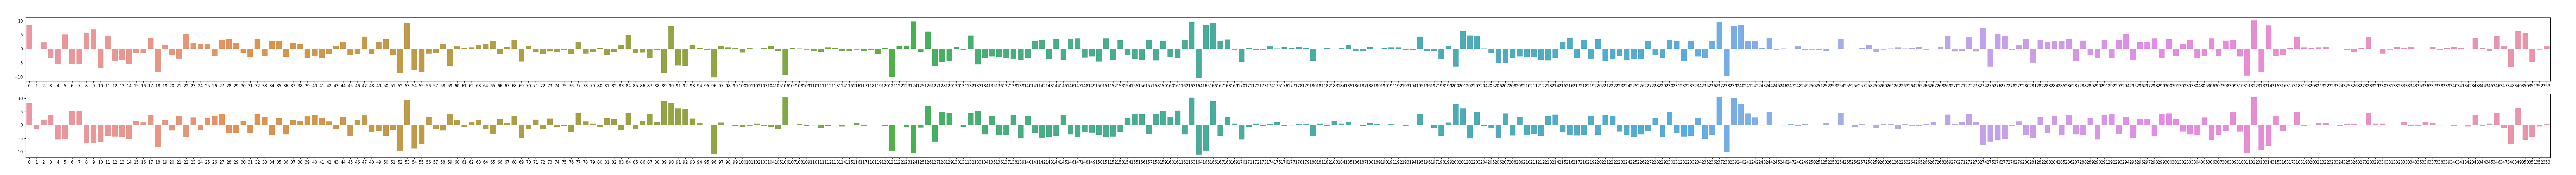

In [475]:
def plotCoef(coef):
    coef = np.sign(coef) * np.log10(abs(coef))
    plt.figure(figsize=(coef.shape[1]/4,6))
    plt.subplot(211); 
    sns.barplot(x=list(range(len(coef[0]))),y=coef[0])
    plt.subplot(212); 
    sns.barplot(x=list(range(len(coef[1]))), y=coef[1])
    plt.subplots_adjust(left=0.01, right=0.99, top=0.9, bottom=0.1)
plotCoef(best['model'].coef_)

Above we have the coeficiants distribution for the latitude and longitude. At the x axis we can notice the feature index in<br>
the dataframe. At the y axis we can see it's weight scaled by log10.<br>
The model tries to distribute the weight to all the features.<br>
But only two are getting most of the attention, 0 and 18, we can see they have around 10^8 value which is a lot higher than all the other values.

The regression models we are going to try are:
* Linear
* Lasso
* Ridge
* ElasticNet
* SGDRegressor

The logic behind choosing all of those is essentially the same - matching continous values to continous target values.<br>
On the linear regression we have already have the results above.<br>
the results were not very promising we have witnessed the model perform slightly worst by 3cm.<br>
Maybe all of these features are confusing our model and it just can't decide which one is more important resulting in worst performance.

On to lasso and ridge. Those models are useful in the same sense that the linear regression one is (and indeed the linear model is a special case of those models).<br>
Both are much like simple least squares linear regression except on the training data ridge/lasso regression is not fitting as well<br> ridge regression has a bias thus the lower performance on training data, but on the overall data ridge can fit much better even with the worst starting point because of possible significant drop in variance.<br>
They differ by the fact that they use a bias to the slope of the relations they find between the regressors and the predict values. The values that give the lowest variance (distance scoring method in this case) are faovred. Those hyperparameters (alpha value and the l1_ratio for elastic net) are optimized by trial-and-error:<br>
<br>
Our input data contains huge amount of features which we just couldn't peak by hand.<br>
Because lasso regression is known as a model that can eliminate useless features it will work best when most of the features in our data are useless.<br>
Ridge regression will work best when most of the features are usefull.
We cannot say for sure which will work better so we will test them both.

In [501]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

a = np.exp(np.arange(1,10,1))
a = a / max(a)
a[:-3]
alpha_settings = np.concatenate([a, np.arange(.1,1,.1), np.arange(1,10,1), np.arange(10,100,5)])
lasso_scores = []
lasso_models = []
ridge_scores = []
ridge_models = []

for alpha in tqdm(alpha_settings):
    score, model = utilize_model(Lasso(alpha=alpha, max_iter=500, normalize=True), no_na_df)
    lasso_scores.append(score)
    lasso_models.append(model)
    score, model = utilize_model(Ridge(alpha=alpha, max_iter=500, normalize=True), no_na_df)
    ridge_scores.append(score)
    ridge_models.append(model)

  0%|          | 0/45 [00:00<?, ?it/s]

The scores obtaind can be plotted to get a sense of the influence of the alpha value on the models performance:

<IPython.core.display.Javascript object>


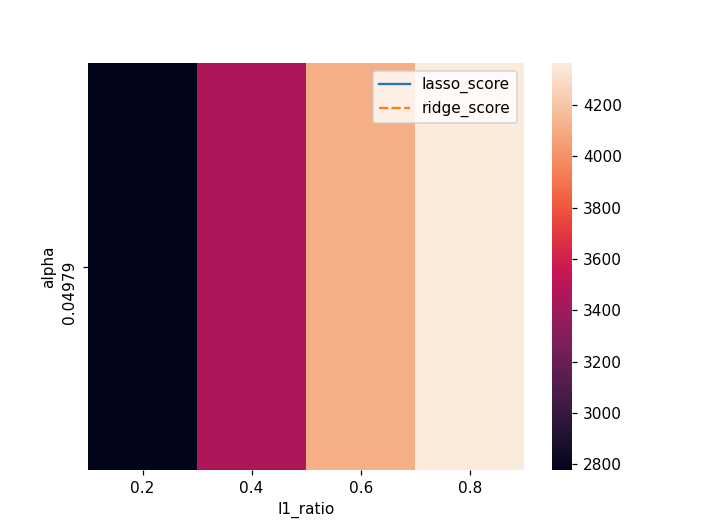

<AxesSubplot:>

In [502]:
plt.figure()
model_alpha_data = pd.DataFrame({'alpha_value': alpha_settings, 'lasso_score': lasso_scores, 'ridge_score': ridge_scores})
sns.lineplot(data=[model_alpha_data['lasso_score'], model_alpha_data['ridge_score']])

terrible results, even worst than regular linear regression.<br>
The closer the alpha to zero the better the results are but that means the model is closer to linear regression

ElasticNet, as a combination of both the previous methods, requires two parameters as hyper parameters.<br>
ElasticNet let's us the privilege to use lots of features without knowing which are usefull,<br>
this fits our assumption that we don't have a clue how many features are usefull.<br>
Another great thing about ElasticNet is that it can deal with situation where there are correlations between the features.<br>
Our data has some extremly correlated features such as `latDeg` and `lngDeg` which directly derived from the other features.<br>
ElasticNet can solve our problem with correlated features.
here we also iterate over a range of values for them:

In [538]:
from sklearn.linear_model import ElasticNet as EN

en_scores = []
for alpha in tqdm([0.0001, 0.001, 0.01, 0.1]):
    for ratio in tqdm(np.arange(.25, 1, .25)):
        score, model = utilize_model(EN(alpha=alpha, tol=1, l1_ratio=ratio, max_iter=50), no_na_df)
        en_scores.append((alpha, ratio, score))

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Here plotting the hyper parameters gives out a heatmap:

<IPython.core.display.Javascript object>


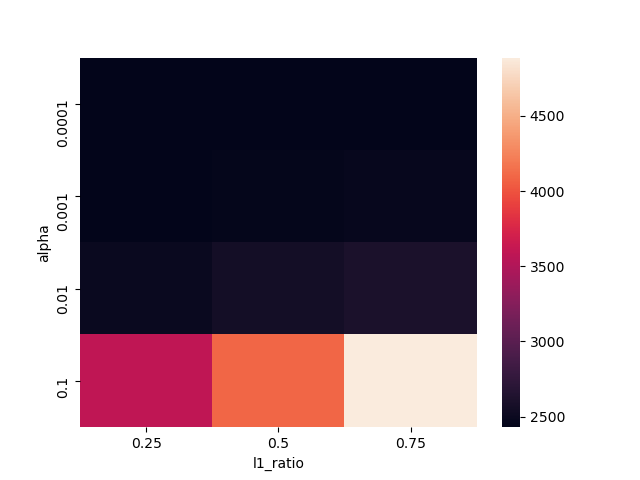

<AxesSubplot:xlabel='l1_ratio', ylabel='alpha'>

In [539]:
en_scores_df = pd.DataFrame(en_scores, columns=['alpha','l1_ratio','score']).round(5)
en_scores_df = en_scores_df.pivot('alpha','l1_ratio','score')
plt.figure()
sns.heatmap(en_scores_df)

Since the results weren't any great niether at Lasso nor Ridge we won't expect anything special from ElasticNet<br>
due to the fact that this model is comprised out of a combination between lasso and ridge.<br>
As we expected the results were no good.

The SGD regressor is a linear model fitted by minimizing a loss using Stochastic Gradient Descent.</br>
the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate).</br>
We're going to use the default loss function: "squared_loss".</br>
Since this model expects a label of a single dimension, we try to predict the lat and long values seperatly:

In [544]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler


Y = no_na_df[predict_columns]
#X = mean_fill_df.drop(predict_columns, axis=1)
X = no_na_df[['latDeg_bsln', 'lngDeg_bsln']]

scaler_x_mm = MinMaxScaler()
scaler_y_mm = MinMaxScaler()
x_normed = scaler_x_mm.fit_transform(X)
y_normed = scaler_y_mm.fit_transform(Y)

x_train, x_test, y_train, y_test = train_test_split(x_normed, y_normed, random_state=0, test_size=0.2)

y_train_lat = y_train[:,0]
y_train_lng = y_train[:,1]

model = SGDRegressor(max_iter=5000, loss="squared_loss")
model.fit(x_train, y_train_lat)
lat_prediction = model.predict(x_test)

model = SGDRegressor(max_iter=5000, loss="squared_loss")
model.fit(x_train, y_train_lng)
lng_prediction = model.predict(x_test)

prediction = np.vstack((lat_prediction, lng_prediction)).T
y_arr = y_test

x_inv = scaler_x.inverse_transform(prediction)
y_inv = scaler_y.inverse_transform(y_arr)

distance_score = haversine_50thP_95thP_mean(x_inv[:,0], x_inv[:,1], y_inv[:,0], y_inv[:,1])
print(f'Prediction accuracy: {distance_score} decimeters.')

Prediction accuracy: 676.3771738030881 decimeters.


Let's go back and address the missing values.</br>
A obviously better approach regarding missing values would be to make up for the loss. One (very) naive method is filling the gaps with 0's:

In [545]:
zero_fill_df = df.fillna(0)
print(f'There are {columns_with_na_count(zero_fill_df)} columns containing at least 1 NaN value!')

There are 0 columns containing at least 1 NaN value!


In [548]:
model = LR(normalize=True)
score, best = utilize_model(model, data=zero_fill_df)
print(f'Prediction accuracy mean is: {score} decimeters using the {type(model).__name__} model')

Prediction accuracy mean is: 6.822412739237268 meters using the LinearRegression model


This was expected though. Filling empty values with 0's doesn't make much sense as the values being filled are physical properties of satelittes, some with relation to the cell phone.<br>
0s for those values can throw the model way off. We can try a different method for filling missing data that makes more sense.<br>
One way to start is to fill empty values by the mean value of their respective columns (over all data, which still is far from ideal):

In [549]:
mean_fill_df = df.fillna(df.mean())

score, best = utilize_model(LR(normalize=True), data=mean_fill_df)

In [551]:
print(f'Prediction accuracy mean is: {score} decimeters using the {type(model).__name__} model trained on mean filled')

Prediction accuracy mean is: 6.842631430751766 meters using the LinearRegression model trained on mean filled


Optimistic as this approach for missing values may be, the prediction is still very far off. <br>
While trying to think of better ways (and implementations) for handeling this problem it occoured to us that using the pivotted data may not be the best idea for regression. <br>
Using the derived data in an unpivotted manner may be useful here. The interesting values will still be those that describe continous, physcial properties of the satellites but the categorial, discrete types (like the pivot axis - satelite ID) will be dropped. <br>
The reasoning for this decision is that it could be helpful to only concentrate on the phycisal values first (like a location of **a** satelite and its distance from a cell phone) rather than trying to address more complex relationships that this type of model might not be able to describe naturally.<br><br>
Simply put - forget about **which** satellite it was, let's try to predict based on **where** it was.<br><br>
We'll start by matching the baseline and derived sets with and the ground set:

In [557]:
sample_key = ['collectionName', 'phoneName', 'millisSinceGpsEpoch']

bsln_grnd = pd.merge(bsln_trn, ground[sample_key + ['latDeg', 'lngDeg']], how='inner', on=sample_key, suffixes=['', '_grnd'])

continous_features = ['correctedPrM', 'xSatPosM', 'ySatPosM', 'zSatPosM', 'xSatVelMps', 'ySatVelMps', 'zSatVelMps', 'satClkBiasM', 'satClkDriftMps']
derived_reg = derived[continous_features + sample_key + ['svid']]

# group derived by spesific satellite sample
drvd_reg_grp = derived_reg.groupby(sample_key + ['svid']).agg('first')  
# match with the baselinet and ground sets
drvd_bsln_grnd = pd.merge_asof(drvd_reg_grp.sort_values('millisSinceGpsEpoch'), bsln_grnd.sort_values('millisSinceGpsEpoch'), on=['millisSinceGpsEpoch'], tolerance=2)

Then again, we're cleaning it from null values and non numbers - dropping for now:

In [558]:
drvd_bsln_grnd_clean = drvd_bsln_grnd.dropna()
unpivot_data = drvd_bsln_grnd_clean.select_dtypes(include=['int64', 'float64'])

Trying to apply the linear regression model on the new data set gives:

In [ ]:
score, best = utilize_model(LR(normalize=True), data=unpivot_data, baseline_columns=['latDeg', 'lngDeg'], \
                           filter_columns=['latDeg_bsln_k', 'lngDeg_bsln_k','latDeg_prv', 'lngDeg_prv'])
print(f'Prediction accuracy mean is: {score} decimeters using the {type(model).__name__} model trained on mean filled')

Finally lets try polynomial regression. We will generate our polynomial features using sklearn `PolynomialFeatures` <br>
and then we will pass them onto learn on linear regression model.
Unfortunatly we couldn't use features from derived because each feature appears around 40 times and polynomial feature generation we make our feature space huge resulting in enormous dataset.<br>
Our simple computer just couldn't operate on 1.3GB dataframe therefore we used only features from baseline

In [758]:
pol =PolynomialFeatures()
features = ['latDeg_bsln','lngDeg_bsln','heightAboveWgs84EllipsoidM','UncalAccelXMps2','UncalAccelYMps2','UncalAccelZMps2','UncalGyroXRadPerSec','UncalGyroYRadPerSec','UncalGyroZRadPerSec','UncalMagXMicroT','UncalMagYMicroT','UncalMagZMicroT','latDeg_prv','lngDeg_prv']
#for col in set(no_na_df.columns) - set(features):
#    if(col[0] == 'correctedPrM'):
#        features.append(col)

df = pol.fit_transform(no_na_df[features])
df = pd.DataFrame(df, index=no_na_df.index)
df['latDeg_grnd'] = no_na_df['latDeg_grnd']
df['lngDeg_grnd'] = no_na_df['lngDeg_grnd']

model = LR(normalize=True)
score, best = utilize_model(model, data=df.dropna(), baseline_columns=[1,2], scaler_x=MinMaxScaler(), scaler_y=MinMaxScaler())
print(f'KFold overall loss is:{score} decimeters.')
print('Baseline validation loss is: {:.2f} decimeters, train loss is {:.2f} decimeters\n using the {} model'\
      .format(best['bsln_val_score'], best['bsln_trn_score'],type(best['model']).__name__))
print('Best prediction validation loss is: {:.2f} decimeters, train loss is: {:.2f} decimeters'\
     .format(best['score_val'], best['score_train']))

KFold overall loss is:6.3398998766895085 decimeters.
Baseline validation loss is: 5.12 decimeters, train loss is 5.17 decimeters
 using the LinearRegression model
Best prediction validation loss is: 5.91 decimeters, train loss is: 5.82 decimeters


Still worse than the baseline only features.<br>
To conclude after going through several regression models we conclude that the best model is the simple linear regression model. but not by far, only a difference around a 0.5 cm differ which is quite small.
A better way to predict the locations must be found, because the current approach still require perhaps better feature<br>
engineering to correctly train the models

## Neural Network

The use of neural network seems natural to the task due to the fact that we have multiple datapoints<br>
and no specific idea regarding which are the important features.<br>
feature engineering is exhasting task so we will let the neural network do it for us<br>
But firstly we will setup our data for these NN models which are somewhat different from the simple regression models.

## Split for train/test the data & normilize

In order for the model to perform better on the data we will normalize our data before feeding it to the model.<br>
We chose RobustScaler because it is robust to outliers. our data contains many outliers therfore it is worth<br>
using this type of scaler. This Scaler removes the median and scales the data according to the quantile range

Then we split the normalized dataset to train and validation sets by 80%/20%.<br>
the split would be preformed as such that whole collections won't be seperated because of the sequence nature of our data.<br>
roughly 80% of the collections will be assigned for training while 20% would be assigned for validation.

### Randomized  train/test split
The most basic and comprehensible method. we will use the built-in sklearn procedure to split our data to<br>
train and test sections for. we will ignore the collection and phone type because these should not be features.

In [104]:
x_train, x_val, y_train, y_val = train_test_split(train.drop(['collectionName', 'phoneName'],axis=1), labels.drop(['collectionName', 'phoneName'],axis=1), random_state=0, test_size=0.2)
scaler_x_trn = RobustScaler()
scaler_y_trn = RobustScaler()
scaler_x_val = RobustScaler()
scaler_y_val = RobustScaler()

x_train_norm = scaler_x_trn.fit_transform(x_train)
y_train_norm = scaler_y_trn.fit_transform(y_train)
x_val_norm = scaler_x_val.fit_transform(x_val)
y_val_norm = scaler_y_val.fit_transform(y_val)

print("Baseline train loss is currently stands at:{}m".format(evaluate(y_train, x_train)))
print("\nBaseline validation loss is currently stands at:{}m".format(evaluate(y_val, x_val)))

Baseline train loss is currently stands at:5.241811779040381m

Baseline validation loss is currently stands at:5.1074499874799475m


### train/test split by collections and without randomizing the data (will be used later for sequence models)
In this method we want to create sequences that can be fed into a model that handles sequences well like RNN or LSTM.

firstly we will generate a scaler and fit it on all of the data.

In [105]:
scaler_x = RobustScaler()
scaler_y = RobustScaler()
scaler_x.fit(train.drop(['collectionName', 'phoneName'], axis=1))
scaler_y.fit(labels.drop(['collectionName', 'phoneName'], axis=1))

RobustScaler()

Then we will split our data to train and validation based on the collections<br>
we will choose randomly roughly 80% of the collections to the train data and the rest to the validation

In [114]:
n_features = train.shape[1]

train.set_index('collectionName', inplace=True)
labels.set_index('collectionName', inplace=True)
# Split to train and validation
collections = shuffle(train.index.unique())
n_collections =len(collections)
n_train_collections = math.ceil(0.8*n_collections)
train_collections = collections[:n_train_collections]
validation_collections = collections[n_train_collections:]
x_train_clc = train.loc[train_collections]
y_train_clc = labels.loc[train_collections]
x_val_clc   = train.loc[validation_collections]
y_val_clc   = labels.loc[validation_collections]

We need to select windows size and the predicted window range.
We will choose a the window to be made of a phone last 30 epochs in a collections, which means,
a look of 30 seconds into the past to predict the present.
To create the windows we will use built in keras preprocessing object TimeseriesGenerator which generates a data generator
instance. the data generator generates batches of sequences of 30 epochs that each are going through the network at it's
own turn.<br>
<br>
The following code will extract all the training collection-phone pairs as well as for validation, <br>
will create a timeseries generator for each pair using the normalized data and eventually stack all the train sequences together and all the validation sequences together 

In [122]:
#Empty lists to be populated using formatted training data
train_seq = []
val_seq = []

n_future = 1   # Number of epochs we want to look into the future based on the past epochs.
n_past = 30  # Number of past epochs we want to use to predict the future.

# Select all possible collection-phone pairs
collections_pairs = shuffle(train.reset_index()[['collectionName', 'phoneName']].drop_duplicates())
# Select the training collection-phone pairs
train_path = shuffle(collections_pairs.set_index('collectionName').loc[train_collections].reset_index())
# Select the validation collection-phone pairs
valid_path = shuffle(collections_pairs.set_index('collectionName').loc[validation_collections].reset_index())

# For each training collection-phone pair we will generate sequence windows using the keras timeseries generator
for pair in np.array(train_path):
    x = x_train_clc.loc[pair[0]][x_train_clc.loc[pair[0]]['phoneName']==pair[1]].drop(['phoneName'], axis=1)
    y = y_train_clc.loc[pair[0]][y_train_clc.loc[pair[0]]['phoneName']==pair[1]].drop(['phoneName'], axis=1)
    x = scaler_x.transform(x)
    y = scaler_y.transform(y)
    train_seq.append(tf.keras.preprocessing.sequence.TimeseriesGenerator(x,y,30, batch_size=y.shape[0]))

# For each validation collection-phone pair we will generate sequence windows using the keras timeseries generator
for pair in np.array(valid_path):
    x = x_val_clc.loc[pair[0]][x_val_clc.loc[pair[0]]['phoneName']==pair[1]].drop(['phoneName'], axis=1)
    y = y_val_clc.loc[pair[0]][y_val_clc.loc[pair[0]]['phoneName']==pair[1]].drop(['phoneName'], axis=1)
    x = scaler_x.transform(x)
    y = scaler_y.transform(y)
    val_seq.append(tf.keras.preprocessing.sequence.TimeseriesGenerator(x,y,30, batch_size=y.shape[0]))
    
trainX = train_seq[0][0][0]
trainY = train_seq[0][0][1]

for i in range(1, len(train_seq)):
    trainX = np.vstack((trainX, train_seq[i][0][0]))
    trainY = np.vstack((trainY, train_seq[i][0][1]))
    
valX = val_seq[0][0][0]
valY = val_seq[0][0][1]

for i in range(1, len(val_seq)):
    valX = np.vstack((valX, val_seq[i][0][0]))
    valY = np.vstack((valY, val_seq[i][0][1]))

Let's evaluate the performance for validation and train.

In [123]:
print("Baseline train loss is currently stands at:{}dm using the following collections: {}"\
      .format(evaluate(y_train_clc, x_train_clc), list(train_collections)))
print("\nBaseline validation loss is currently stands at:{}dm using the following collections: {}"\
      .format(evaluate(y_val_clc, x_val_clc), list(validation_collections)))

Baseline train loss is currently stands at:4.6871972434821805dm using the following collections: ['2020-06-11-US-MTV-1', '2020-05-14-US-MTV-1', '2021-04-29-US-MTV-1', '2020-07-17-US-MTV-1', '2021-04-28-US-SJC-1', '2020-08-03-US-MTV-1', '2020-07-17-US-MTV-2', '2021-01-05-US-SVL-1', '2021-01-04-US-RWC-1', '2021-01-04-US-RWC-2', '2020-05-14-US-MTV-2', '2020-06-05-US-MTV-1', '2020-09-04-US-SF-2', '2021-01-05-US-SVL-2', '2020-06-05-US-MTV-2', '2020-06-04-US-MTV-1', '2020-05-29-US-MTV-1', '2021-03-10-US-SVL-1', '2021-04-28-US-MTV-1', '2020-09-04-US-SF-1', '2021-04-29-US-SJC-2', '2020-05-21-US-MTV-1', '2020-05-29-US-MTV-2', '2021-04-26-US-SVL-1']

Baseline validation loss is currently stands at:7.6385106201722905dm using the following collections: ['2020-08-06-US-MTV-2', '2021-04-15-US-MTV-1', '2020-07-08-US-MTV-1', '2020-05-21-US-MTV-2', '2021-04-22-US-SJC-1']


The following architecture will be a vanilla Neural Network.
The model consists of 1 input layer with 22 inputs (number of features)<br>
We will use `keras-tuner` to find the correct hyperparameters for the model.<br>
The following will be determined by `keras-tuner`:
- The number of hidden layers ( can be between 2 to 20 )
- The activation function of each layer ( A selection between ReLU and LeakyReLU is made ) 
- The number of nodes of each layer ( possible values from `n_features//3` to `n_features*2`)
output layer consists of 2 output neurons each represent the latitude and longitude of the location of the vehicle.<br>
The model will use ADAM optimizer with decaying learning rate function starting with 0.0001.<br>
The loss function we will use in this architecture would be the evaluation metric that had accompanied us during the whole project,<br>
the mean between the 95th precentile and the median of the haversine distances between the ground truth and the predicted values.<br>
the following illustrates the architecture using random weight initialization.<br>
the edges opacity is propotional to the edges weights.<br>


![alt text](nn.svg "neural network archetecture")

##### Loss function
Our NN model would be implemented using `tensorflow` library.<br>
Because the evaluation metric of the competition is the haversine distance loss, <br>
A good NN implementation would reduce this following metric.<br>
Therefore we will build a loss function exactly for that.<br>
`Keras` library make sure to take into account the gradients calculations using the given loss function

In [760]:
def haversine_loss(y_true, y_pred):
    PI_ON_180 = tf.constant(np.pi / 180, dtype=tf.float32)
    RADIUS_M = tf.constant(6_377_000, dtype = tf.float32)
    tf.dtypes.cast(y_true, tf.float32)
    tf.dtypes.cast(y_pred, tf.float32)

    yt_rad = y_true * PI_ON_180
    yp_rad = y_pred * PI_ON_180

    delta = yt_rad - yp_rad
    v = delta / 2
    v = tf.sin(v)
    v = v**2

    a = v[:,1] + tf.cos(yt_rad[:,1]) * tf.cos(yp_rad[:,1]) * v[:,0] 
    c = tf.sqrt(a)
    c = 2* tf.math.asin(c)
    c = c*RADIUS_M
    
    p50 = tfp.stats.percentile(c, 50)
    p95 = tfp.stats.percentile(c, 95)
    
    final = tf.reduce_mean(tf.convert_to_tensor([p50, p95]))
    return final

#### Simple Neural Network
The following network is implementation of the architecture mentioned above

In [771]:
def buildSimpleNN(hp):
    in_nodes = x_train_norm.shape[1]
    inputLayer = Input(in_nodes)
    
    layer = tf.keras.layers.Dense(hp.Int("lat_layer_1", in_nodes//3, in_nodes*2, in_nodes//3), name="lat_layer_1")(inputLayer)
    if hp.Boolean("leaky_layer_1"):
        activation = LeakyReLU()
    else:
        activation = ReLU()
    layer = activation(layer)
    for i in range(hp.Int("n_layers", 2, 20)):
        layer = tf.keras.layers.Dense(hp.Int(f"layer_{i}", in_nodes//3, in_nodes*2, in_nodes//6), name=f"layer_{i}")(layer)
        if hp.Boolean(f"leaky_layer_{i}"):
            activation = LeakyReLU(name=f"leaky_layer_{i}")
        else:
            activation = ReLU()
        layer = activation(layer)
    outputs = Dense(2)(layer)
    model = tf.keras.Model(inputLayer, outputs)
    optimizer = keras.optimizers.Adam(learning_rate=hp.Float('learning rate', 0.0000001, 0.001))
    model.compile(loss=haversine_loss,
                optimizer=optimizer)
    return model

In [772]:
TUNER_DIR = 'simple_nn'
tuner = kt.RandomSearch(buildSimpleNN, objective='val_loss', max_trials=150, directory=TUNER_DIR)
tuner.search(x=x_train_norm, y=y_train_norm, epochs=20, validation_data=(x_val_norm, y_val_norm), verbose=3)

Trial 150 Complete [00h 01m 43s]
val_loss: 151577.65625

Best val_loss So Far: 1137.8052978515625
Total elapsed time: 03h 44m 37s
INFO:tensorflow:Oracle triggered exit


In total it took 3.45 hrs to train our model.<br>
The best score archived after 20 epochs is 113m which is quite off.<br>
Let's try continue and train our model for more 500 epochs.<br>

In [ ]:
best_model = tuner.get_best_models()[0]
best_model.save('best_params_simple_nn.hdf5')

model learning rate is: 0.0006576068699359894


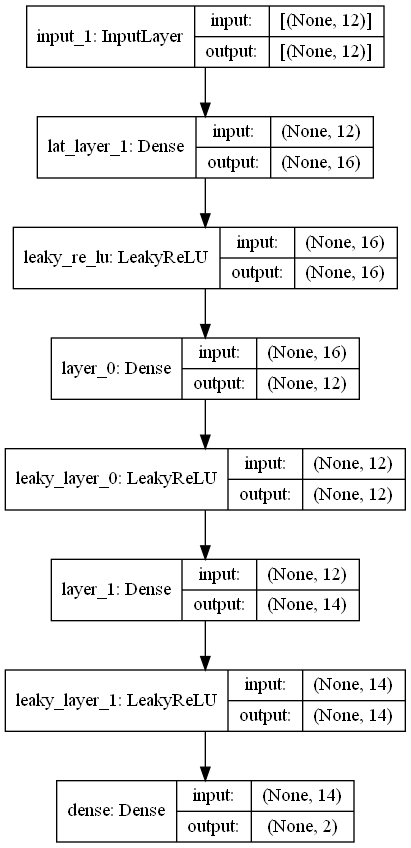

In [822]:
model = tf.keras.models.load_model('best_params_simple_nn.hdf5', custom_objects={'haversine_loss': haversine_loss})
print(f"model learning rate is: {tf.keras.backend.eval(model.optimizer.lr)}")
plot_model(model, to_file='best_model_nn.png', show_shapes=True)

In [823]:
def lossTrainValAll(train, labels, model):
    x = scaler_x_trn.transform(train)
    y = scaler_y_trn.transform(labels)
    pred = model.predict(x)
    pred_i = scaler_y_trn.inverse_transform(pred)
    return haversine_50thP_95thP_mean(np.array(labels)[:,0], np.array(labels)[:,1], pred_i[:,0],  pred_i[:,1])

print(f"train loss: {lossTrainValAll(x_train, y_train)} | validation loss: {lossTrainValAll(x_val, y_val)} | Overall loss: {lossTrainValAll(train.drop('phoneName',axis=1), labels.drop('phoneName',axis=1))}")
print(f"Baseline loss: {evaluate(train, labels)}")

train loss: 162.241764474946 | validation loss: 161.95569163669865 | Overall loss: 162.179202975775
Baseline loss: 5.214282246567359


### Learning process
We will continue to train the best model from the keras tuner to get to our desired results.<br>
The following helper function will help us train our keras models<br>
It recieves all the parameters required for the training process, print the learning curve of loss/validation loss and return the<br>
resulted model.

Firstly it is important to time the learning process in order to know the performance of our model.<br>
`stop_early` - we will configure callback functions to stop early the learning procedure if for 50 epochs we hadn't improved<br>
our model according to the loss function for shorter training process.<br>
`mcp_save` - a callback function that will save the best performing model.<br>
each epoch it would evaluate the model and if it's better the previous ones it would save it instead
We had set to train our model using 10000 epochs.<br>
<br>
`learningRateDecayCallback` - a callback class which controls the learning rate parameter of the model<br>
after each epoch end the function is called, the function will decay the learning rate using the following formula:<br>
`learning_rate_next = learning_rate_current * 1 / ( 1 + decay*epoch_number )` whereas `decay` is the decaying rate.<br>
we had set the `decay` factor to `1/(number_of_epochs*100)` (times 100 for less drastical decrease in the learning rate)<br>

Reload the best performing epoch model

Plot the learning curve.<br>
in the horizontal axis the epoch number and in the vertical axis the loss metric.<br>
we will use log scale in this learning curve because everything simply will be dwarfed compared to the first epochs<br>
even though the loss continue to decrease. <br>
We want to see a negative decline on the curve and finally alignment along the horizontal axis.

In [959]:
class learningRateDecayCallback(tf.keras.callbacks.Callback):
    def __init__(self, decay):
        self.decay = decay
    def on_epoch_end(self, epoch, logs=None):
        self.model.optimizer.lr =  tf.keras.backend.eval(self.model.optimizer.lr) * (1/(1+self.decay*epoch))
        print("learning rate: {}".format(tf.keras.backend.eval(self.model.optimizer.lr)))
        
        
def trainModel(model, x_t, y_t, x_v, y_v, epochs=1000, early=None, saveBest=None, decay=None, verbose=1, extra_callbacks=[]):
    """
    Trains the model on given parameters.
    
    Parameters
    ==========
    x_t - Train input dataset 
    y_t - Train output
    x_v - Validation input dataset 
    y_v - Validation output
    epochs - no. of training epochs
    early - a tuple that states whether to use early stoping, what is the monitored metric and what is our patience
    saveBest - a tuple that states whether to save our best model to disk, and what is our matrix of choosing.
    decay - The rate at which the learning rate decreases over time.
    verbose: fitting function logs verbosity argument
    
    Returns
    =======
    model - returns the trained model
    fig - returns the learning curve figure
    """
    callbacks = []
    if early is not None:
        callbacks.append(tf.keras.callbacks.EarlyStopping(monitor=early[0], patience=early[1], restore_best_weights=True))
    if saveBest is not None:
        callbacks.append(tf.keras.callbacks.ModelCheckpoint(f'{saveBest[1]}.hdf5', save_best_only=True, monitor=saveBest[0], mode='max'))
    if decay is not None:
        callbacks.append(learningRateDecayCallback(decay))
    history = model.fit(x_t, y_t, epochs=epochs, validation_data=(x_v, y_v), callbacks=callbacks, verbose=verbose)
    reconstructed_model = tf.keras.models.load_model(f'{saveBest[1]}.hdf5', compile=False)
    reconstructed_model.compile(loss=haversine_loss,
                    optimizer=tf.keras.optimizers.Adam(learning_rate=best_model.optimizer.lr))
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca()
    plt.plot(list(range(len(history.history['loss']))), history.history['loss'], label='train_loss', c='r')
    plt.plot(list(range(len(history.history['loss']))), history.history['val_loss'], alpha=0.5, label='val_loss', c='b', ls='--')
    plt.ylabel('haversine loss')
    plt.xlabel('ephoch')
    plt.title('Learning curve')
    plt.legend()
    ax.set_yscale('log')
    return (reconstructed_model, fig)

def evaluate_model(model, x_t, y_t, x_v, y_v, X=None, Y=None, metrics=['haversine', mean_squared_error, r2_score, mean_absolute_error]):
    df = pd.DataFrame(columns=['train', 'validation', 'overall'])
    if 'phoneName' in X.columns:
        X = X.drop(['phoneName'], axis=1)
        Y = Y.drop(['phoneName'], axis=1)
    pred_t = model.predict(scaler_x_trn.transform(x_t))
    pred_i_t = scaler_y_trn.inverse_transform(pred_t)
    pred_v = model.predict(scaler_x_val.transform(x_v))
    pred_i_v = scaler_y_val.inverse_transform(pred_v)
    pred = model.predict(scaler_x_trn.transform(X))
    pred_i = scaler_y_trn.inverse_transform(pred)
    
    if 'haversine' in metrics:
        df = df.append(pd.DataFrame({'train':lossTrainValAll(x_t, y_t, model), 'validation':lossTrainValAll(x_v, y_v, model), 'overall':lossTrainValAll(X, Y, model)}, index=['mean_95th_mid_haversine']))
        diff = calc_haversine(np.array(y_v)[:,0], np.array(y_v)[:,1], pred_i_v[:,0],  pred_i_v[:,1])
        print("The haversine distance difference between predicted and true:")
        print("=============================================================")
        print(f"Mean = {np.mean(diff):.2f}dm | Median = {np.median(diff):.2f}dm | STD = {np.std(diff):.2f}dm | Max = {np.max(diff):.2f}dm | Min = {np.min(diff):.2f}dm")
        fig = plt.figure()
        plt.plot(diff)
        plt.title('Validation haversine difference')
        plt.xlabel('sample')
        plt.ylabel('haversine distance in decimeters')
        metrics.remove('haversine')
        
    for metric in metrics:
        score_val = metric(pred_i_v, np.array(y_v))
        score_trn = metric(pred_i_t, np.array(y_t))
        score_overall = metric(pred_i, np.array(Y))
        df = df.append(pd.DataFrame({'train':score_val, 'validation':score_trn, 'overall':score_overall}, index=[metric.__name__]))
    
    if 'haversine' in metrics:
        fig.show()
    return df
    

<IPython.core.display.Javascript object>


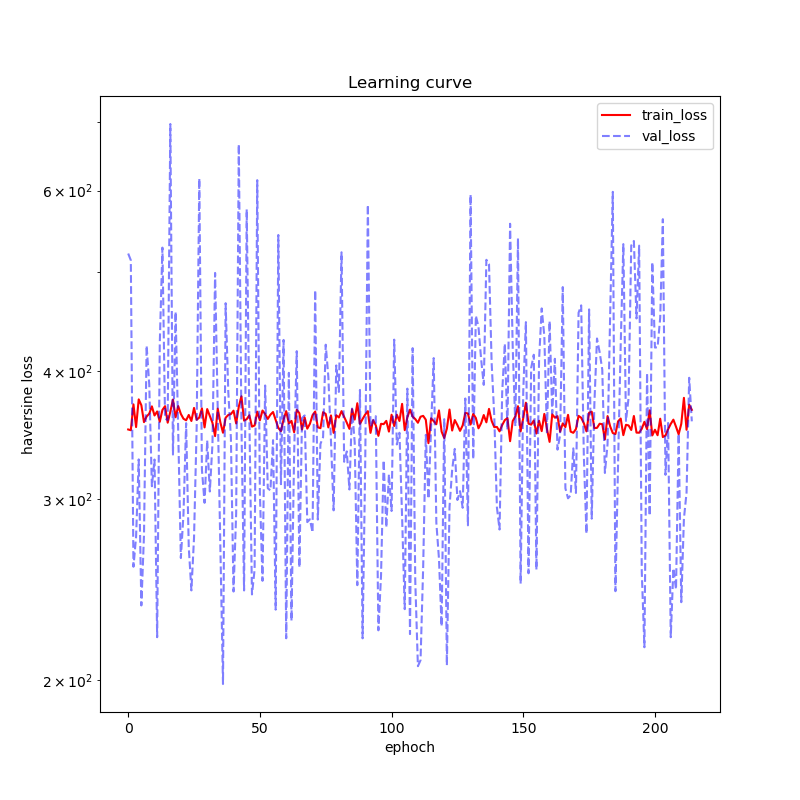

In [826]:
model, fig = trainModel(model, x_train_norm, y_train_norm, x_val_norm, y_val_norm, epochs=10000, early=('loss', 100), saveBest=('loss', 'simple_nn_model'), verbose=0)

After reasonable amount of epochs the learning curve flattened and we can see that the model simply stopped learning.<br>
Maybe huge amount of training epochs could move the niddle to our best but this performance is simply.<br>
Let's evaluate our model performance

The haversine distance difference between predicted and true:
Mean = 29.57dm | Median = 23.31dm | STD = 23.71dm | Max = 732.30dm | Min = 0.35dm


<IPython.core.display.Javascript object>


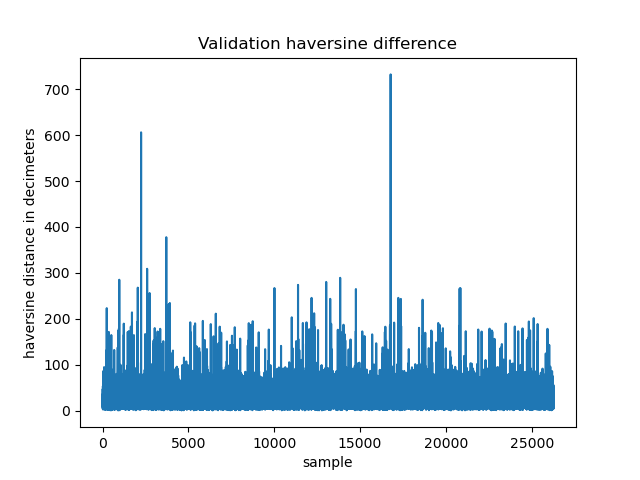

In [883]:
model = tf.keras.models.load_model('simple_nn_model.hdf5', custom_objects={'haversine_loss': haversine_loss})
results = evaluate_model(model, x_train, y_train, x_val, y_val, train, labels)

In [889]:
results

train    validation       overall
mean_95th_mid_haversine  4.783982e+01  4.761950e+01  4.780884e+01
mean_squared_error       8.146892e-08  9.275476e-08  9.120240e-08
r2_score                 9.999943e-01  9.999939e-01  9.999940e-01
mean_absolute_error      1.908190e-04  1.985887e-04  1.982260e-04

As we can see from the results most of the samples are off by 10m.<br>
The haversine loss function resulted with an error around 4.7m<br>
From the r2 it is obvious that there is a great correlation between the prediction and true values.<br>
From the mean squered error it is not very intuitive way to evaluate the performance but the mean absolute error can<br>
give us a general idea regarding the difference between the lat/lng values as is.

#### Latitude / Langitude correction NN
The following model would still be a vanilla neural network but some of the connections are custom made.<br>
We created a network that will stand along our intution regarding how we think the model should operate.<br>
Our main idea behind this network is to create an error correction model,<br>
We already have rough results and all we need to do is refine them.<br>
Therefore it seems logical to start with model that for each latitude and langitude parameters predicts it's<br>
baseline prediction and add for each of them an error correction factor that is generated via a neural network we will call<br>
lat/lng addative unit. finally we will calculate the loss function using the haversine_loss function and use Adam as optimizer.<br>
In order to predict the baseline predictions and diviate from them we will initialize all the weights to 0 and then only for the pass through units<br>
add a 1 weight for latitude and langitude.

In [890]:
def buildModel(hp):
    # Get the number of features
    in_nodes = x_train_norm.shape[1]
    inputLayer = Input(in_nodes)
    # Set seperate the latitude feature and langitude feature to two different layers that will be passed directly
    # to the output after correction given from the mid NN
    latIn = Lambda(lambda x: x[:, 0:1], output_shape=((1,)))(inputLayer)
    lngIn = Lambda(lambda x: x[:, 1:2], output_shape=((1,)))(inputLayer)
    
    # Latitude addative (correction) unit
    # We will choose around 1 third to 2 times the number of features due to simple rule of thumb
    lat_layer = Dense(name="lat_layer_1" ,units=hp.Int("lat_layer_1", in_nodes//3, in_nodes*2, in_nodes//3), kernel_initializer='zeros', bias_initializer='zeros')(inputLayer)
    if hp.Boolean("leaky_layer_1_lat"):
        activation = LeakyReLU(name="leaky_layer_1_lat")
    else:
        activation = ReLU(name="relu_layer_1_lat")
    lat_layer = activation(lat_layer)
    for i in range(2, hp.Int("n_layers_lat", 2, 10)):
        lat_layer = tf.keras.layers.Dense(name=f"lat_layer_{i}", units=hp.Int(f"lat_layer_{i}", in_nodes//3, in_nodes*2, in_nodes//3), kernel_initializer='zeros', bias_initializer='zeros')(lat_layer)
        if hp.Boolean(f"leaky_layer_{i}_lat"):
            activation = LeakyReLU(name=f"leaky_layer_{i}_lat")
        else:
            activation = ReLU(name=f"relu_layer_{i}_lat")
        lat_layer = activation(lat_layer)
        
    # Langitude addative (correction) unit
    # the same as in the latitude unit logic
    lng_layer = tf.keras.layers.Dense(name="lng_layer_1", units=hp.Int("lng_layer_1", in_nodes//3, in_nodes*2, in_nodes//3), kernel_initializer='zeros', bias_initializer='zeros')(inputLayer)
    if hp.Boolean("leaky_layer_1_lng"):
        activation = LeakyReLU(name="leaky_layer_1_lng")
    else:
        activation = ReLU(name="relu_layer_1_lng")
    lng_layer = activation(lng_layer)
    for i in range(2, hp.Int("n_layers_lng", 2, 10)):
        lng_layer = tf.keras.layers.Dense(name=f"lng_layer_{i}", units=hp.Int(f"lng_layer_{i}", in_nodes//3, in_nodes*2, in_nodes//3), kernel_initializer='zeros', bias_initializer='zeros')(lng_layer)
        if hp.Boolean(f"leaky_layer_{i}_lng"):
            activation = LeakyReLU(name=f"leaky_layer_{i}_lng")
        else:
            activation = ReLU(name=f"relu_layer_{i}_lng")
        lng_layer = activation(lng_layer)
    
    lat_add_unit = Dense(name="lat_addative_nn_out", units=1, kernel_initializer='zeros', bias_initializer='zeros')(lat_layer)
    lng_add_unit = Dense(name="lng_addative_nn_out", units=1, kernel_initializer='zeros', bias_initializer='zeros')(lng_layer)
    
    # Correct the latitude value by the value outputed from the middle neural network
    latIn_plus_add = Concatenate(name="concate_lat_and_add")([latIn, lat_add_unit])
    output_lat = Dense(name="lat_plus_correction", units=1, kernel_initializer='zeros', bias_initializer='zeros')(latIn_plus_add)
    
    # Correct the langitude value by the value outputed from the middle neural network
    lngIn_plus_add = Concatenate(name="concate_lng_and_add")([lngIn, lng_add_unit])
    output_lng = Dense(name="lng_plus_correction", units=1, kernel_initializer='zeros', bias_initializer='zeros')(lngIn_plus_add)
    
    # Concat the lat and lng together and output them as a pair
    outputs = Concatenate(name="output")([output_lat, output_lng])
    
    model = tf.keras.Model(inputLayer, outputs)
    
    # Set the weights that the initial prediction will simply predict the given lat/lng from baseline
    weights = model.get_weights()
    weights[-2] = np.array([[1],[0]])
    weights[-4] = np.array([[1],[0]])
    model.set_weights(weights)
    
    optimizer = keras.optimizers.Adam(learning_rate=hp.Float('learning rate', 0.0000001, 0.001))
    model.compile(loss=haversine_loss,
                optimizer=optimizer)
    return model
#tf.keras.utils.vis_utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

##### Test Static model with no hyperparameters
The following is the same NN architecture as before but with static hyperparameters<br>
We use it only to validate that our bypassing connections for lat/lng are working well even before<br>
the learning proccess

In [891]:
def buildModelStatic():
    in_nodes = x_train_norm.shape[1]
    inputLayer = Input(in_nodes)
    latIn = Lambda(lambda x: x[:, 0:1], output_shape=((1,)))(inputLayer)
    lngIn = Lambda(lambda x: x[:, 1:2], output_shape=((1,)))(inputLayer)
    
    # Latitude addative unit
    lat_layer = Dense(name="lat_layer_1" ,units=1, kernel_initializer='zeros', bias_initializer='zeros')(inputLayer)
    if False:
        activation = LeakyReLU(name="leaky_layer_1_lat")
    else:
        activation = ReLU(name="relu_layer_1_lat")
    lat_layer = activation(lat_layer)
    for i in range(2, 2):
        lat_layer = tf.keras.layers.Dense(name=f"lat_layer_{i}", units=1, kernel_initializer='zeros', bias_initializer='zeros')(lat_layer)
        if False:
            activation = LeakyReLU(name=f"leaky_layer_{i}_lat")
        else:
            activation = ReLU(name=f"relu_layer_{i}_lat")
        lat_layer = activation(lat_layer)
        
    # Langitude addative unit
    lng_layer = tf.keras.layers.Dense(name="lng_layer_1", units=1, kernel_initializer='zeros', bias_initializer='zeros')(inputLayer)
    if False:
        activation = LeakyReLU(name="leaky_layer_1_lng")
    else:
        activation = ReLU(name="relu_layer_1_lng")
    lng_layer = activation(lng_layer)
    for i in range(2, 2):
        lng_layer = tf.keras.layers.Dense(name=f"lng_layer_{i}", units=1, kernel_initializer='zeros', bias_initializer='zeros')(lng_layer)
        if False:
            activation = LeakyReLU(name=f"leaky_layer_{i}_lng")
        else:
            activation = ReLU(name=f"relu_layer_{i}_lng")
        lng_layer = activation(lng_layer)
    
    lat_add_unit = Dense(name="lat_addative_nn_out", units=1, kernel_initializer='zeros', bias_initializer='zeros')(lat_layer)
    lng_add_unit = Dense(name="lng_addative_nn_out", units=1, kernel_initializer='zeros', bias_initializer='zeros')(lng_layer)
    
    latIn_plus_add = Concatenate(name="concate_lat_and_add")([latIn, lat_add_unit])
    output_lat = Dense(name="lat_plus_correction", units=1, kernel_initializer='zeros', bias_initializer='zeros')(latIn_plus_add)
    
    lngIn_plus_add = Concatenate(name="concate_lng_and_add")([lngIn, lng_add_unit])
    output_lng = Dense(name="lng_plus_correction", units=1, kernel_initializer='zeros', bias_initializer='zeros')(lngIn_plus_add)
    
    outputs = Concatenate(name="output")([output_lat, output_lng])
    
    model = tf.keras.Model(inputLayer, outputs)
    
    weights = model.get_weights()
    weights[-2] = np.array([[1],[0]])
    weights[-4] = np.array([[1],[0]])
    model.set_weights(weights)
    
    optimizer = keras.optimizers.Adam(learning_rate=0.00097200077)
    model.compile(loss=haversine_loss,
                optimizer=optimizer)
    return model
#tf.keras.utils.vis_utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

We are going to make a single feedthrough our NN.<br>
As excpected due to the network architecture when initialized, it should predict exactly the latitude and langitude of the input data.<br>
Because we havn't yet trained the model the weights are as initialized which means that all is 0 except the ones "passing" the lat/lng.

In [ ]:
model = buildModelStatic()
loss_train = tf.keras.backend.eval(haversine_loss(np.array(y_train), model.predict(np.array(x_train))))
loss_val = tf.keras.backend.eval(haversine_loss(np.array(y_val), model.predict(np.array(x_val))))
loss_train_norm = tf.keras.backend.eval(haversine_loss(y_train_norm, model.predict(x_train_norm)))
loss_val_norm = tf.keras.backend.eval(haversine_loss(y_val_norm, model.predict(x_val_norm)))
print(f"loss_train: {loss_train} | loss_val: {loss_val} | loss_train_norm: {loss_train_norm} | loss_val_norm: {loss_val_norm}")

The vizualization above is an illustration of the neural network desribed above

Now that we have general idea for a model how do we know how many layers in each "lat/lon unit" to use?<br>
How many nodes at each one of these layers? Which activation function to use? What is the best learning rate?<br>
Most of the data scientists tell you a rule of thumb and mostly trial and error.<br>
there is no simple equation for setting these parameters.<br>
We can automate the process of hyperparameter tuning using very useful package called keras-tuner.<br>
using keras tuner we sample random parameters for our model at predefined places, the tuner will automate this procedure<br>
by a set of randomized tests on several sampled models. Finally it will return us a model containing the best models sampled.<br><br>
We chose to let the tuner choose the following parameters in our model:<br>
* no. of layers in the NN that output a factor in which to add/subtract to the latitude max 8 layers
* no. of layers in the NN that output a factor in which to add/subtract to the langitude max 8 layers
* no. of nodes at each hidden layer
* Adam learning rate, ranges between 0.0000001 - 0.001.

In [ ]:
TUNER_DIR = 'tuner_logs_complex_nn_7'
tuner = kt.RandomSearch(buildModel, objective='val_loss', max_trials=150, directory=TUNER_DIR)
tuner.search(x=x_train_norm, y=y_train_norm, epochs=20, validation_data=(x_val_norm, y_val_norm), verbose=0)

This took 5 hours to find the best hyperparameters.<br>
We don't want all this work to go in vain, Quickly save the best model before we continue.

In [901]:
best_model = tuner.get_best_models()[0]
best_model.save('best_params_model_8_8.hdf5')

model learning rate is: 0.0006576068699359894


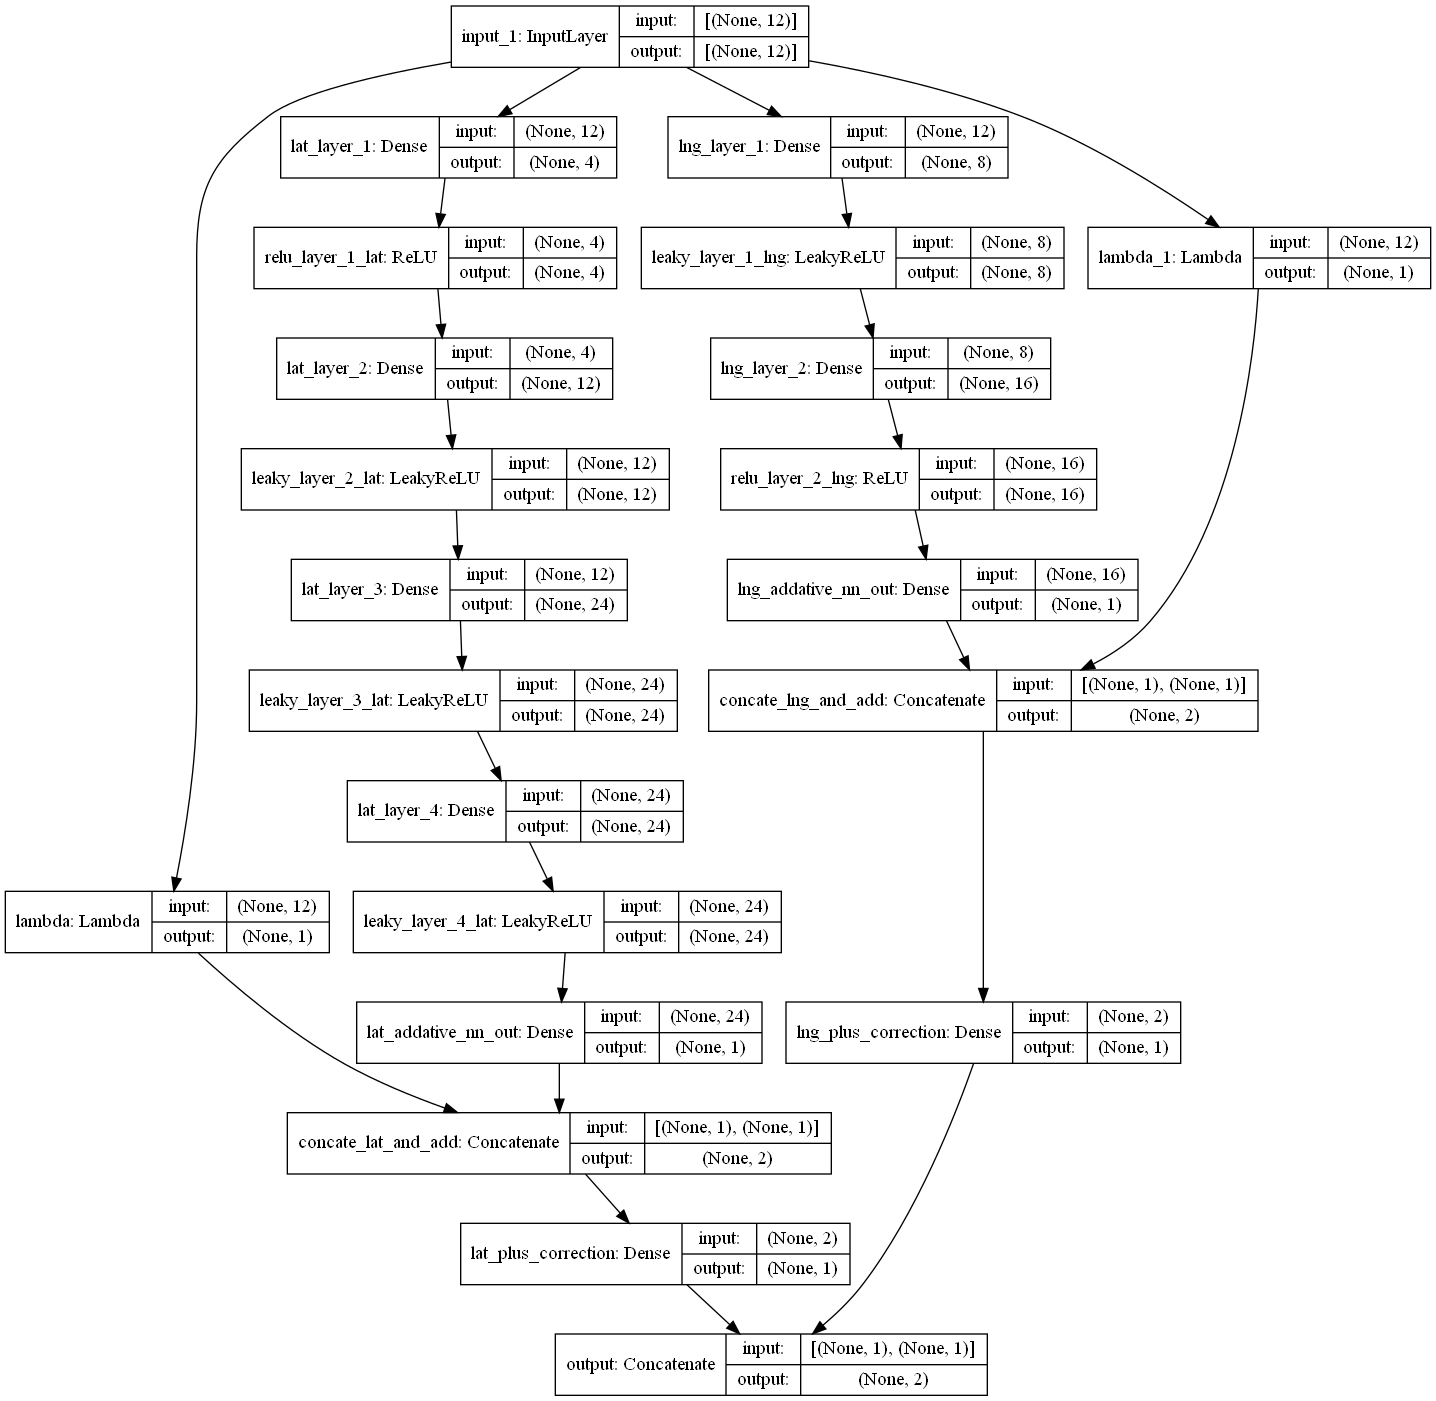

In [902]:
model_complex = tf.keras.models.load_model('best_params_model_8_8.hdf5', custom_objects={'haversine_loss': haversine_loss})
print(f"model learning rate is: {tf.keras.backend.eval(model.optimizer.lr)}")
plot_model(model_complex, to_file='best_model_complex_nn.png', show_shapes=True)

In the following plot our model that had been described before is illustrated.
The keras tuner package after 150 different random hyperparameters combinations in the given hyperparamers space which each was trained for 20 epochs<br>
the best model had been found. The best model resulted in an Overall loss: 5.3 after 20 epochs.<br>
It used 6 layers in the latitude correction unit, 2 layers in the langitude layer, <br>
learning rate of 2.358e-05 and varied combinations of ReLU/LeakyReLU activations and no. of nodes.

In [903]:
print(f"train loss: {lossTrainValAll(x_train, y_train,model_complex)} | validation loss: {lossTrainValAll(x_val, y_val,model_complex)} | Overall loss: {lossTrainValAll(train, labels, model_complex)}")
print(f"Baseline loss: {evaluate(train, labels)}")

train loss: 6.4168305351425 | validation loss: 6.259908472788024 | Overall loss: 6.3822749309686975
Baseline loss: 5.214282246567359


This result is actually slightly worse than the basic baseline predictions.

<IPython.core.display.Javascript object>


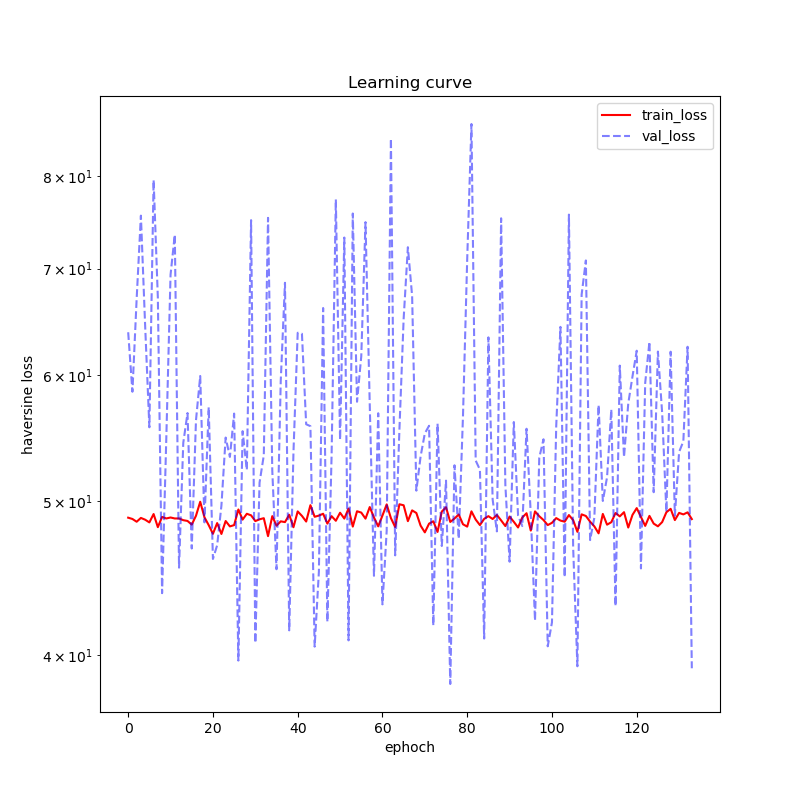

In [904]:
model_complex, fig_complex = trainModel(model_complex, x_train_norm, y_train_norm, x_val_norm, y_val_norm, epochs=1000, early=('loss', 100), saveBest=('loss', 'complex_nn_model'), verbose=0)

##### Model Evaluation:
Although the model was fed with baseline input data it actually managed to perform worst than the raw baseline inputs.<br>
If we zoom into the learning curve we can see that the curve was negativly inclined, therefore we more epochs I believe the model could converge to at least the baseline performance.<br>
In my opinion although the baseline lat lon predictions are nice in order to significally make a change we must incorprate much more data.

The haversine distance difference between predicted and true:
Mean = 4.85dm | Median = 3.65dm | STD = 10.05dm | Max = 659.05dm | Min = 0.03dm


<IPython.core.display.Javascript object>


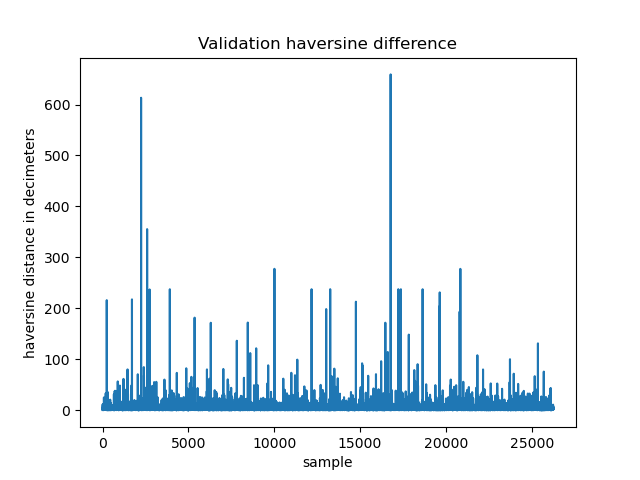

In [960]:
model_complex = tf.keras.models.load_model('complex_nn_model.hdf5', custom_objects={'haversine_loss': haversine_loss})
results = evaluate_model(model_complex, x_train, y_train, x_val, y_val, train, labels)

In [961]:
results

train    validation       overall
mean_95th_mid_haversine  6.164488e+00  6.060025e+00  6.140591e+00
mean_squared_error       6.661921e-09  1.715609e-08  1.500631e-08
r2_score                 9.999995e-01  9.999989e-01  9.999990e-01
mean_absolute_error      2.966611e-05  2.755170e-05  2.734822e-05

Over here we still are recieving worse the input loss, maybe if we use a smaller learning rate our model will converge properly?<br>
Because we don't know which exactly we simply use a decay, and train our model for far more epochs than 120 even though it has not learned significantly.

In [ ]:
model_complex, fig_complex = trainModel(model_complex, x_train_norm, y_train_norm, x_val_norm, y_val_norm, epochs=5000, saveBest=('loss', 'complex_nn_model_2'), verbose=0)

### LSTM timeseries
Our data is timeseries data. therefore a more natural approach would be to use an algorithm which is known for working well with time series data.<br>
the RNN architectures are known as such.What is RNN model?<br>
RNN stands for recurrent neural network, RNN is simply a neural network with memory from the previous passes-through.<br>
that means that in a given window of time which we predefine each pass through.<br>
RNNs are using a concept called squential memory, a mechanism that make it easier to replicate sequences.<br>
RNN layers has an recurrent loop which a hidden state from the previous steps is fed forward to the current hidden layer. <br>
finally after passing through all the samples in sequence our hidden layer would have information from all the previous samples.<br>
this curse of action can be refered as using temporal memory. Now we can pass it through a simple feed forward network.<br>
the problem with RNN is that due to the fact that it is essentially extremly deep neural network and each gradient is calculated with respect to the layer before it as it backpropagates our gradients will exponentialy decrease and eventually be so close to zero that the first layers won't learn at all. ( the vanishing gradient problem), <br>
luckly a solution to the problem is available. LSTM neural network.<br>
LSTM stands for long short memory neural network, the LSTM cells are comprised of gates that regulate the flow of <br>
which data to keep or to discard, and by the use of gates it can learn to use only relavent information to make predictions.<br>
<br>
Another technical thing is because we use our data as sequences there is a need to tweak a little bit the haversine_loss function for the training proccess.<br>
therefore we set a new loss function called `haversine_loss_lstm`

In [1051]:
def haversine_loss_lstm(y_true, y_pred):
    y_true = tf.reshape(y_true, [-1, 2])
    PI_ON_180 = tf.constant(np.pi / 180, dtype=tf.float32)
    RADIUS_M = tf.constant(6_377_000, dtype = tf.float32)
    tf.dtypes.cast(y_true, tf.float32)
    tf.dtypes.cast(y_pred, tf.float32)

    yt_rad = y_true * PI_ON_180
    yp_rad = y_pred * PI_ON_180

    delta = yt_rad - yp_rad
    v = delta / 2
    v = tf.sin(v)
    v = v**2

    a = v[:,1] + tf.cos(yt_rad[:,1]) * tf.cos(yp_rad[:,1]) * v[:,0] 
    c = tf.sqrt(a)
    c = 2* tf.math.asin(c)
    c = c*RADIUS_M
    
    p50 = tfp.stats.percentile(c, 50)
    p95 = tfp.stats.percentile(c, 95)
    
    final = tf.reduce_mean(tf.convert_to_tensor([p50, p95]))
    return final

The following is a simple LSTM model with only two LSTM cells and one output.

In [914]:
def staticSimpleLSTM():
    lstm = tf.keras.models.Sequential([
        LSTM(4, input_shape=trainX.shape[1:], return_sequences=True, activation='relu'),
        LSTM(2, return_sequences=False, activation='relu'),
        Dense(2)
    ])
    
    lstm.compile(optimizer='adam', loss=haversine_loss_lstm)
    lstm.summary()
    return lstm

In [910]:
from tensorflow.keras.layers import LSTM, Dropout

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 30, 4)             272       
_________________________________________________________________
lstm_5 (LSTM)                (None, 2)                 56        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 6         
Total params: 334
Trainable params: 334
Non-trainable params: 0
_________________________________________________________________


<IPython.core.display.Javascript object>


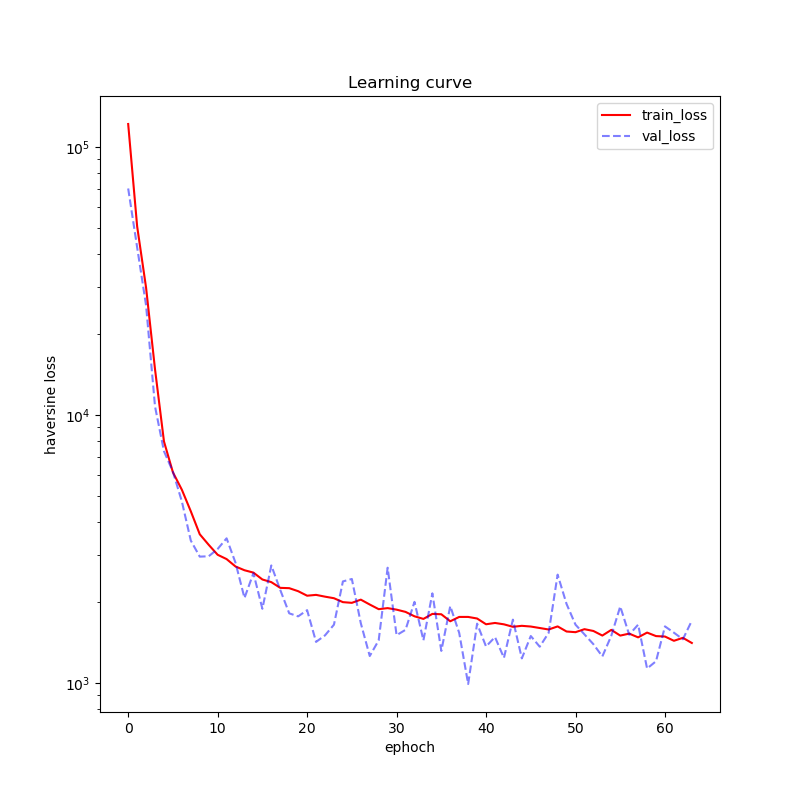

In [915]:
lstm_simple = staticSimpleLSTM()
lstm_simple, fig_lstm_complex = trainModel(lstm_simple, trainX, trainY, valX, valY, epochs=500, early=('val_loss', 25), saveBest=('val_loss', 'simple_lstm'), verbose=0)

From the learning curve we can conclude the the model has learned quite a lot but the curve significantly decreased it's slope.<br>
Even the validation loss is jumping up and down along the training loss therefore the early stop of 25 epochs may have been too low because<br>
there can be some exceptions in the validation loss. We will continue to train the model for 500 more epochs with 50 early stopping rule on the<br>
training loss to make sure we won't prematurely stop the learning process. Another thing worth trying is decaying our learning rate,<br>
this could have good an impact on our results on refined error correction.

In [926]:
lstm_simple = tf.keras.models.load_model('simple_lstm.hdf5', custom_objects={'haversine_loss': haversine_loss_lstm})

In [ ]:
lstm_simple, fig_lstm_complex_2 = trainModel(lstm_simple, trainX, trainY, valX, valY, epochs=500, decay=1/500, early=('loss', 50), saveBest=('val_loss', 'simple_lstm'), verbose=0)

Due to major differences between the input data that are in fact originate from the sequence method of training<br>
our previous evaluation function is not going to work and we will need to change some things especially for the lstm

In [939]:
def evaluate_model_lstm(model, x_t, y_t, x_v, y_v, metrics=['haversine', mean_squared_error, r2_score, mean_absolute_error]):
    df = pd.DataFrame(columns=['train', 'validation', 'overall'])
    pred_t = model.predict(x_t)
    pred_i_t = scaler_y.inverse_transform(pred_t)
    pred_v = model.predict(x_v)
    pred_i_v = scaler_y.inverse_transform(pred_v)
    
    if 'haversine' in metrics:
        diff = calc_haversine(np.array(y_v)[:,0], np.array(y_v)[:,1], pred_i_v[:,0],  pred_i_v[:,1])
        train_loss = haversine_50thP_95thP_mean(np.array(y_v)[:,0], np.array(y_v)[:,1], pred_i_v[:,0],  pred_i_v[:,1])
        val_loss = (np.percentile(diff, 95) + np.median(diff)) / 2
        print("The haversine distance difference between predicted and true:")
        print("=============================================================")
        print(f"Mean = {np.mean(diff):.2f}dm | Median = {np.median(diff):.2f}dm | STD = {np.std(diff):.2f}dm | Max = {np.max(diff):.2f}dm | Min = {np.min(diff):.2f}dm")
        fig = plt.figure()
        plt.plot(diff)
        plt.title('Validation haversine difference')
        plt.xlabel('sample')
        plt.ylabel('haversine distance in decimeters')
        
        df = df.append(pd.DataFrame({'train':train_loss, 'validation':val_loss}, index=['mean_95th_mid_haversine']))
        metrics.remove('haversine')
        
    for metric in metrics:
        score_val = metric(pred_i_v, np.array(y_v))
        score_trn = metric(pred_i_t, np.array(y_t))      
        df = df.append(pd.DataFrame({'train':score_val, 'validation':score_trn}, index=[metric.__name__]))
    
    if 'haversine' in metrics:
        fig.show()
    return df
    

In [1055]:
lstm_simple = tf.keras.models.load_model('simple_lstm.hdf5', custom_objects={'haversine_loss': haversine_loss_lstm})
results = evaluate_model_lstm(lstm_simple, trainX, trainY, valX, valY)

In [941]:
results

train    validation overall
mean_95th_mid_haversine  1.285783e+07  1.285783e+07     NaN
mean_squared_error       8.158872e+03  8.130629e+03     NaN
r2_score                -5.836993e+05 -4.557523e+05     NaN
mean_absolute_error      7.974168e+01  7.962773e+01     NaN

The following is an LSTM model which is built much like our previous complex model<br>
the only difference in this model is that in the so called "correction units" instead of simple<br>
Dense layers we used LSTM NN.

In [1039]:
def staticLSTM():    
    in_nodes = len(train.columns)
    inputLayer = Input(trainX.shape[1:])
    latIn = Lambda(lambda x: x[:, -1, 0:1], output_shape=((1,)))(inputLayer)
    lngIn = Lambda(lambda x: x[:, -1, 1:2], output_shape=((1,)))(inputLayer)
    lat_layer = LSTM((2*in_nodes)//3, name="lat_layer_1_lstm", kernel_initializer='zeros', bias_initializer='zeros', return_sequences=True)(inputLayer)
    if True:
        activation = LeakyReLU(name="leaky_layer_1_lat_lstm")
    else:
        activation = ReLU(name="relu_layer_1_lat_lstm")
    lat_layer = activation(lat_layer)
    lat_layer = Dropout(0.2, name='lat_1_dropout_lstm')(lat_layer)
    lat_layers =  4
    for i in range(2,lat_layers):
        return_sequences = (i+1 != lat_layers)
        lat_layer = tf.keras.layers.LSTM(in_nodes//3,name=f"lat_layer_{i}_lstm", kernel_initializer='zeros',\
                                          bias_initializer='zeros', return_sequences=return_sequences)(lat_layer)
        if False:
            activation = LeakyReLU(name=f"leaky_layer_{i}_lat_lstm")
        else:
            activation = ReLU(name=f"relu_layer_{i}_lat_lstm")
        lat_layer = activation(lat_layer)
        lat_layer = Dropout(0.2, name=f'lat_{i}_dropout_lstm')(lat_layer)
    
    # Fully connected part
    ###########
    # Latitude addative unit
    # Latitude addative unit
    lat_layer = Dense(name="lat_layer_1" ,units=(2*in_nodes)//3, kernel_initializer='zeros', bias_initializer='zeros')(lat_layer)
    if False:
        activation = LeakyReLU(name="leaky_layer_1_lat")
    else:
        activation = ReLU(name="relu_layer_1_lat")
    lat_layer = activation(lat_layer)
    for i in range(2, 4):
        lat_layer = tf.keras.layers.Dense(name=f"lat_layer_{i}", units=in_nodes//3, kernel_initializer='zeros', bias_initializer='zeros')(lat_layer)
        if False:
            activation = LeakyReLU(name=f"leaky_layer_{i}_lat")
        else:
            activation = ReLU(name=f"relu_layer_{i}_lat")
        lat_layer = activation(lat_layer)
    
    # Add to the baseline original prediction
    lat_add_unit = Dense(name="lat_addative_nn_out", units=1, kernel_initializer='zeros', bias_initializer='zeros')(lat_layer)
    #lat_add_unit = Lambda(lambda x: x[:, -1, 0:1], output_shape=((1,)))(lat_add_unit)
    latIn_plus_add = Concatenate(name="concate_lat_and_add")([latIn, lat_add_unit])
    output_lat = Dense(name="lat_plus_correction", units=1, kernel_initializer='zeros', bias_initializer='zeros')(latIn_plus_add)
    
    lng_layer = LSTM((2*in_nodes)//3, name="lng_layer_1_lstm", kernel_initializer='zeros', bias_initializer='zeros', return_sequences=True)(inputLayer)
    if True:
        activation = LeakyReLU(name="leaky_layer_1_lng_lstm")
    else:
        activation = ReLU(name="relu_layer_1_lng_lstm")
    lng_layer = activation(lng_layer)
    lng_layer = Dropout(0.2, name='lng_1_dropout_lstm')(lng_layer)
    lng_layers =  4
    for i in range(2,lng_layers):
        return_sequences = (i+1 != lng_layers)
        lng_layer = tf.keras.layers.LSTM(in_nodes//3,name=f"lng_layer_{i}_lstm", kernel_initializer='zeros',\
                                          bias_initializer='zeros', return_sequences=return_sequences)(lng_layer)
        if False:
            activation = LeakyReLU(name=f"leaky_layer_{i}_lng_lstm")
        else:
            activation = ReLU(name=f"relu_layer_{i}_lng_lstm")
        lng_layer = activation(lng_layer)
        lng_layer = Dropout(0.2, name=f'lng_{i}_dropout_lstm')(lng_layer)
    
    # Fully connected part
    ###########
    # lngitude addative unit
    # lngitude addative unit
    lng_layer = Dense(name="lng_layer_1" ,units=(2*in_nodes)//3, kernel_initializer='zeros', bias_initializer='zeros')(lng_layer)
    if False:
        activation = LeakyReLU(name="leaky_layer_1_lng")
    else:
        activation = ReLU(name="relu_layer_1_lng")
    lng_layer = activation(lng_layer)
    for i in range(2, 4):
        lng_layer = tf.keras.layers.Dense(name=f"lng_layer_{i}", units=in_nodes//3, kernel_initializer='zeros', bias_initializer='zeros')(lng_layer)
        if False:
            activation = LeakyReLU(name=f"leaky_layer_{i}_lng")
        else:
            activation = ReLU(name=f"relu_layer_{i}_lng")
        lng_layer = activation(lng_layer)
    
    # Add to the baseline original prediction
    lng_add_unit = Dense(name="lng_addative_nn_out", units=1, kernel_initializer='zeros', bias_initializer='zeros')(lng_layer)
    #lng_add_unit = Lambda(lambda x: x[:, -1, 0:1], output_shape=((1,)))(lng_add_unit)
    lngIn_plus_add = Concatenate(name="concate_lng_and_add")([lngIn, lng_add_unit])
    output_lng = Dense(name="lng_plus_correction", units=1, kernel_initializer='zeros', bias_initializer='zeros')(lngIn_plus_add)
    outputs = Concatenate(name="output")([output_lat, output_lng])
    ls = tf.keras.Model(inputLayer, outputs)
    
    weights = ls.get_weights()
    weights[-2] = np.array([[1],[0]])
    weights[-4] = np.array([[1],[0]])
    ls.set_weights(weights)
    
    optimizer = keras.optimizers.Adam(learning_rate=2.3585707822348922e-05)
    ls.compile(loss='mse', optimizer=optimizer)
    plot_model(ls)
    return ls

In [1040]:
ls = staticLSTM()

In [1048]:
ls.get_weights()[-10]

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)

In [ ]:
lstm_complex, fig_lstm_complex = trainModel(ls, trainX, trainY, valX, valY, epochs=100, early=('val_loss', 25), saveBest=('val_loss', 'lstm_complex'), verbose=0)

<IPython.core.display.Javascript object>


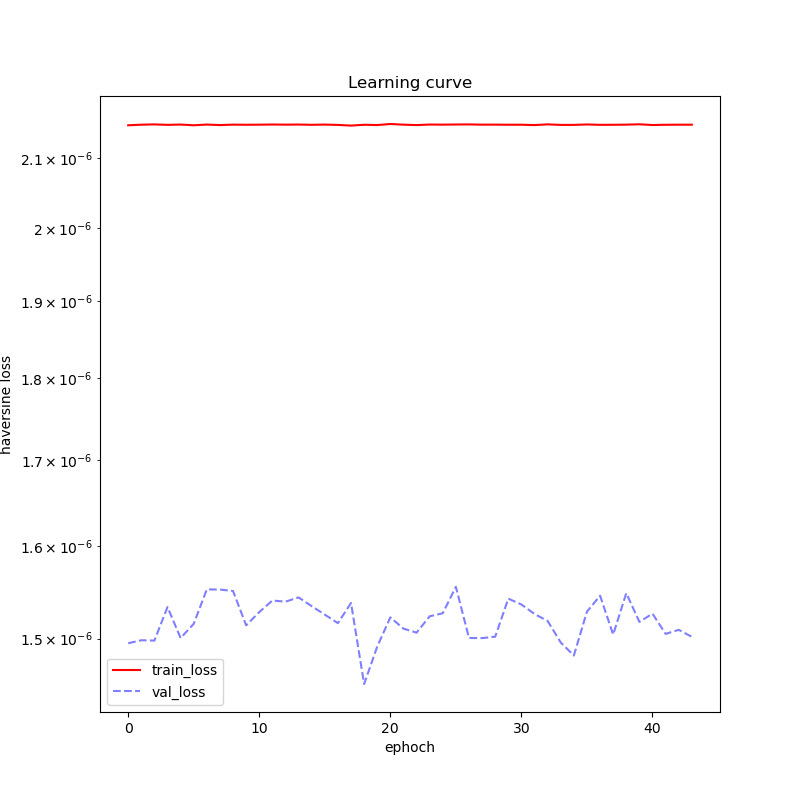

In [1049]:
fig_lstm_complex

In [ ]:
lstm_complex = tf.keras.models.load_model('lstm_complex.hdf5', custom_objects={'haversine_loss': haversine_loss_lstm})
results = evaluate_model_lstm(lstm_complex, x_train, y_train, x_val, y_val)

In [ ]:
results

The same as above but now our number of nodes, the number of LSTM cells, the number of fully connected layers, the amount of<br> dropout between the layers and the learning rate is all detrimined by keras tuner which as before would search accross the <br>hyperparameter space for the best combination of parameters

In [1011]:
def buildModelLSTM(hp):
    in_nodes = len(train.columns)
    inputLayer = Input(trainX.shape[1:])
    latIn = Lambda(lambda x: x[:, -1, 0:1], output_shape=((1,)))(inputLayer)
    lngIn = Lambda(lambda x: x[:, -1, 1:2], output_shape=((1,)))(inputLayer)
    
    # Latitude correction unit
    # LSTM part
    ###########
    lat_layer = LSTM(hp.Int("lat_layer_1_lstm", in_nodes//3, in_nodes*2, in_nodes//3), name="lat_layer_1_lstm", kernel_initializer='zeros', bias_initializer='zeros', return_sequences=True)(inputLayer)
    if hp.Boolean("leaky_layer_1_lat_lstm"):
        activation = LeakyReLU(name="leaky_layer_1_lat_lstm")
    else:
        activation = ReLU(name="relu_layer_1_lat_lstm")
    lat_layer = activation(lat_layer)
    lat_layer = Dropout(hp.Float('lat_1_dropout_lstm',0.1,0.25), name='lat_1_dropout_lstm')(lat_layer)
    lat_layers =  hp.Int("n_layers_lat_lstm", 2, 5)
    for i in range(2,lat_layers):
        lat_layer = tf.keras.layers.LSTM(hp.Int(f"lat_layer_{i}_lstm", in_nodes//3, in_nodes*2, in_nodes//3),name=f"lat_layer_{i}_lstm", kernel_initializer='zeros',\
                                          bias_initializer='zeros', return_sequences=True)(lat_layer)
        if hp.Boolean(f"leaky_layer_{i}_lat_lstm"):
            activation = LeakyReLU(name=f"leaky_layer_{i}_lat_lstm")
        else:
            activation = ReLU(name=f"relu_layer_{i}_lat_lstm")
        lat_layer = activation(lat_layer)
        lat_layer = Dropout(hp.Float(f'lat_{i}_dropout_lstm',0.1,0.25), name=f'lat_{i}_dropout_lstm')(lat_layer)
    
    # Final LSTM layer in the unit should not return sequences
    lat_layer = tf.keras.layers.LSTM(hp.Int(f"lat_layer_{lat_layers}_lstm", in_nodes//3, in_nodes*2, in_nodes//3),name=f"lat_layer_{lat_layers}_lstm", kernel_initializer='zeros',\
                                      bias_initializer='zeros', return_sequences=False)(lat_layer)
    if hp.Boolean(f"leaky_layer_{lat_layers}_lat_lstm"):
        activation = LeakyReLU(name=f"leaky_layer_{lat_layers}_lat_lstm")
    else:
        activation = ReLU(name=f"relu_layer_{lat_layers}_lat_lstm")
    lat_layer = activation(lat_layer)
    lat_layer = Dropout(hp.Float(f'lat_{lat_layers}_dropout_lstm',0.1,0.25), name=f'lat_{lat_layers}_dropout_lstm')(lat_layer)
    
    # Fully connected part
    ###########
    # Latitude addative unit
    lat_layer = Dense(name="lat_layer_1" ,units=hp.Int("lat_layer_1", in_nodes//3, in_nodes*2, in_nodes//3), kernel_initializer='zeros', bias_initializer='zeros')(lat_layer)
    if hp.Boolean("leaky_layer_1_lat"):
        activation = LeakyReLU(name="leaky_layer_1_lat")
    else:
        activation = ReLU(name="relu_layer_1_lat")
    lat_layer = activation(lat_layer)
    for i in range(2, hp.Int("n_layers_lat", 2, 4)):
        lat_layer = tf.keras.layers.Dense(name=f"lat_layer_{i}", units=hp.Int(f"lat_layer_{i}", in_nodes//3, in_nodes*2, in_nodes//3), kernel_initializer='zeros', bias_initializer='zeros')(lat_layer)
        if hp.Boolean(f"leaky_layer_{i}_lat"):
            activation = LeakyReLU(name=f"leaky_layer_{i}_lat")
        else:
            activation = ReLU(name=f"relu_layer_{i}_lat")
        lat_layer = activation(lat_layer)
    
    # Add to the baseline original prediction
    lat_add_unit = Dense(name="lat_addative_nn_out", units=1, kernel_initializer='zeros', bias_initializer='zeros')(lat_layer)
    #lat_add_unit = Lambda(lambda x: x[:, -1, 0:1], output_shape=((1,)))(lat_add_unit)
    latIn_plus_add = Concatenate(name="concate_lat_and_add")([latIn, lat_add_unit])
    output_lat = Dense(name="lat_plus_correction", units=1, kernel_initializer='zeros', bias_initializer='zeros')(latIn_plus_add)
    
    #######################################################################
    # lngitude correction unit
    # LSTM part
    ###########
    lng_layer = LSTM(hp.Int("lng_layer_1_lstm", in_nodes//3, in_nodes*2, in_nodes//3), name="lng_layer_1_lstm", kernel_initializer='zeros', bias_initializer='zeros', return_sequences=True)(inputLayer)
    if hp.Boolean("leaky_layer_1_lng_lstm"):
        activation = LeakyReLU(name="leaky_layer_1_lng_lstm")
    else:
        activation = ReLU(name="relu_layer_1_lng_lstm")
    lng_layer = activation(lng_layer)
    lng_layer = Dropout(hp.Float('lng_1_dropout_lstm',0.1,0.25), name='lng_1_dropout_lstm')(lng_layer)
    lng_layers =  hp.Int("n_layers_lng_lstm", 2, 5)
    for i in range(2,lng_layers-1):
        lng_layer = tf.keras.layers.LSTM(hp.Int(f"lng_layer_{i}_lstm", in_nodes//3, in_nodes*2, in_nodes//3),name=f"lng_layer_{i}_lstm", kernel_initializer='zeros',\
                                          bias_initializer='zeros', return_sequences=True)(lng_layer)
        if hp.Boolean(f"leaky_layer_{i}_lng_lstm"):
            activation = LeakyReLU(name=f"leaky_layer_{i}_lng_lstm")
        else:
            activation = ReLU(name=f"relu_layer_{i}_lng_lstm")
        lng_layer = activation(lng_layer)
        lng_layer = Dropout(hp.Float(f'lng_{i}_dropout_lstm',0.1,0.25), name=f'lng_{i}_dropout_lstm')(lng_layer)
    
    
    # Final layer in the unit should not return sequences
    lng_layer = tf.keras.layers.LSTM(hp.Int(f"lng_layer_{lng_layers}_lstm", in_nodes//3, in_nodes*2, in_nodes//3),name=f"lng_layer_{lng_layers}_lstm", kernel_initializer='zeros',\
                                      bias_initializer='zeros', return_sequences=False)(lng_layer)
    if hp.Boolean(f"leaky_layer_{lng_layers}_lng_lstm"):
        activation = LeakyReLU(name=f"leaky_layer_{lng_layers}_lng_lstm")
    else:
        activation = ReLU(name=f"relu_layer_{lng_layers}_lng_lstm")
    lng_layer = activation(lng_layer)
    lng_layer = Dropout(hp.Float(f'lng_{lng_layers}_dropout_lstm',0.1,0.25), name=f'lng_{lng_layers}_dropout_lstm')(lng_layer)
    
    # Fully connected part
    ###########
    # lngitude addative unit
    lng_layer = Dense(name="lng_layer_1" ,units=hp.Int("lng_layer_1", in_nodes//3, in_nodes*2, in_nodes//3), kernel_initializer='zeros', bias_initializer='zeros')(lng_layer)
    if hp.Boolean("leaky_layer_1_lng"):
        activation = LeakyReLU(name="leaky_layer_1_lng")
    else:
        activation = ReLU(name="relu_layer_1_lng")
    lng_layer = activation(lng_layer)
    for i in range(2, hp.Int("n_layers_lng", 2, 4)):
        lng_layer = tf.keras.layers.Dense(name=f"lng_layer_{i}", units=hp.Int(f"lng_layer_{i}", in_nodes//3, in_nodes*2, in_nodes//3), kernel_initializer='zeros', bias_initializer='zeros')(lng_layer)
        if hp.Boolean(f"leaky_layer_{i}_lng"):
            activation = LeakyReLU(name=f"leaky_layer_{i}_lng")
        else:
            activation = ReLU(name=f"relu_layer_{i}_lng")
        lng_layer = activation(lng_layer)
    
    # Add to the baseline original prediction
    lng_add_unit = Dense(name="lng_addative_nn_out", units=1, kernel_initializer='zeros', bias_initializer='zeros')(lng_layer)
    #lng_add_unit = Lambda(lambda x: x[:, -1, 0:1], output_shape=((1,)))(lng_add_unit)
    lngIn_plus_add = Concatenate(name="concate_lng_and_add")([lngIn, lng_add_unit])
    output_lng = Dense(name="lng_plus_correction", units=1, kernel_initializer='zeros', bias_initializer='zeros')(lngIn_plus_add)
    ###########################################################
    outputs = Concatenate(name="output")([output_lat, output_lng])
    
    model = tf.keras.Model(inputLayer, outputs)
    
    weights = model.get_weights()
    weights[-2] = np.array([[1],[0]])
    weights[-4] = np.array([[1],[0]])
    model.set_weights(weights)
    
    optimizer = keras.optimizers.Adam(learning_rate=hp.Float('learning rate', 0.0000001, 0.001))
    model.compile(loss=haversine_loss_lstm,
                optimizer=optimizer)
    return model
#tf.keras.utils.vis_utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Usually we will train for 20 epochs on much bigger amount of different tuned models but because of the computationally<br>
intensive model we have created our simple computer will not going to withstand such a task.<br>
Therefore we will have to try only 5 different models and train each on 4 epochs.<br>
Not super indecative but maybe enough to set the difference between them and find the best

In [ ]:
TUNER_DIR = 'tuner_logs_lstm_6'
tuner = kt.RandomSearch(buildModelLSTM, objective='loss', max_trials=20, directory=TUNER_DIR)
tuner.search(x=trainX, y=trainY, epochs=10, validation_data=(valX, valY), verbose=1)

In [1016]:
lstm_tuned = tuner.get_best_models()[0]
lstm_tuned.save('lstm_tuned.hdf5')

As we can see only 5 models each trained on 4 epochs took as long as 43m, one epoch take as much as 2.15m to train, thats huge<br>
amount of time to wait considering most models are trained for at least 100 epochs.<br>
ofcourse this due to our lack of resources. On large scale machine which graphic card it can take easily 5 times faster using CudaLSTM,<br>
an LSTM layer computationally optimized for graphic card.

model learning rate is: 0.0007464585942216218


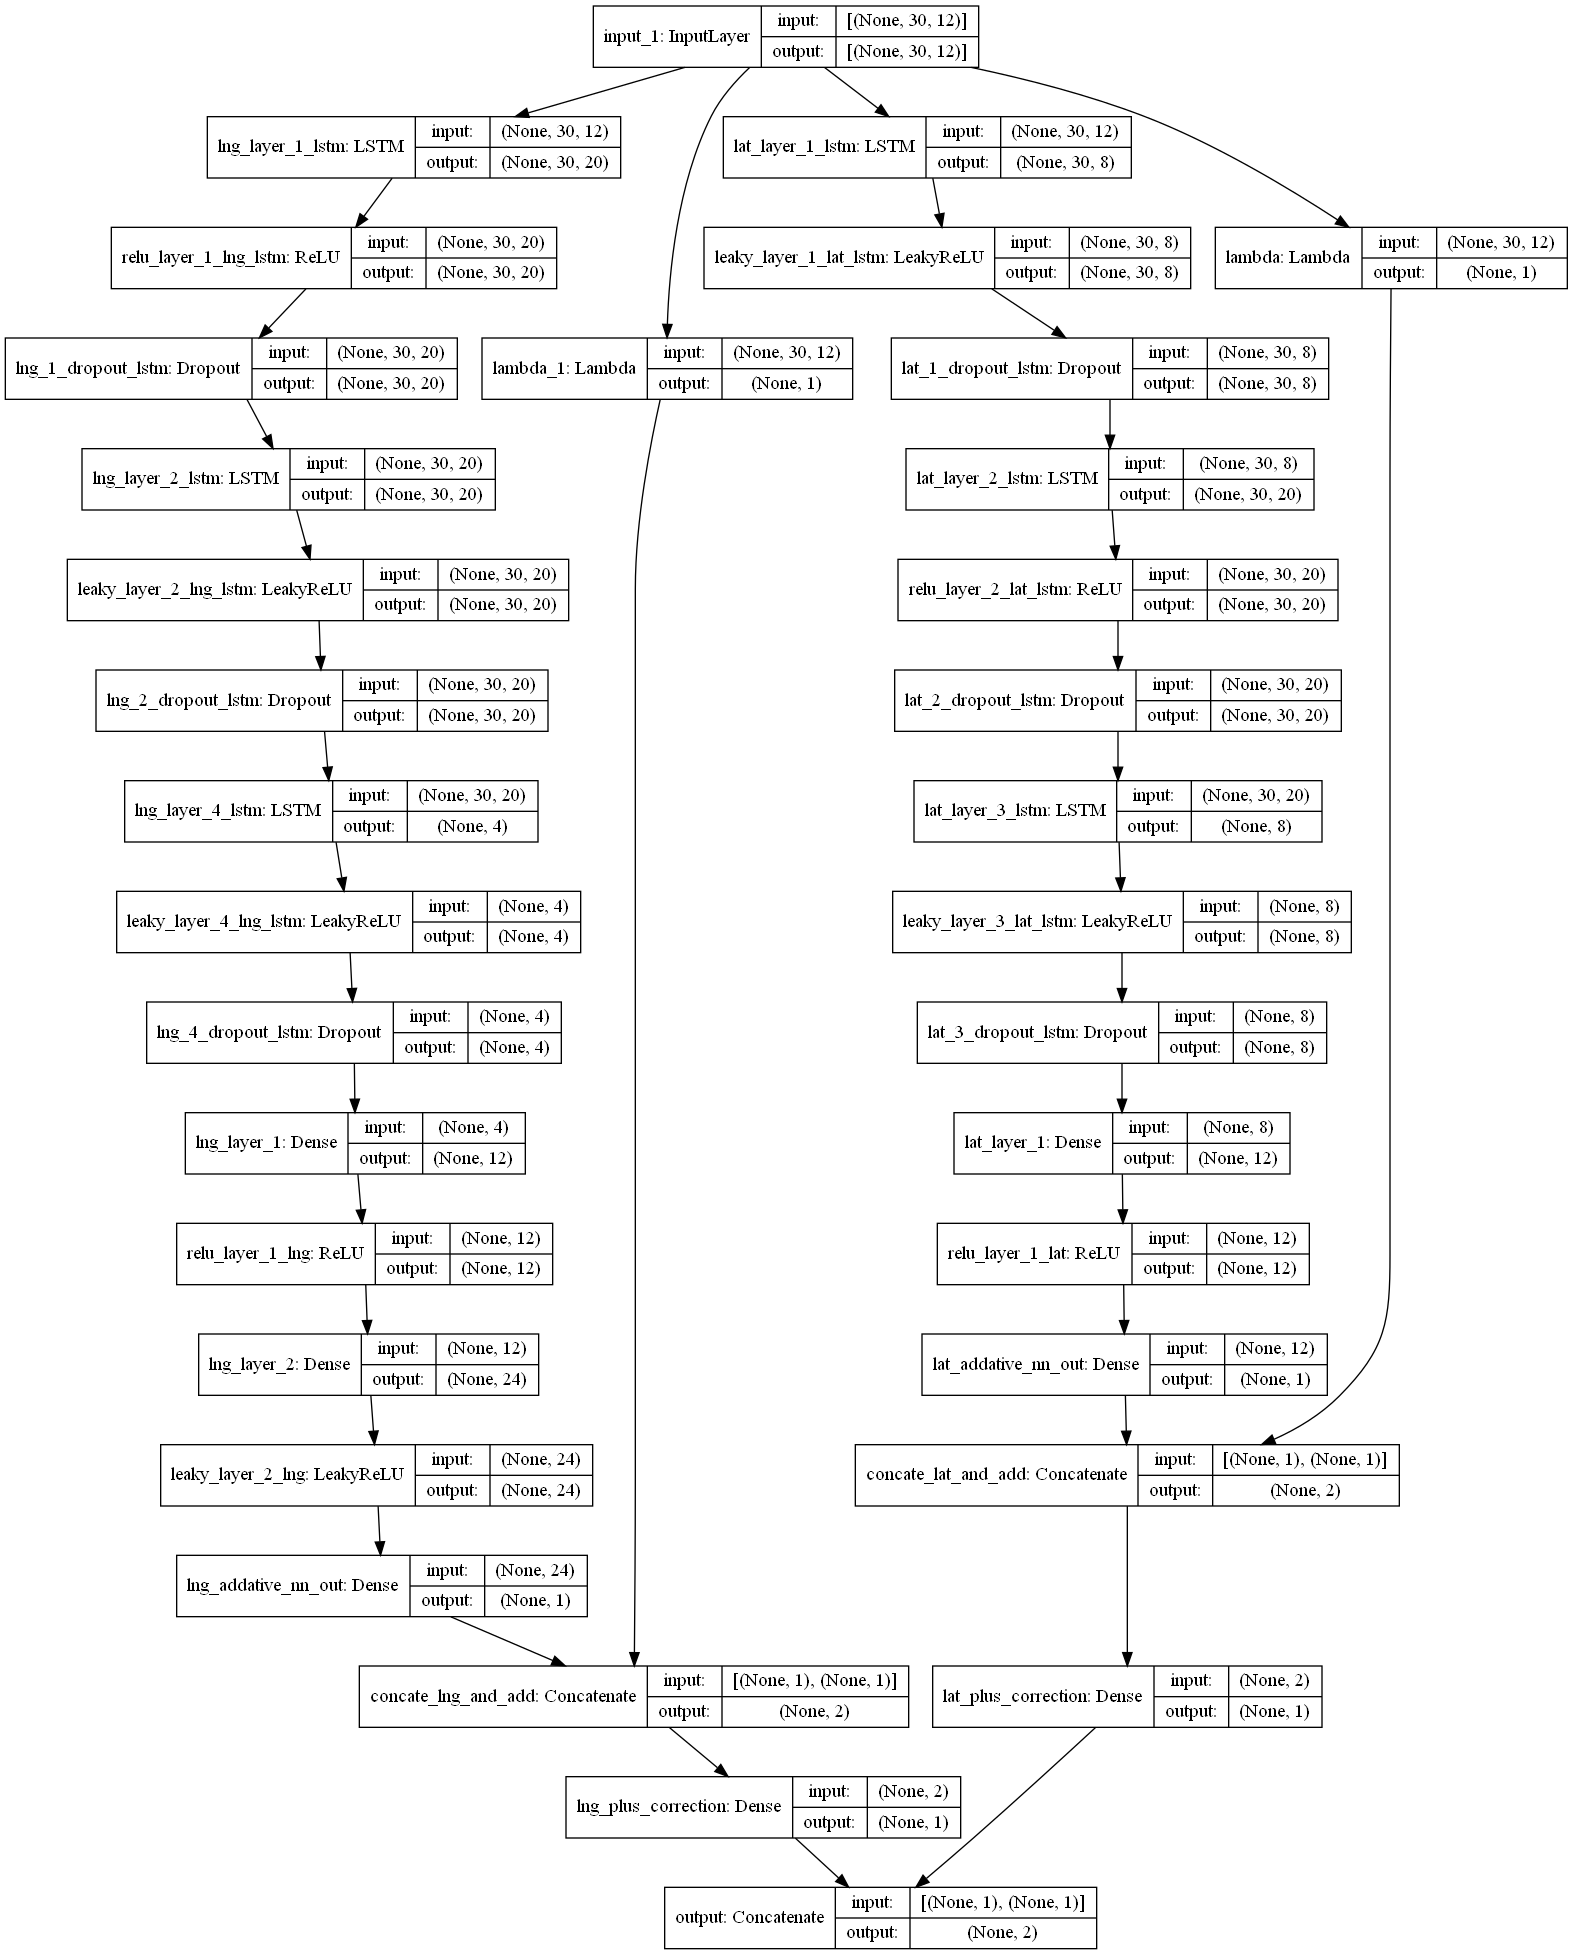

In [1025]:
lstm_tuned_1 = tf.keras.models.load_model('lstm_tuned.hdf5', custom_objects={'haversine_loss_lstm': haversine_loss_lstm})
print(f"model learning rate is: {tf.keras.backend.eval(lstm_tuned.optimizer.lr)}")
plot_model(lstm_tuned_1, to_file='best_model_complex_lstm_tuned.png', show_shapes=True)

Our Best model to be discovered in the hyperparameter space is the model illustrated above, latitude correction<br>
unit contains 3 LSTM parts and 2 fully connected layers, each with the number of nodes explained above,<br>
longitude unit contains 3 LSTM parts and 2 fully connected layers.<br>
<br>
Let's try and train our model further more, each epoch takes around 2m so firstly we will try and train it for two hours.

In [1024]:
lstm_tuned, fig_lstm_tuned = trainModel(lstm_tuned, trainX, trainY, valX, valY, epochs=1000, early=('loss', 200), saveBest=('loss', 'lstm_tuned_2'), verbose=1)

Epoch 1/1000
3206/3206 [==============================] - 203s 48ms/step - loss: 267.7068 - val_loss: 228.3575
Epoch 2/1000
3206/3206 [==============================] - 130s 40ms/step - loss: 266.1252 - val_loss: 205.9211
Epoch 3/1000
3206/3206 [==============================] - 129s 40ms/step - loss: 267.0715 - val_loss: 189.1316
Epoch 4/1000
3206/3206 [==============================] - 130s 41ms/step - loss: 264.8660 - val_loss: 194.9205
Epoch 5/1000
3206/3206 [==============================] - 131s 41ms/step - loss: 264.3538 - val_loss: 212.3633
Epoch 6/1000
3206/3206 [==============================] - 130s 41ms/step - loss: 265.5342 - val_loss: 186.1434
Epoch 7/1000
3206/3206 [==============================] - 132s 41ms/step - loss: 265.9611 - val_loss: 198.4718
Epoch 8/1000
3206/3206 [==============================] - 131s 41ms/step - loss: 265.2710 - val_loss: 181.0564
Epoch 9/1000
3206/3206 [==============================] - 131s 41ms/step - loss: 266.7740 - val_loss: 197.9916
E

Epoch 67/1000
3206/3206 [==============================] - 124s 39ms/step - loss: 267.7643 - val_loss: 199.9924
Epoch 68/1000
3206/3206 [==============================] - 124s 39ms/step - loss: 264.5651 - val_loss: 182.3279
Epoch 69/1000
3206/3206 [==============================] - 123s 38ms/step - loss: 267.2304 - val_loss: 212.3635
Epoch 70/1000
3206/3206 [==============================] - 124s 39ms/step - loss: 268.8867 - val_loss: 237.0056
Epoch 71/1000
3206/3206 [==============================] - 123s 38ms/step - loss: 265.5792 - val_loss: 201.5929
Epoch 72/1000
3206/3206 [==============================] - 123s 38ms/step - loss: 265.5763 - val_loss: 219.3117
Epoch 73/1000
3206/3206 [==============================] - 123s 38ms/step - loss: 265.4781 - val_loss: 199.3825
Epoch 74/1000
3206/3206 [==============================] - 125s 39ms/step - loss: 266.5403 - val_loss: 199.5735
Epoch 75/1000
3206/3206 [==============================] - 123s 38ms/step - loss: 265.7455 - val_loss: 2

KeyboardInterrupt: 

The learning curve indicates that our model is not the sharpest nail in the toolbox.<br>
There is huge difference between the training loss and validation loss.<br>
It is clear that the model is underfitting and the model does not have the capacity to deal with the complexity of our dataset.

The haversine distance difference between predicted and true:
Mean = 12769804.76dm | Median = 12782797.10dm | STD = 111347.06dm | Max = 12927737.40dm | Min = 12511755.19dm


<IPython.core.display.Javascript object>


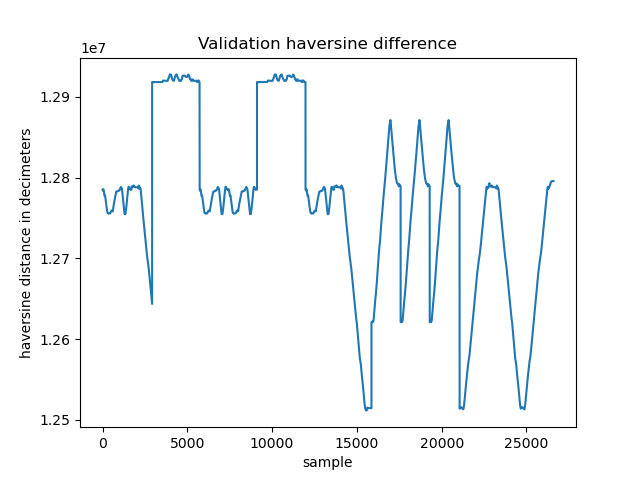

In [1019]:
results = evaluate_model_lstm(lstm_tuned, trainX, trainY, valX, valY,  metrics=['haversine'])

In [1020]:
results

train    validation overall
mean_95th_mid_haversine  1.285373e+07  1.285373e+07     NaN

The loss is unr

# Conclusions

We continue like that for on and on, keep on searching for the best hyper parameters, continue looking for the best architectures, the best regression models,<br>
the best statistical estimation algorithms but we thing we have to stop at some point.<br>
Sure our performance is not as glamorous as we hoped it would be, we managed achieve an improvement of at least 1m than the baseline predictions.<br>
On the test set (at kaggle contest) we achieved 4.26929 decimeters loss ( the average between the 95th precentile and the median of the haversine distances).<br>
<br>
We have discovered the positioning task is far more difficult than we have previously thought.<br>
Even though the dataset contains parameters which are somewhat understandable they require great knowledge at positioning theories, physics and math.<br>
The most effective method we used to decrease the error rate was the usage of statistical and mathematical algorithms such as kalman filter and average the positions<br>
of each phone sample.<br>
The is huge depandancy in the dataset as seen from the r2 scores.<br>
Another thing worth mentioning is that the more we used different parameters the worst the model preformed because all it needed was the lat lng, and when it was<br>
more than that it got overwhelmed by parameters with multiple depandancies.<br>
<br>
Not accidently the gps is jittery and you can't find your pokemon exactly at the right place, If the positioning task was easy as throwing some GNSS API metrics<br>
into a simple NN or god forbid a LSTM NN i'm sure there were no contests on the field at kaggle offering 10000$ prizes. (It's not even the first contest on the subject)<br>
Positioning is a hard task to tackle and we tried without previous exprience to beat domain experts with the so called magic of machine learning.<br>
off course not everything is sunshine and rainbows, the task turned out to be daunting mission to presice what is already precised at a 6.26 decimeters.<br>
<br>
we came 366th with our results which is quite horrible but in our own defence we did not had any suitable hardware for the task.<br>
Countless memory errors of "Unable to allocate 1.3Gb NumPy array", CPU & Memory utilization constantly at 100\% and from time to time a good ol' Blue Screen<br>
were not pleasent enviroment to work with.<br>
Without even mentioning the endless training processes which simply could not converge at the time range.<br>
We are sure that with better hardware we could have archived better / more assure results.<br>

#### As for the results:

| | Baseline | Kalman Filter | Average phones | NaN removed |Linear regression (Lat/Lng) | Linear regression (All Data) | Ridge | Lasso | ElasticNet | SGD | Polynomial Regression | NN tuned | Complex tuned NN | LSTM tuned | Complex LSTM | Complex LSTM tuned 
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| average of median and 95th percentile of haversine distance between ground truth and predictions | 6.26 | 5.49 | 5.21 | 5.15 | 5.19 (KFold) | 6.32 (KFold) | > 200m | > 200m | > 200m | 67 | 6.33 | 4.7m | 6.38 | 120m | 6.48 | 6.1 |
| elapsed training time | 0 | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |

# Suggestions for the future

- ##### Use derived dataset<br>
Incorprate the derived dataset measurements per satelite with the baseline dataset<br>
In order to archive higher level of complexity in our calculation new data must be introduced regarding various parameters such as<br>
distance from satelite to device, the location of the satelite and much more<br>
- ##### Kalman filter with respect to accelaration
From our research online we concluded that the kalman filter has an option to take into account the accelaration of the moving body<br>
we already have accelaration data but it is requires a bit more domain knowledge and even to go a little bit more into the mathematics<br>
this is not exactly the point of the project so we decided to pass on that option for now.
- ##### Use kinematics to predict the following positions.<br>
We have some data that can help us conclude the car's position with the help of some kinematic equations.<br>
The correct method to calculate the position of a vehicle using the phone measurements is not exactly known to us but we sure<br>
that experts in the field can easily use that to their own good.<br>
For example if our vehicle average velocity is 25m/s there is no reason the haversine distance between the current epoch and the next would be bigger than 50m
- ##### Use a map service to position the car within the road.<br>
As seen in the EDA section there are multiple data points that are far off the road of that are predicted to be outside the road.<br>
The road map can give us very nice guidelines on where the car could be present and we can simply follow these guidlines,<br>
when we see unreasonable measurement outside the road simple transfer it to the road in a way that minimize the cost.<br>
- ##### Collect more data using the GNSS Android API
Maybe all we need is to introduce some variance to the model<br>
By collecting data here in tel aviv we are generelizing our model to work outside san fransisco bay area and less prone to overfitting
- ##### Outlier detection
Detect outlier measurements and decide on cleaning policy, whether dropping the sample or changing its value to more appropriate one.
- ##### Run the notebook on GPU for faster training
The training process took 3 days for simple 3 layer model with low learning rate but still it is slow, <br>
We would try to run our taining on google colab notebook with GPU in order for faster feedback loop on our model performance.<br>
Using CuDNNLSTM layer instead of simple LSTM layer could speed up the training process by a factor of 10.<br>
this could mean that the problem with the huge amount of time took to train our models will be solved and we can levrage the lstm better.<br>
- ##### Use a better filler value for the training pivot table for the regression model
Using '0' to fill satelite properties for satelite IDs that samples miss is a bad idea, throwing off the model.